In [1]:
import warnings;
warnings.filterwarnings('ignore');

In [2]:
from my_utils import loader, modeler
import arviz as az
import numpy as np
import importlib
importlib.reload(loader)
importlib.reload(modeler)

<module 'my_utils.modeler' from '/workspaces/Thesis/Gaze_4_behavioural_biometrics/my_utils/modeler.py'>

## __Free viewing__

### __General empathy__

<AxesSubplot: >

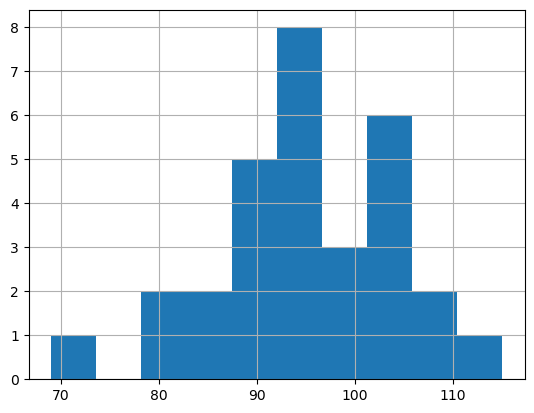

In [3]:
free_viewing_empathy = loader.load_eyeT_empathy_levels(experiment="free")
free_viewing_empathy.hist()

#### __Fixations__

In [4]:
free_fix_features_train, free_fix_labels_train, free_sac_features_train, free_sac_labels_train =  loader.get_eyeT_features_and_labels("train", "free")

In [5]:
free_fix_empathy, free_fix_empathy_trace = modeler.generate_neg_binomial_regression_model("free_fix_neg_bin_regression", free_fix_features_train, free_fix_labels_train)

##### Sampling diagnostics

In [12]:
az.summary(free_fix_empathy_trace, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a         4.54   0.02    4.51     4.57       0.00     0.00   1115.98   
b[0]      0.13   0.14   -0.12     0.39       0.00     0.00   1261.73   
b[1]     -0.03   0.03   -0.09     0.03       0.00     0.00   1196.71   
b[2]      0.22   0.14   -0.04     0.48       0.00     0.00   1164.94   
b[3]     -0.07   0.11   -0.26     0.16       0.00     0.00   1224.21   
b[4]     -0.03   0.02   -0.08     0.01       0.00     0.00   1600.94   
b[5]     -0.17   0.10   -0.35     0.01       0.00     0.00   1248.03   
b[6]     -0.00   0.04   -0.09     0.08       0.00     0.00    914.97   
b[7]     -0.01   0.01   -0.02     0.01       0.00     0.00   2038.77   
b[8]     -0.06   0.04   -0.12     0.01       0.00     0.00    944.74   
b[9]     -0.09   0.05   -0.18     0.01       0.00     0.00    875.00   
b[10]     0.12   0.02    0.08     0.15       0.00     0.00   1800.72   
b[11]     0.02   0.04   -0.04     0.09       0.00     0.00    974.61   
b[12]     0.17   0.03    0.13     0.23       0.00     0.00   2456.27   
b[13]     0.07   0.02    0.04     0.10       0.00     0.00   1475.87   
b[14]    -0.10   0.02   -0.14    -0.07       0.00     0.00   1550.96   
alpha  1035.12  47.64  944.62  1121.43       0.93     0.66   2629.18   

       ess_tail  r_hat  
a       1107.72    1.0  
b[0]    1009.34    1.0  
b[1]    1176.89    1.0  
b[2]    1458.35    1.0  
b[3]    1214.48    1.0  
b[4]    1682.99    1.0  
b[5]    1390.62    1.0  
b[6]    1180.31    1.0  
b[7]    1505.63    1.0  
b[8]     937.84    1.0  
b[9]    1038.89    1.0  
b[10]   1538.19    1.0  
b[11]    963.83    1.0  
b[12]   1487.17    1.0  
b[13]   1257.42    1.0  
b[14]   1415.21    1.0  
alpha   1632.46    1.0

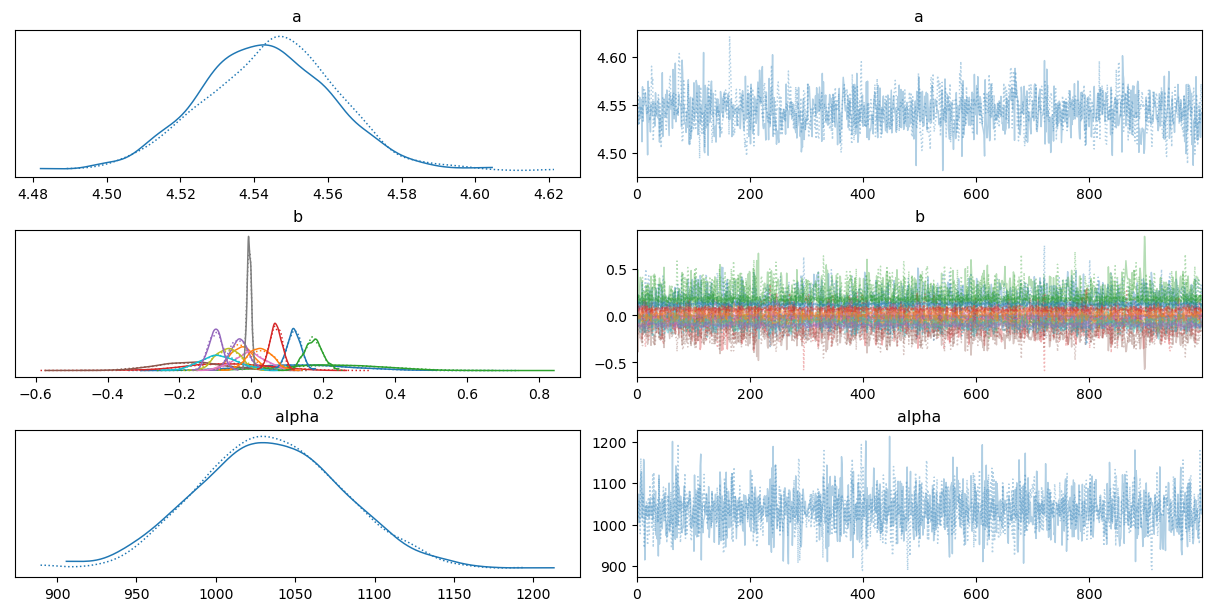

In [13]:
az.plot_trace(free_fix_empathy_trace);

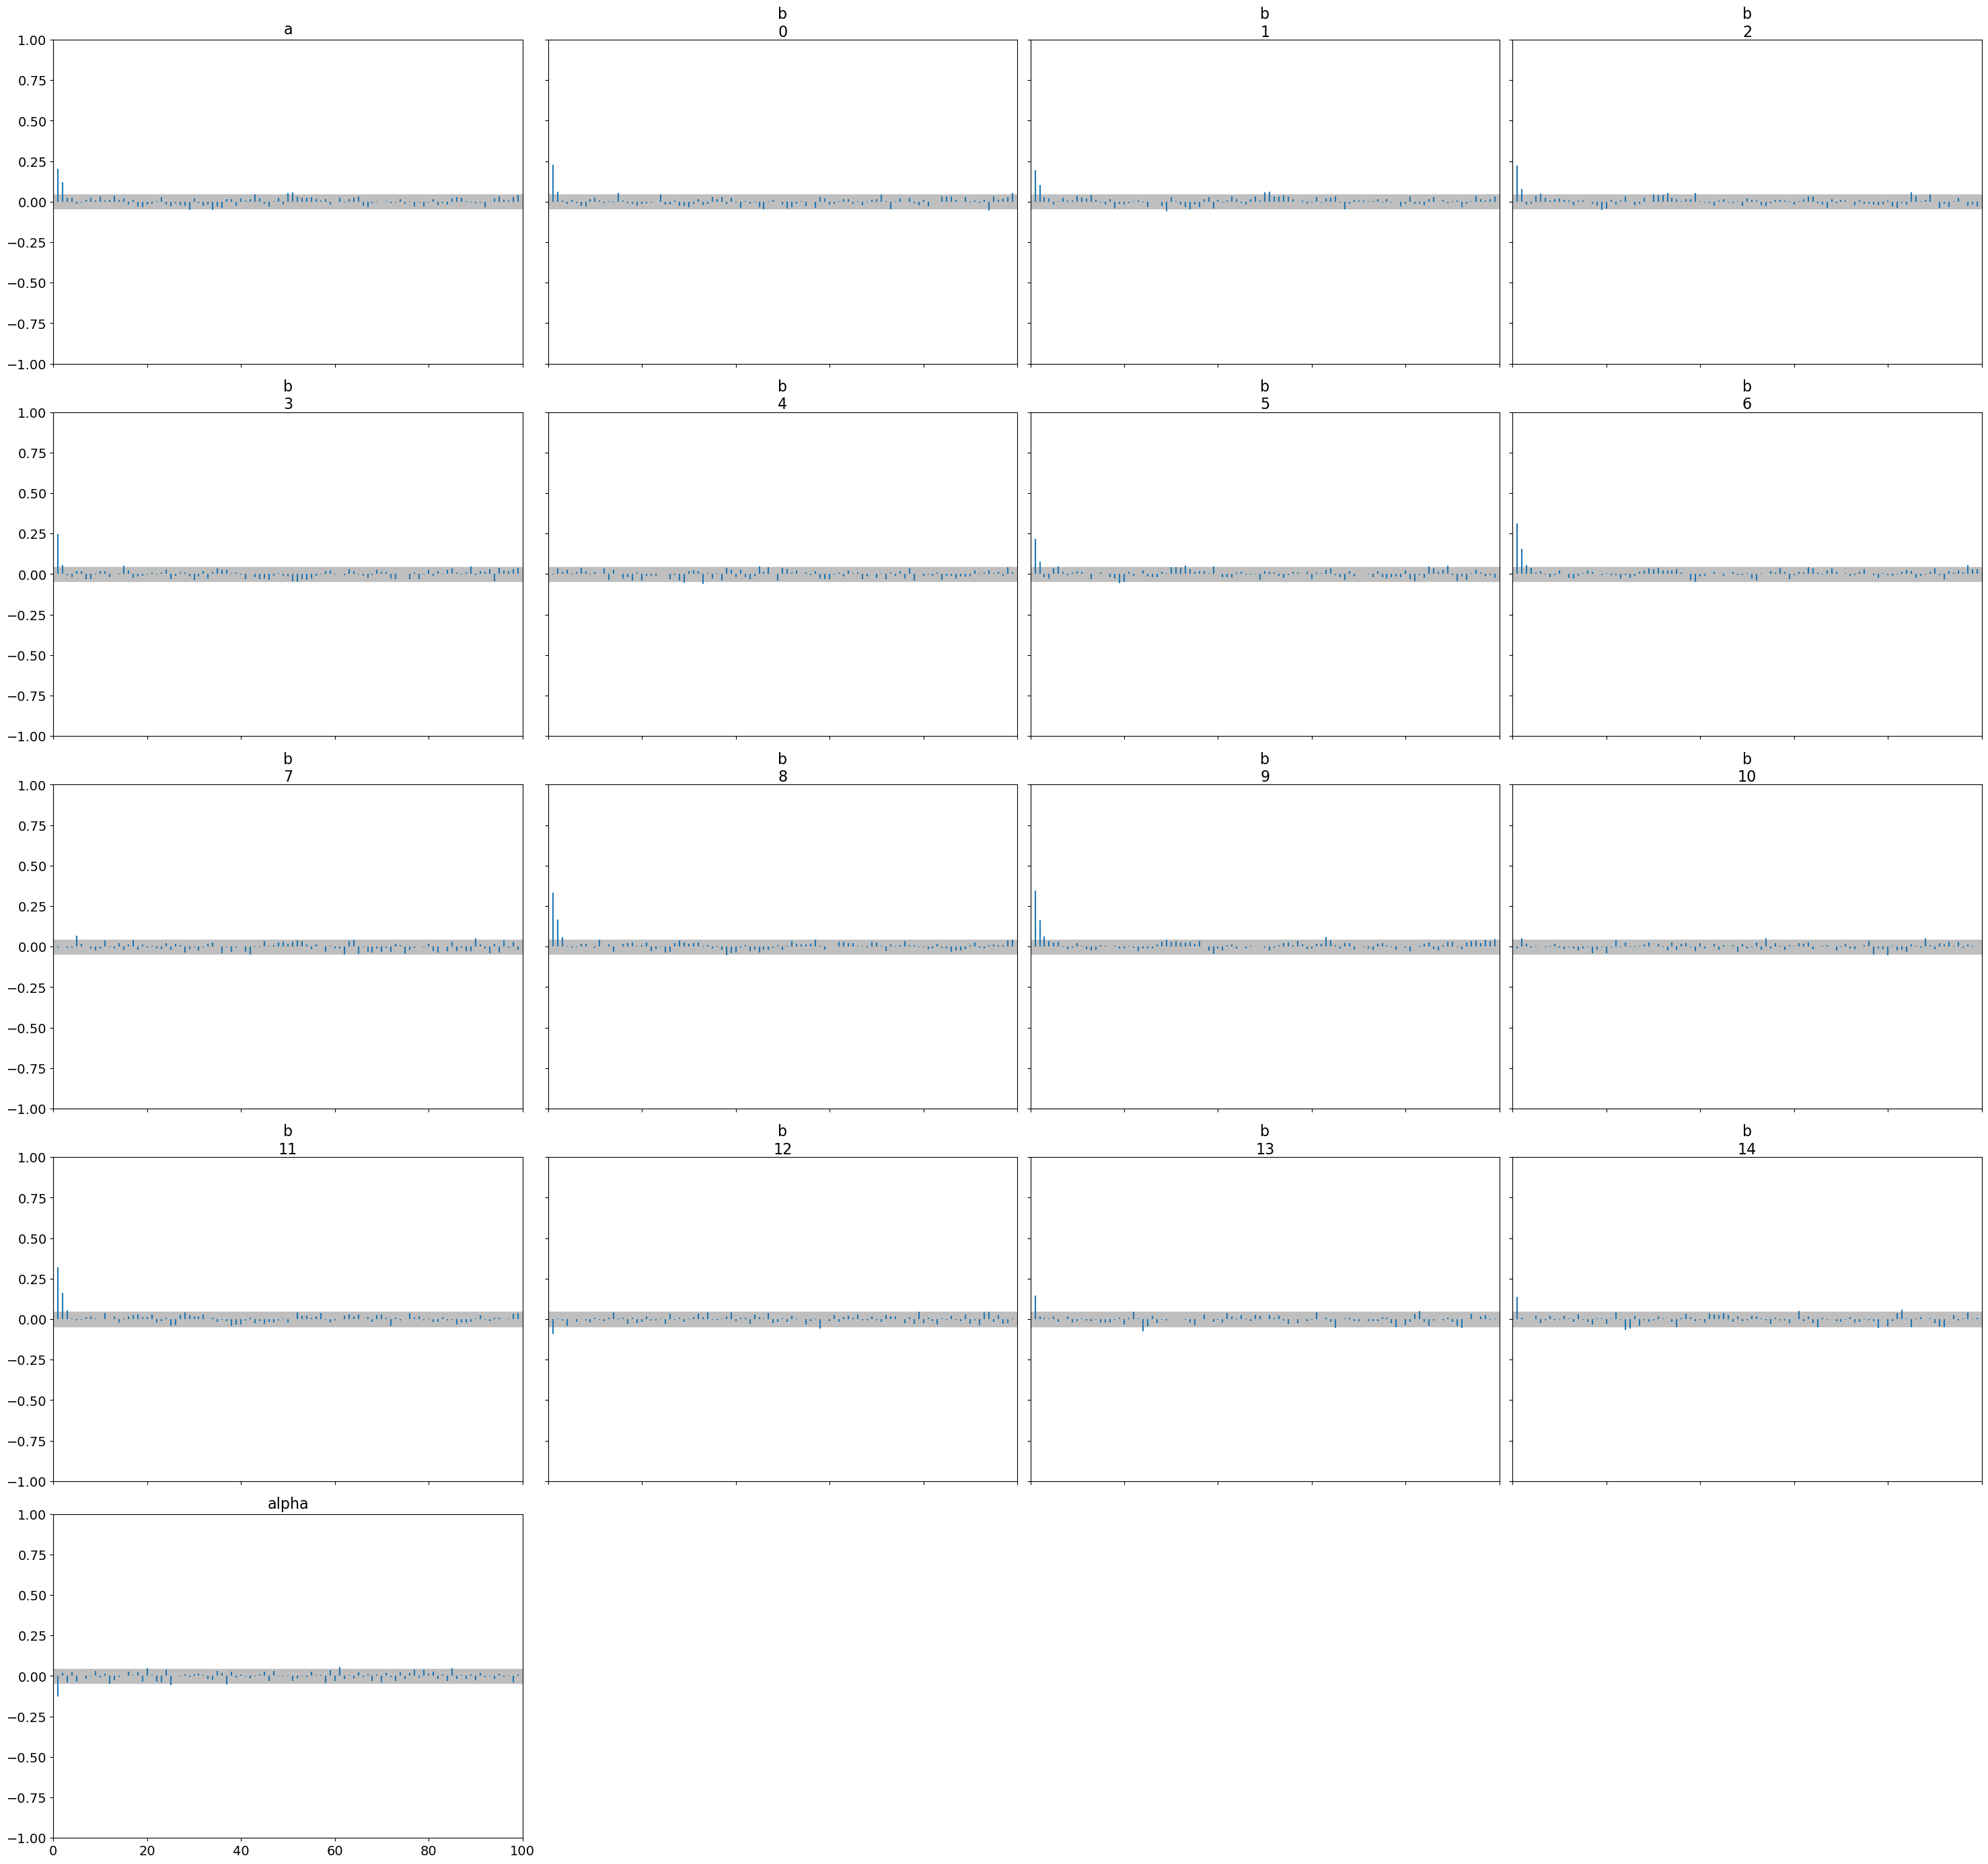

In [14]:
az.plot_autocorr(free_fix_empathy_trace, combined=True);

##### Posterior predictive check

In [9]:
free_fix_ppc = modeler.generate_model_ppc(free_fix_empathy, free_fix_empathy_trace)

In [50]:
sampled_labels = free_fix_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)

In [51]:
rmse, mape = modeler.get_regression_evaluation(free_fix_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:8.03
MAPE:6.67%


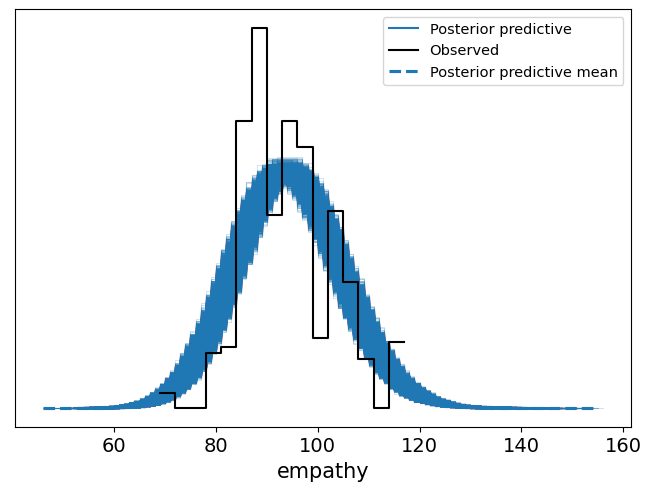

In [18]:
az.plot_ppc(free_fix_ppc);

##### Test predictions

In [19]:
free_fix_features_test, free_fix_labels_test, free_sac_features_test, free_sac_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free")
free_fix_predictions = modeler.generate_model_predictions(free_fix_empathy, free_fix_features_test, free_fix_empathy_trace)

In [20]:
rmse, mape = modeler.get_regression_evaluation(free_fix_predictions, free_fix_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:8.22
MAPE:6.86%


#### __Saccades__

In [21]:
free_sac_empathy, free_sac_empathy_trace = modeler.generate_neg_binomial_regression_model("free_sac_neg_bin_regression", free_sac_features_train, free_sac_labels_train)

Sampling 2 chains for 7_000 tune and 1_000 draw iterations (14_000 + 2_000 draws total) took 913 seconds.


Saving model...


##### Sampling diagnostics

In [22]:
az.summary(free_sac_empathy_trace, round_to=2)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
a        4.60   0.02    4.57     4.63       0.00     0.00   1256.49   1397.48   
b[0]    -0.01   0.04   -0.07     0.07       0.00     0.00   1256.92   1300.81   
b[1]    -0.05   0.02   -0.09    -0.01       0.00     0.00   1472.62   1438.77   
b[2]    -0.07   0.07   -0.21     0.08       0.00     0.00   1005.86    958.14   
b[3]    -0.03   0.06   -0.14     0.08       0.00     0.00   1370.33   1530.33   
b[4]    -0.03   0.06   -0.13     0.08       0.00     0.00   1629.29   1327.53   
b[5]     0.07   0.06   -0.04     0.17       0.00     0.00   1023.39    925.97   
b[6]    -0.01   0.03   -0.06     0.03       0.00     0.00   1208.89   1275.99   
b[7]    -0.01   0.00   -0.01     0.00       0.00     0.00   2066.87   1435.39   
b[8]     0.03   0.02   -0.02     0.07       0.00     0.00   1136.25   1317.50   
b[9]    -0.00   0.04   -0.06     0.07       0.00     0.00   1065.96   1027.83   
b[10]    0.02   0.02   -0.02     0.05       0.00     0.00   1101.71   1450.87   
b[11]   -0.04   0.02   -0.08     0.01       0.00     0.00   1187.33   1436.56   
b[12]   -0.01   0.01   -0.02     0.01       0.00     0.00   1777.98   1419.20   
b[13]   -0.05   0.02   -0.08    -0.02       0.00     0.00   1577.40   1465.81   
b[14]    0.02   0.02   -0.01     0.06       0.00     0.00   1714.90   1695.63   
b[15]    0.08   0.02    0.03     0.11       0.00     0.00   1235.12   1303.55   
b[16]   -0.10   0.02   -0.13    -0.05       0.00     0.00   1248.92   1277.47   
alpha  900.09  48.19  810.83   987.13       1.12     0.79   1836.91   1290.03   

       r_hat  
a        1.0  
b[0]     1.0  
b[1]     1.0  
b[2]     1.0  
b[3]     1.0  
b[4]     1.0  
b[5]     1.0  
b[6]     1.0  
b[7]     1.0  
b[8]     1.0  
b[9]     1.0  
b[10]    1.0  
b[11]    1.0  
b[12]    1.0  
b[13]    1.0  
b[14]    1.0  
b[15]    1.0  
b[16]    1.0  
alpha    1.0

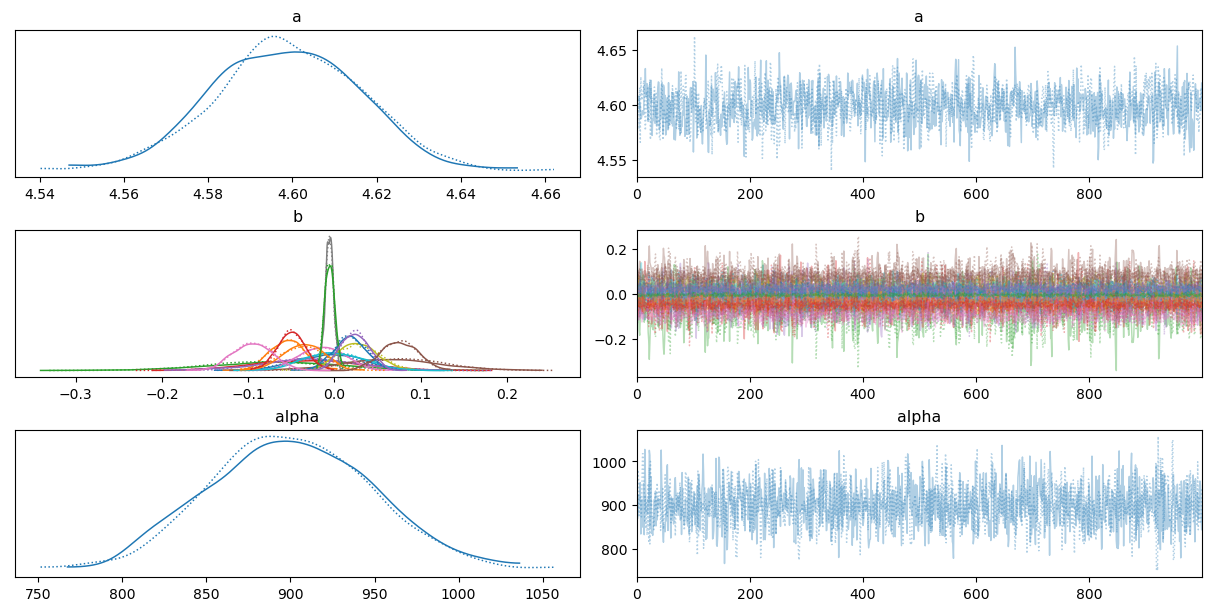

In [23]:
trace = az.plot_trace(free_sac_empathy_trace);

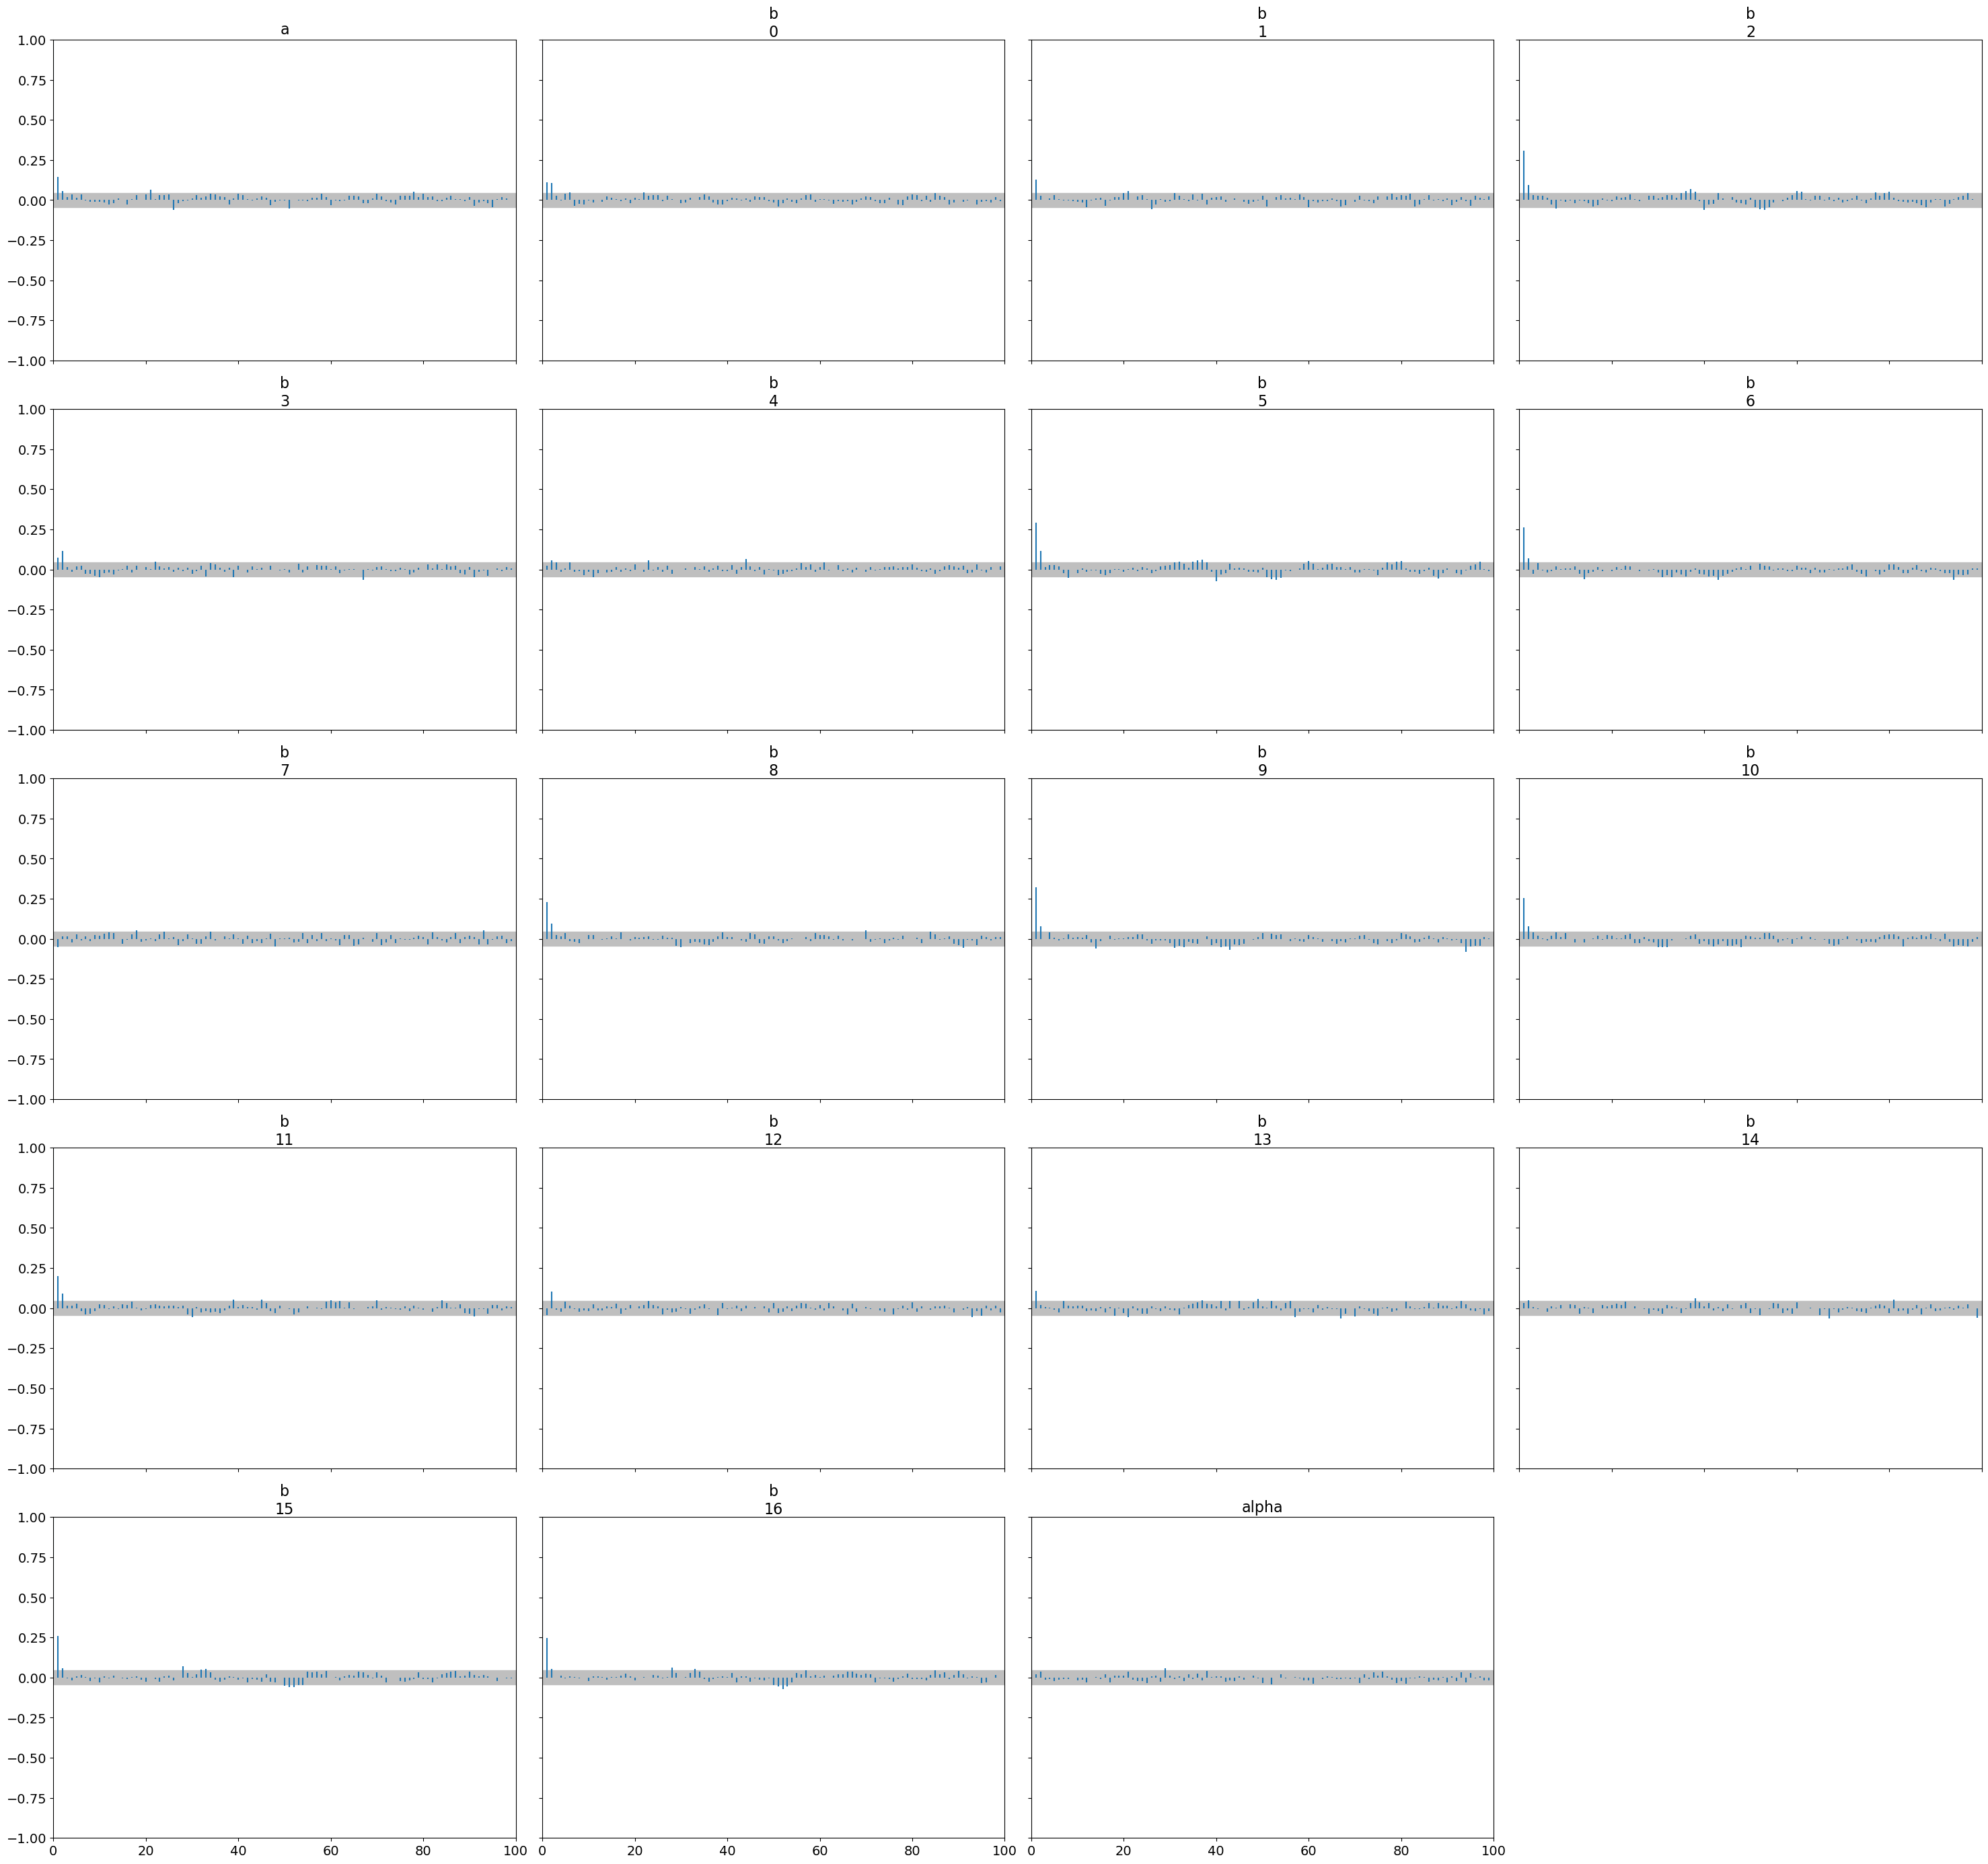

In [24]:
az.plot_autocorr(free_sac_empathy_trace, combined=True);

##### Posterior predictive check

In [25]:
free_sac_ppc = modeler.generate_model_ppc(free_sac_empathy, free_sac_empathy_trace)
sampled_labels = free_sac_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_sac_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.7
MAPE:6.49%


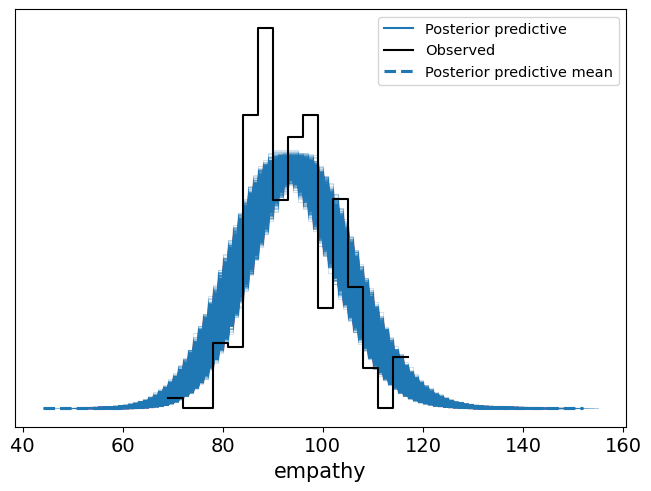

In [26]:
az.plot_ppc(free_sac_ppc);

##### Predictions

In [27]:
free_sac_predictions = modeler.generate_model_predictions(free_sac_empathy, free_sac_features_test, free_sac_empathy_trace)
rmse, mape = modeler.get_regression_evaluation(free_sac_predictions, free_sac_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:8.04
MAPE:6.75%


#### __Combined predictions__

In [28]:
free_fix_stimuli, free_sac_stimuli = loader.get_stimuli("test", "free")
predicted_empathy = modeler.combine_predictions(free_fix_predictions, free_fix_stimuli, free_sac_predictions, free_sac_stimuli)
real_empathy_values = [free_viewing_empathy[k[1]] for k in predicted_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_values, [level for level in predicted_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:8.7
MAPE:7.2%


### __Cognitive empathy__

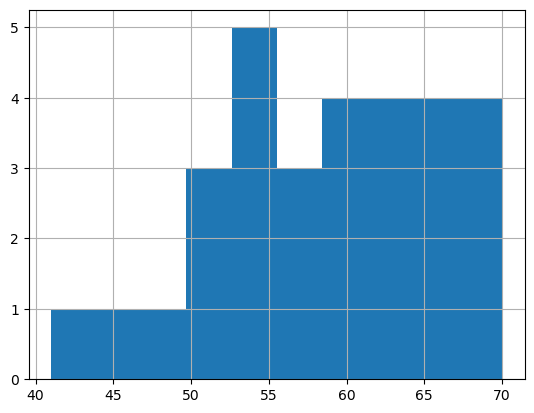

In [5]:
free_viewing_cognitive_empathy = loader.load_eyeT_empathy_levels(experiment="free", type="cognitive")
free_viewing_cognitive_empathy.hist();

#### __Fixations__

In [ ]:
free_fix_cog_features_train, free_fix_cog_labels_train, free_sac_cog_features_train, free_sac_cog_labels_train =  loader.get_eyeT_features_and_labels("train", "free", type="cognitive")

In [18]:
free_fix_cog_empathy, free_fix_cog_trace = modeler.generate_neg_binomial_regression_model("free_fix_cognitive_neg_bin_regression", free_fix_cog_features_train, free_fix_cog_labels_train)

##### Sampling diagnostics

In [13]:
az.summary(free_fix_cog_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.076   0.024    4.031    4.119      0.001    0.001    1106.0   
b[0]     0.066   0.177   -0.257    0.402      0.005    0.004    1242.0   
b[1]    -0.089   0.043   -0.170   -0.009      0.001    0.001    1099.0   
b[2]     0.232   0.186   -0.122    0.567      0.005    0.004    1290.0   
b[3]    -0.025   0.141   -0.302    0.222      0.004    0.003    1223.0   
b[4]    -0.051   0.032   -0.112    0.005      0.001    0.001    1499.0   
b[5]    -0.206   0.128   -0.440    0.031      0.004    0.003    1345.0   
b[6]    -0.158   0.057   -0.265   -0.049      0.002    0.001    1205.0   
b[7]     0.037   0.008    0.022    0.050      0.000    0.000    2538.0   
b[8]    -0.074   0.045   -0.155    0.015      0.001    0.001     959.0   
b[9]     0.113   0.065   -0.008    0.233      0.002    0.001    1116.0   
b[10]    0.044   0.025   -0.003    0.093      0.001    0.000    1596.0   
b[11]    0.022   0.044   -0.066    0.101      0.001    0.001    1009.0   
b[12]    0.211   0.033    0.150    0.276      0.001    0.001    2052.0   
b[13]    0.012   0.021   -0.026    0.053      0.001    0.000    1260.0   
b[14]   -0.007   0.024   -0.052    0.036      0.001    0.001    1274.0   
alpha  729.939  41.004  649.998  804.160      0.815    0.580    2554.0   

       ess_tail  r_hat  
a        1235.0    1.0  
b[0]     1282.0    1.0  
b[1]     1397.0    1.0  
b[2]     1254.0    1.0  
b[3]     1137.0    1.0  
b[4]     1341.0    1.0  
b[5]     1348.0    1.0  
b[6]     1481.0    1.0  
b[7]     1281.0    1.0  
b[8]     1093.0    1.0  
b[9]     1256.0    1.0  
b[10]    1395.0    1.0  
b[11]    1145.0    1.0  
b[12]    1507.0    1.0  
b[13]    1303.0    1.0  
b[14]    1253.0    1.0  
alpha    1500.0    1.0

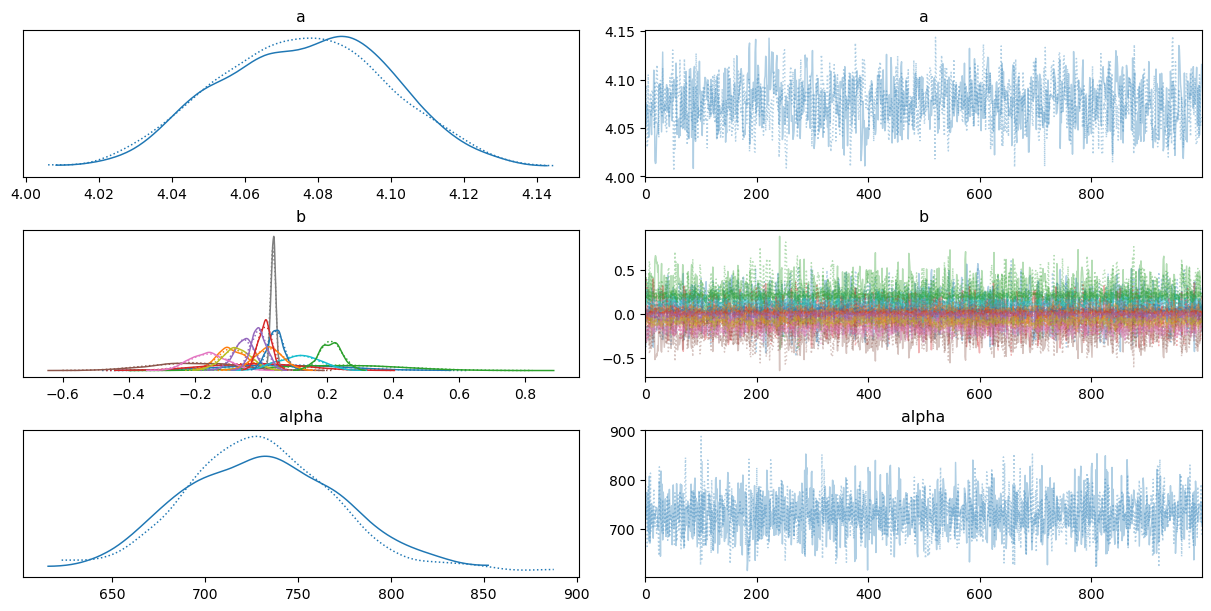

In [14]:
az.plot_trace(free_fix_cog_trace);

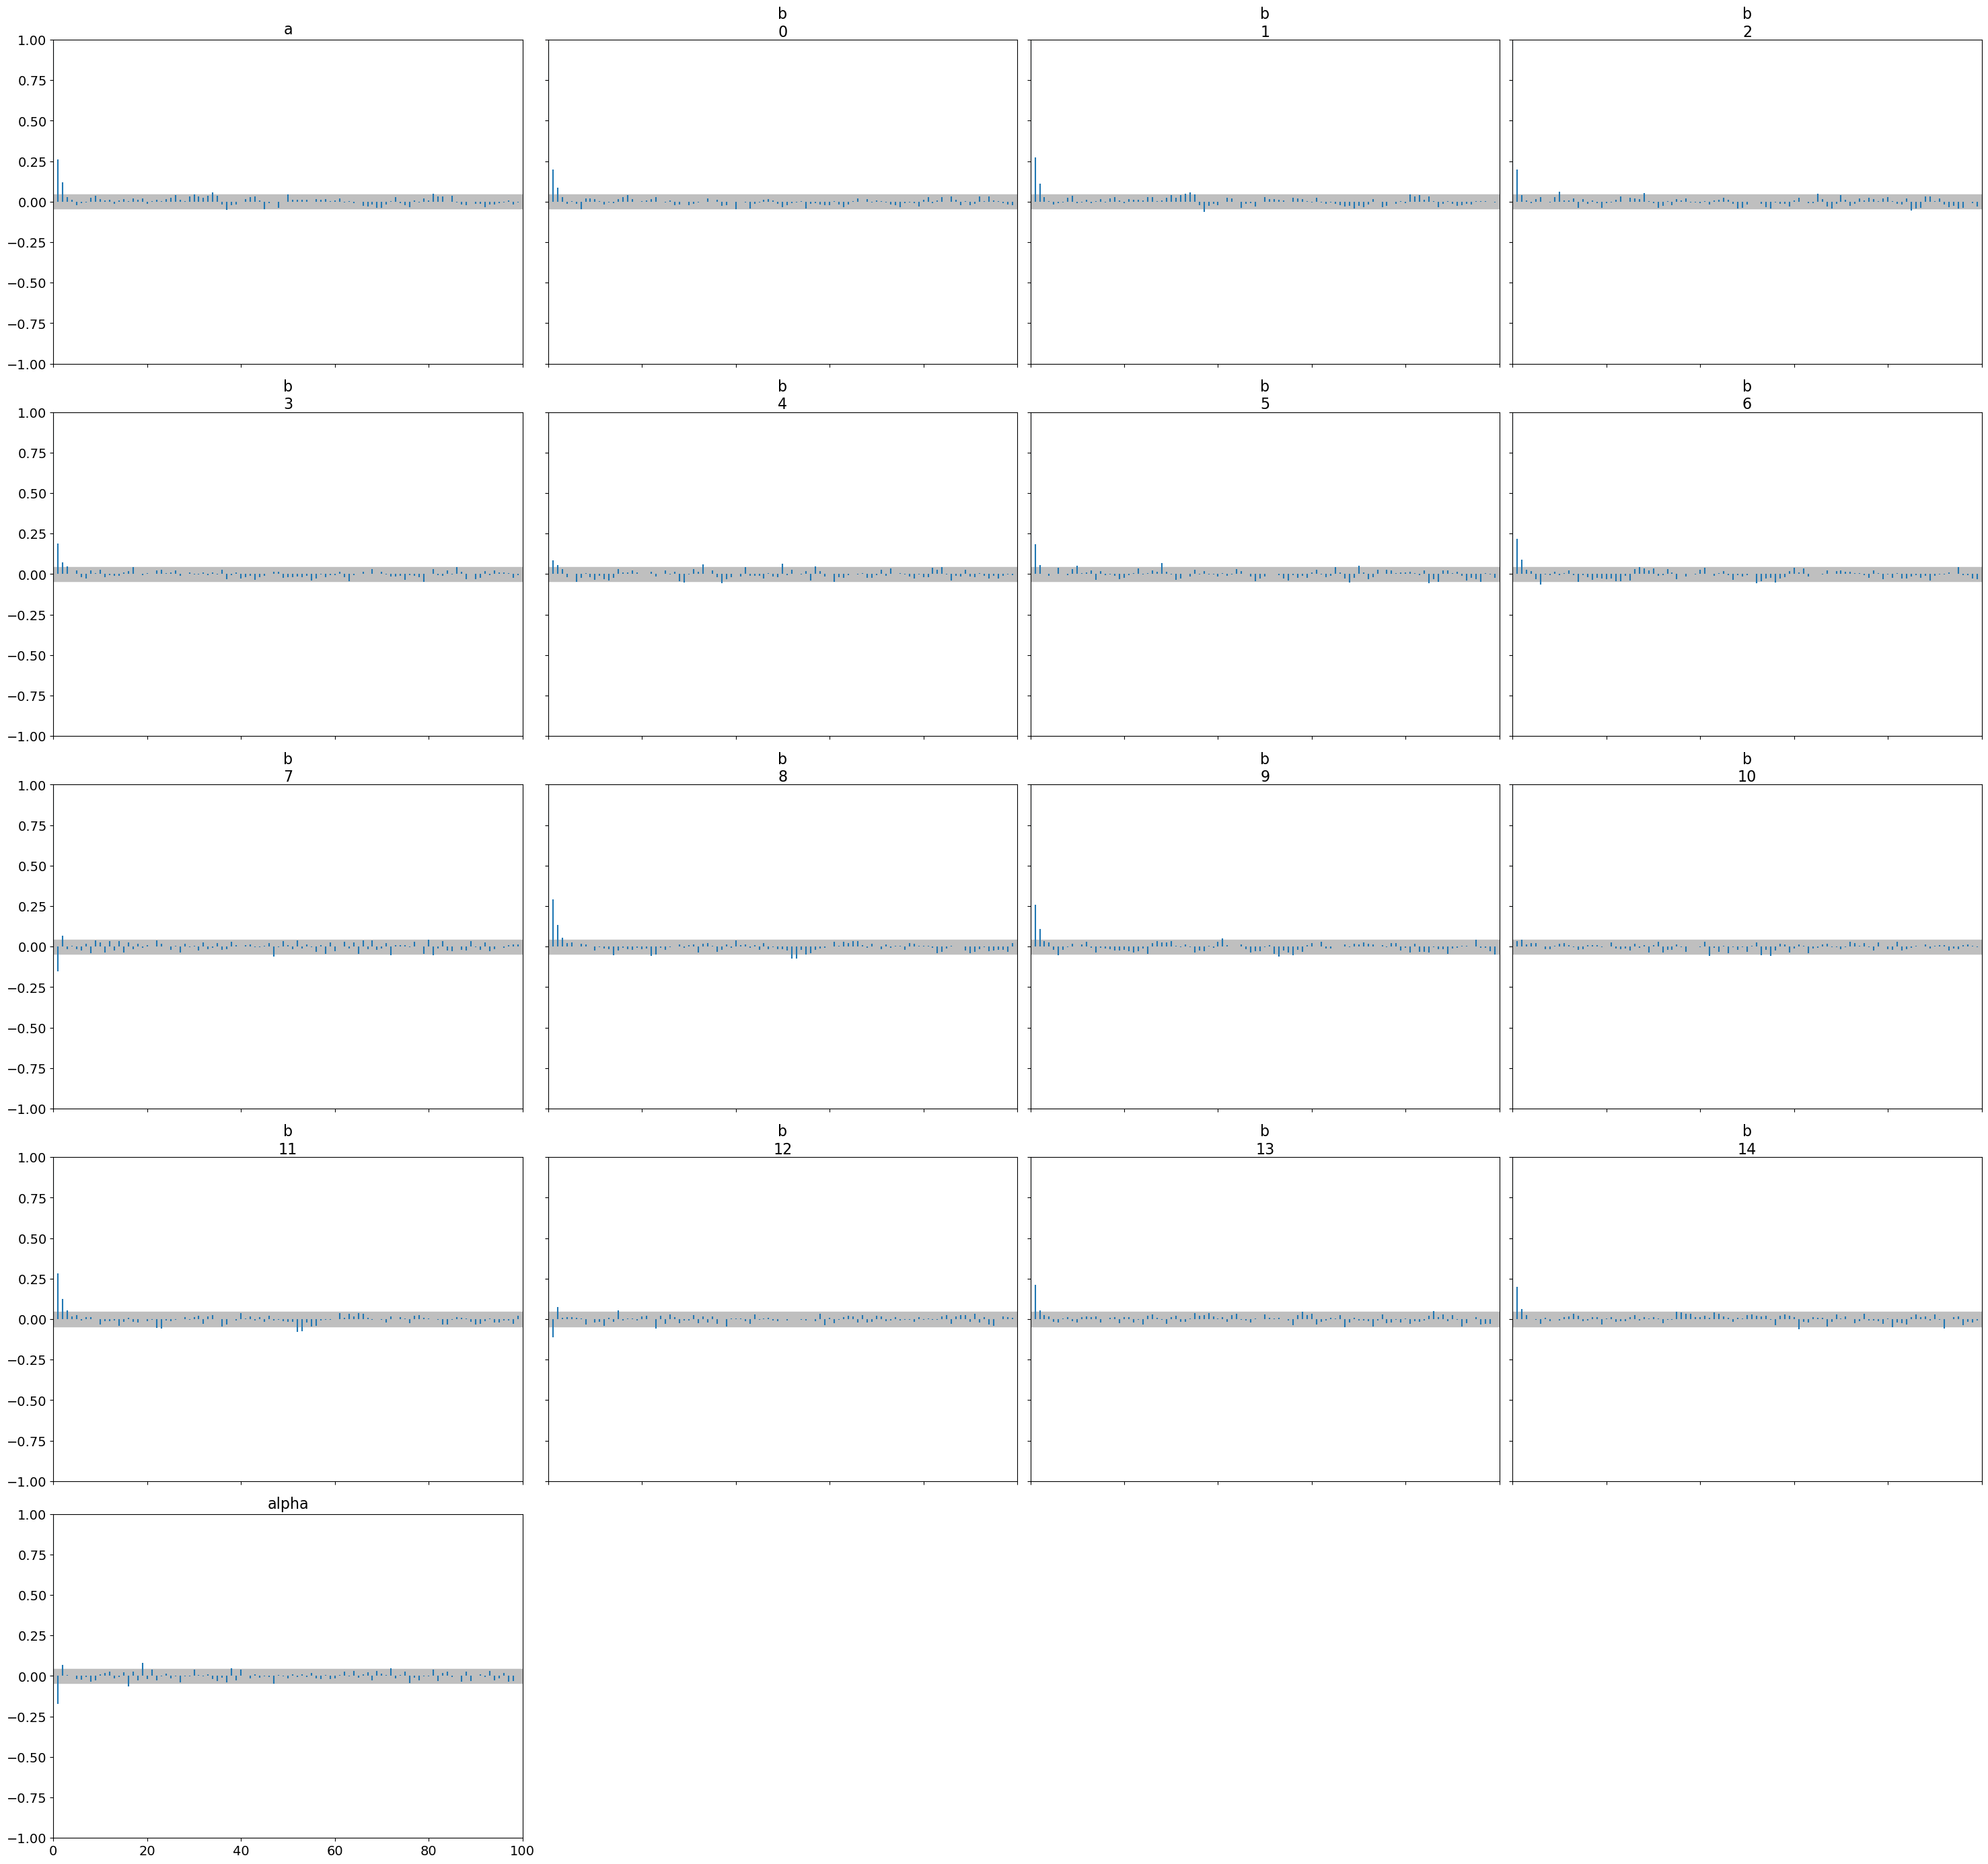

In [15]:
az.plot_autocorr(free_fix_cog_trace, combined=True);

##### Posterior predictive

In [17]:
free_fix_cog_ppc = modeler.generate_model_ppc(free_fix_cog_empathy, free_fix_cog_trace)
sampled_labels = free_fix_cog_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_fix_cog_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:6.61
MAPE:9.65%


##### Test predictions

In [19]:
free_fix_cog_features_test, free_fix_cog_labels_test, free_sac_cog_features_test, free_sac_cog_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free", type = "cognitive")
free_fix_cog_predictions = modeler.generate_model_predictions(free_fix_cog_empathy, free_fix_cog_features_test, free_fix_cog_trace)

In [20]:
rmse, mape = modeler.get_regression_evaluation(free_fix_cog_predictions, free_fix_cog_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.04
MAPE:10.16%


#### __Saccades__

In [20]:
free_sac_cog_empathy, free_sac_cog_trace = modeler.generate_neg_binomial_regression_model("free_sac_cognitive_neg_bin_regression", free_sac_cog_features_train, free_sac_cog_labels_train)

##### Sampling diagnostics

In [21]:
az.summary(free_sac_cog_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.107   0.022    4.068    4.152      0.001    0.000    1287.0   
b[0]    -0.005   0.049   -0.099    0.084      0.001    0.001    1212.0   
b[1]    -0.060   0.027   -0.110   -0.008      0.001    0.001    1365.0   
b[2]    -0.010   0.092   -0.175    0.168      0.002    0.002    1621.0   
b[3]     0.044   0.078   -0.093    0.195      0.002    0.002    1076.0   
b[4]    -0.060   0.070   -0.197    0.056      0.002    0.001    1841.0   
b[5]    -0.033   0.069   -0.162    0.091      0.002    0.001    1704.0   
b[6]    -0.029   0.034   -0.094    0.034      0.001    0.001     963.0   
b[7]     0.006   0.006   -0.005    0.016      0.000    0.000    1396.0   
b[8]     0.041   0.029   -0.014    0.095      0.001    0.001    1342.0   
b[9]     0.019   0.045   -0.058    0.110      0.002    0.001     879.0   
b[10]   -0.010   0.023   -0.051    0.035      0.001    0.001     976.0   
b[11]   -0.062   0.031   -0.119   -0.005      0.001    0.001    1393.0   
b[12]    0.007   0.007   -0.007    0.021      0.000    0.000    1357.0   
b[13]   -0.107   0.019   -0.145   -0.073      0.000    0.000    1748.0   
b[14]    0.081   0.021    0.040    0.118      0.000    0.000    1900.0   
b[15]    0.046   0.027   -0.007    0.093      0.001    0.000    1591.0   
b[16]   -0.008   0.028   -0.059    0.044      0.001    0.001    1602.0   
alpha  615.912  39.358  547.704  694.090      0.774    0.553    2610.0   

       ess_tail  r_hat  
a        1482.0    1.0  
b[0]     1185.0    1.0  
b[1]     1357.0    1.0  
b[2]     1483.0    1.0  
b[3]     1486.0    1.0  
b[4]     1631.0    1.0  
b[5]     1387.0    1.0  
b[6]      945.0    1.0  
b[7]     1202.0    1.0  
b[8]     1388.0    1.0  
b[9]      984.0    1.0  
b[10]    1261.0    1.0  
b[11]    1393.0    1.0  
b[12]    1552.0    1.0  
b[13]    1719.0    1.0  
b[14]    1386.0    1.0  
b[15]    1221.0    1.0  
b[16]    1188.0    1.0  
alpha    1503.0    1.0

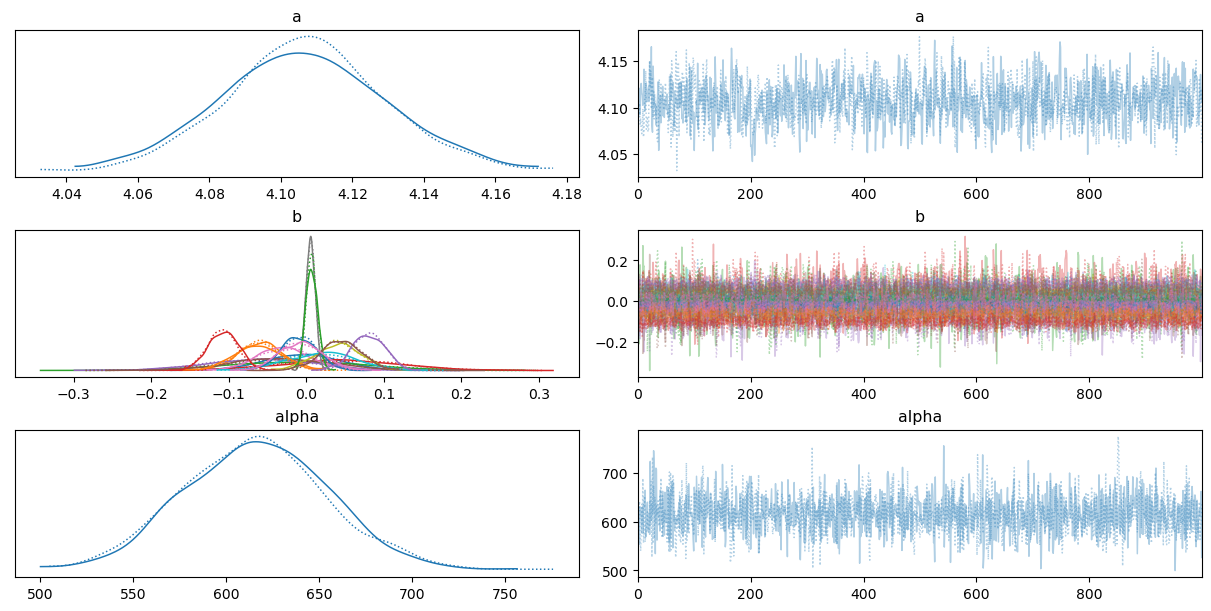

In [22]:
az.plot_trace(free_sac_cog_trace);

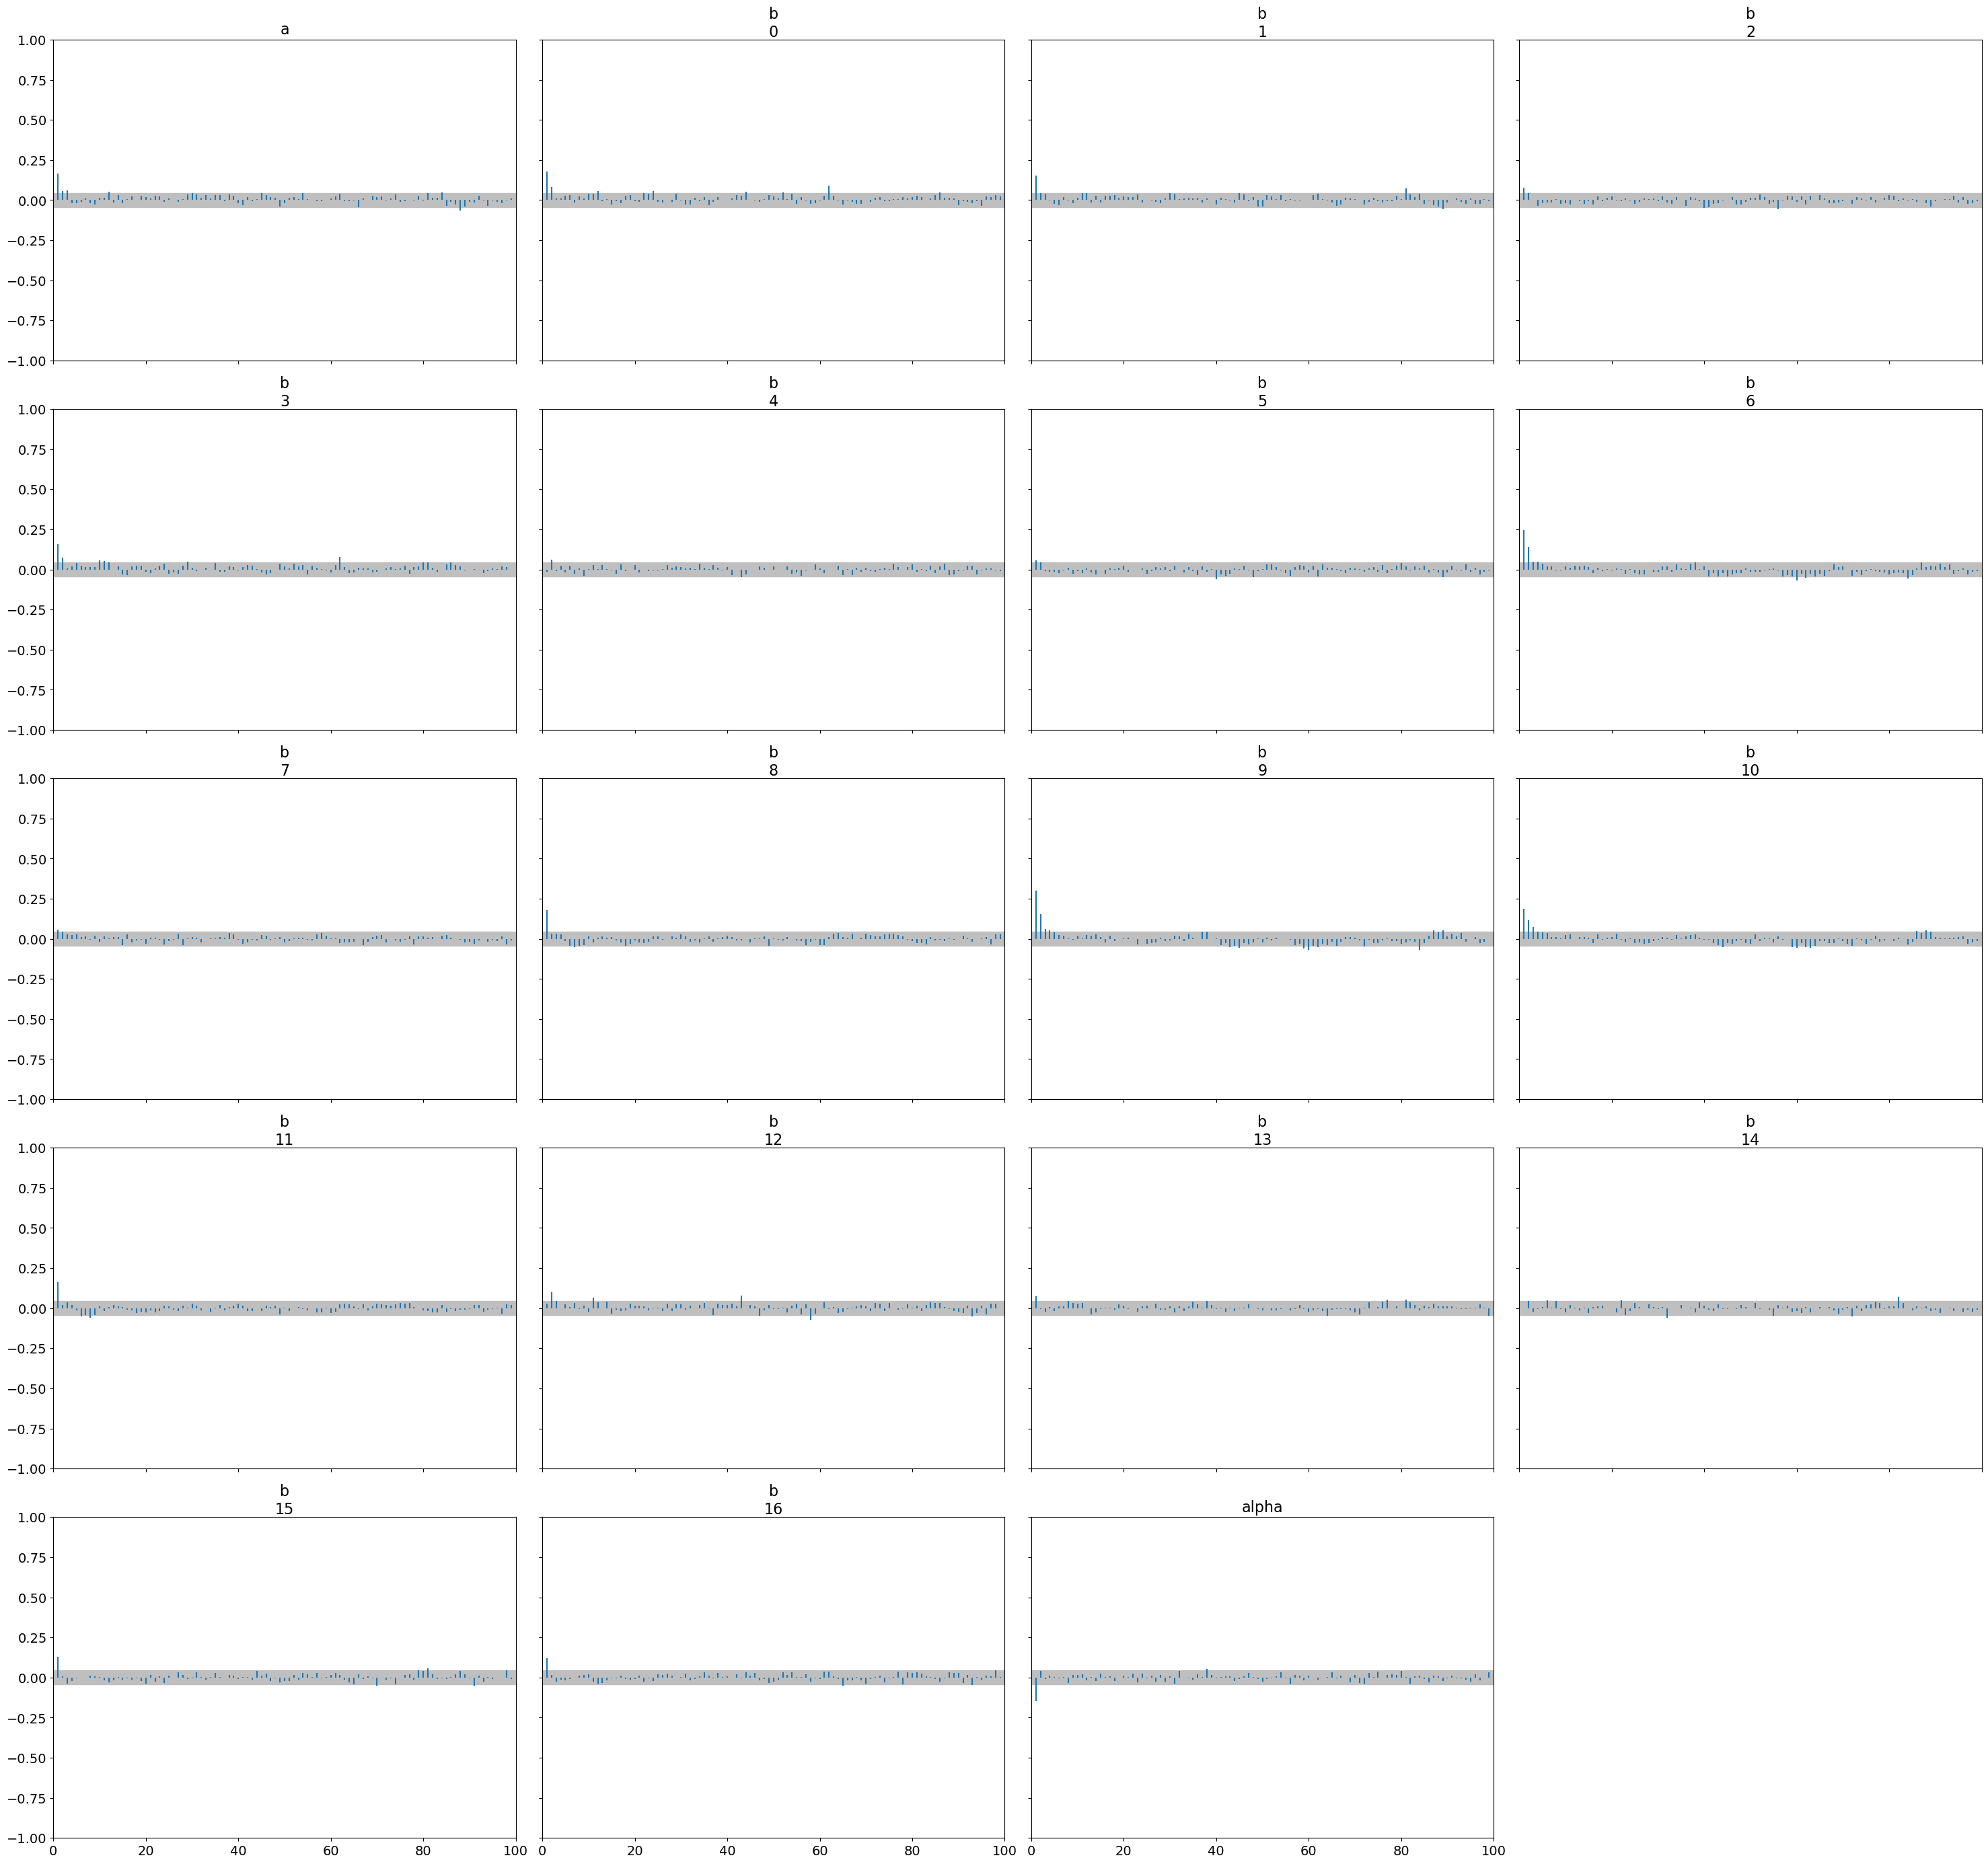

In [23]:
az.plot_autocorr(free_sac_cog_trace, combined=True);

##### Posterior predictive check

In [12]:
free_sac_cog_ppc = modeler.generate_model_ppc(free_sac_cog_empathy, free_sac_cog_trace)
sampled_labels = free_sac_cog_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_sac_cog_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:6.55
MAPE:9.52%


##### Test predictions

In [13]:
free_fix_cog_features_test, free_fix_cog_labels_test, free_sac_cog_features_test, free_sac_cog_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free", type = "cognitive")
free_sac_cog_predictions = modeler.generate_model_predictions(free_sac_cog_empathy, free_sac_cog_features_test, free_sac_cog_trace)

In [14]:
rmse, mape = modeler.get_regression_evaluation(free_sac_cog_predictions, free_sac_cog_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.04
MAPE:10.18%


#### __Combined predictions__

In [23]:
free_fix_cog_stimuli, free_sac_cog_stimuli = loader.get_stimuli("test", "free")
predicted_empathy = modeler.combine_predictions(free_fix_cog_predictions, free_fix_cog_stimuli, free_sac_cog_predictions, free_sac_cog_stimuli)
real_empathy_cog_values = [free_viewing_cognitive_empathy[k[1]] for k in predicted_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_cog_values, [level for level in predicted_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:6.96
MAPE:10.1%


### __Affective empathy__

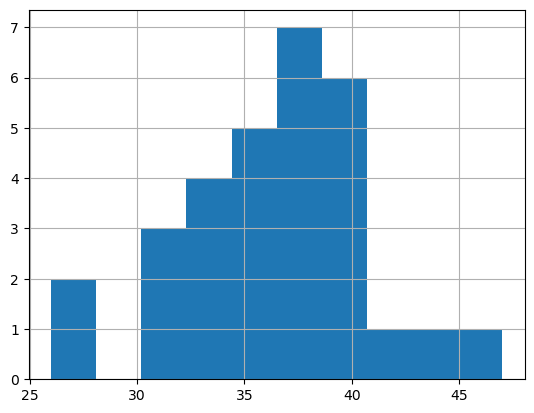

In [26]:
free_viewing_affective_empathy = loader.load_eyeT_empathy_levels(experiment="free", type="affective")
free_viewing_affective_empathy.hist();

#### __Fixations__

In [38]:
free_fix_aff_features_train, free_fix_aff_labels_train, free_sac_aff_features_train, free_sac_aff_labels_train =  loader.get_eyeT_features_and_labels("train", "free", type="affective")

In [22]:
free_fix_aff_empathy, free_fix_aff_trace = modeler.generate_neg_binomial_regression_model("free_fix_affective_neg_bin_regression", free_fix_aff_features_train, free_fix_aff_labels_train)

##### Sampling diagnostics

In [41]:
az.summary(free_fix_aff_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        3.563   0.028    3.509    3.614      0.001    0.001    1205.0   
b[0]     0.246   0.211   -0.179    0.618      0.005    0.004    1531.0   
b[1]     0.061   0.048   -0.028    0.150      0.001    0.001    1176.0   
b[2]     0.208   0.231   -0.201    0.650      0.007    0.005    1047.0   
b[3]    -0.147   0.168   -0.473    0.154      0.004    0.003    1529.0   
b[4]    -0.008   0.038   -0.078    0.065      0.001    0.001    1849.0   
b[5]    -0.104   0.157   -0.394    0.180      0.005    0.004    1043.0   
b[6]     0.244   0.071    0.113    0.374      0.002    0.002    1030.0   
b[7]    -0.074   0.010   -0.093   -0.055      0.000    0.000    2568.0   
b[8]    -0.053   0.057   -0.166    0.048      0.002    0.001     979.0   
b[9]    -0.424   0.083   -0.571   -0.262      0.003    0.002    1005.0   
b[10]    0.244   0.033    0.186    0.306      0.001    0.001    1830.0   
b[11]    0.030   0.055   -0.066    0.139      0.002    0.001     996.0   
b[12]    0.108   0.041    0.031    0.182      0.001    0.001    1730.0   
b[13]    0.157   0.027    0.107    0.208      0.001    0.001    1398.0   
b[14]   -0.248   0.031   -0.306   -0.191      0.001    0.001    1403.0   
alpha  835.959  43.960  754.211  918.176      0.916    0.649    2307.0   

       ess_tail  r_hat  
a        1362.0    1.0  
b[0]     1481.0    1.0  
b[1]     1476.0    1.0  
b[2]     1239.0    1.0  
b[3]     1540.0    1.0  
b[4]     1189.0    1.0  
b[5]     1240.0    1.0  
b[6]     1117.0    1.0  
b[7]     1348.0    1.0  
b[8]     1177.0    1.0  
b[9]     1158.0    1.0  
b[10]    1496.0    1.0  
b[11]    1111.0    1.0  
b[12]    1402.0    1.0  
b[13]    1311.0    1.0  
b[14]    1228.0    1.0  
alpha    1215.0    1.0

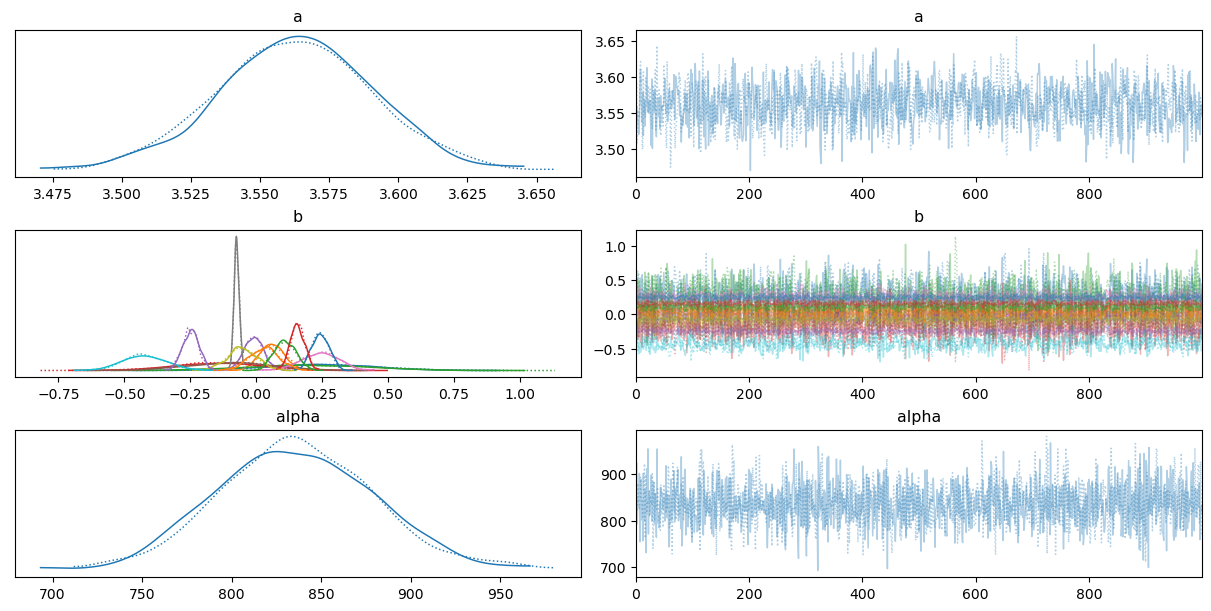

In [42]:
az.plot_trace(free_fix_aff_trace);

In [ ]:
az.plot_autocorr(free_fix_aff_trace)

##### Posterior predictive

In [19]:
free_fix_aff_ppc = modeler.generate_model_ppc(free_fix_aff_empathy, free_fix_aff_trace)
sampled_labels = free_fix_aff_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_fix_aff_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.9
MAPE:8.45%


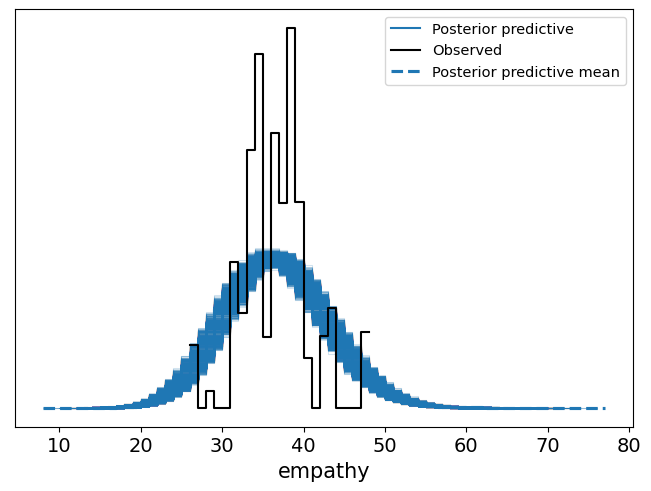

In [23]:
az.plot_ppc(free_fix_aff_ppc);

##### Test predictions

In [24]:
free_fix_aff_features_test, free_fix_aff_labels_test, free_sac_aff_features_test, free_sac_aff_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free", type = "affective")
free_fix_aff_predictions = modeler.generate_model_predictions(free_fix_aff_empathy, free_fix_aff_features_test, free_fix_aff_trace)

In [45]:
rmse, mape = modeler.get_regression_evaluation(free_fix_aff_predictions, free_fix_aff_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.54
MAPE:7.27%


#### __Saccades__

In [14]:
free_fix_aff_features_train, free_fix_aff_labels_train, free_sac_aff_features_train, free_sac_aff_labels_train =  loader.get_eyeT_features_and_labels("train", "free", type="affective")
free_sac_aff_empathy, free_sac_aff_trace = modeler.generate_neg_binomial_regression_model("free_sac_affective_neg_bin_regression", free_sac_aff_features_train, free_sac_aff_labels_train)

##### Sampling diagnostics

In [6]:
az.summary(free_sac_aff_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        3.653   0.029    3.600    3.707      0.001    0.001    1101.0   
b[0]    -0.001   0.063   -0.105    0.132      0.002    0.001    1025.0   
b[1]    -0.044   0.035   -0.107    0.021      0.001    0.001    1333.0   
b[2]    -0.162   0.117   -0.372    0.078      0.003    0.002    1484.0   
b[3]    -0.155   0.101   -0.345    0.032      0.003    0.002     977.0   
b[4]     0.026   0.090   -0.148    0.185      0.002    0.002    1728.0   
b[5]     0.229   0.087    0.055    0.382      0.002    0.002    1532.0   
b[6]     0.015   0.043   -0.069    0.092      0.001    0.001    1327.0   
b[7]    -0.024   0.007   -0.039   -0.011      0.000    0.000    1918.0   
b[8]     0.006   0.037   -0.069    0.072      0.001    0.001    1818.0   
b[9]    -0.040   0.057   -0.149    0.065      0.002    0.001    1249.0   
b[10]    0.066   0.029    0.013    0.122      0.001    0.001    1350.0   
b[11]    0.001   0.039   -0.067    0.077      0.001    0.001    1841.0   
b[12]   -0.026   0.009   -0.041   -0.008      0.000    0.000    1277.0   
b[13]    0.042   0.025   -0.003    0.089      0.001    0.000    1718.0   
b[14]   -0.068   0.027   -0.119   -0.020      0.001    0.000    1907.0   
b[15]    0.125   0.033    0.063    0.188      0.001    0.001    1465.0   
b[16]   -0.241   0.035   -0.307   -0.177      0.001    0.001    1535.0   
alpha  683.353  40.751  601.344  756.948      0.808    0.571    2489.0   

       ess_tail  r_hat  
a        1269.0   1.01  
b[0]      952.0   1.00  
b[1]     1541.0   1.00  
b[2]     1258.0   1.00  
b[3]      993.0   1.01  
b[4]     1478.0   1.00  
b[5]     1262.0   1.00  
b[6]     1275.0   1.00  
b[7]     1483.0   1.00  
b[8]     1449.0   1.00  
b[9]     1204.0   1.00  
b[10]    1193.0   1.00  
b[11]    1508.0   1.00  
b[12]    1352.0   1.00  
b[13]    1328.0   1.00  
b[14]    1339.0   1.00  
b[15]    1394.0   1.00  
b[16]    1517.0   1.00  
alpha    1669.0   1.00

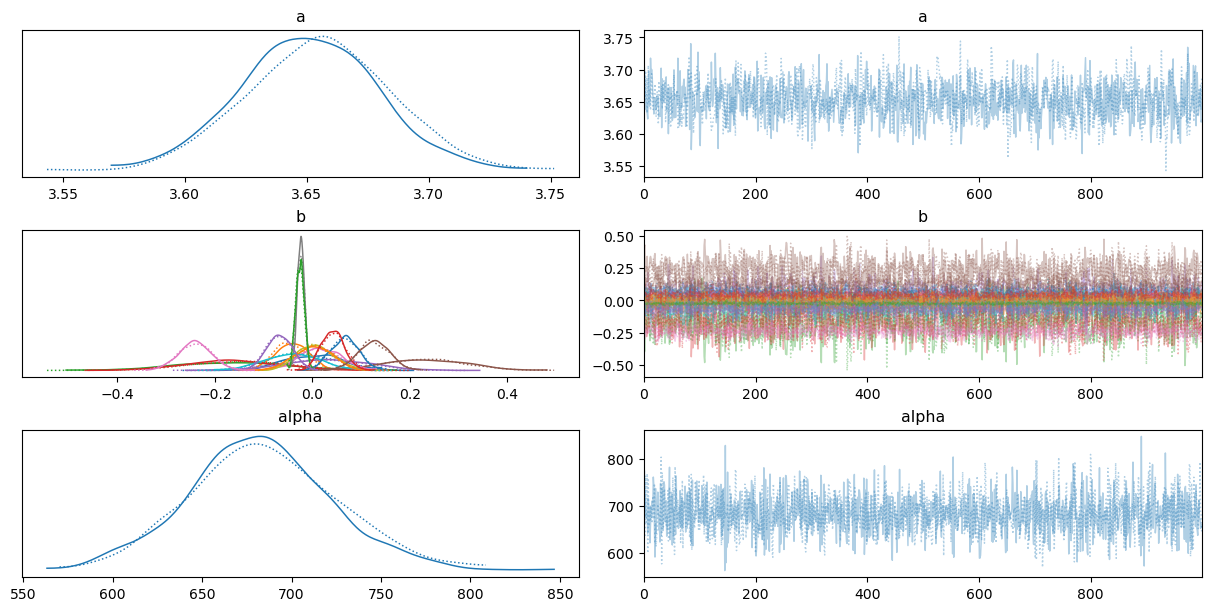

In [7]:
az.plot_trace(free_sac_aff_trace);

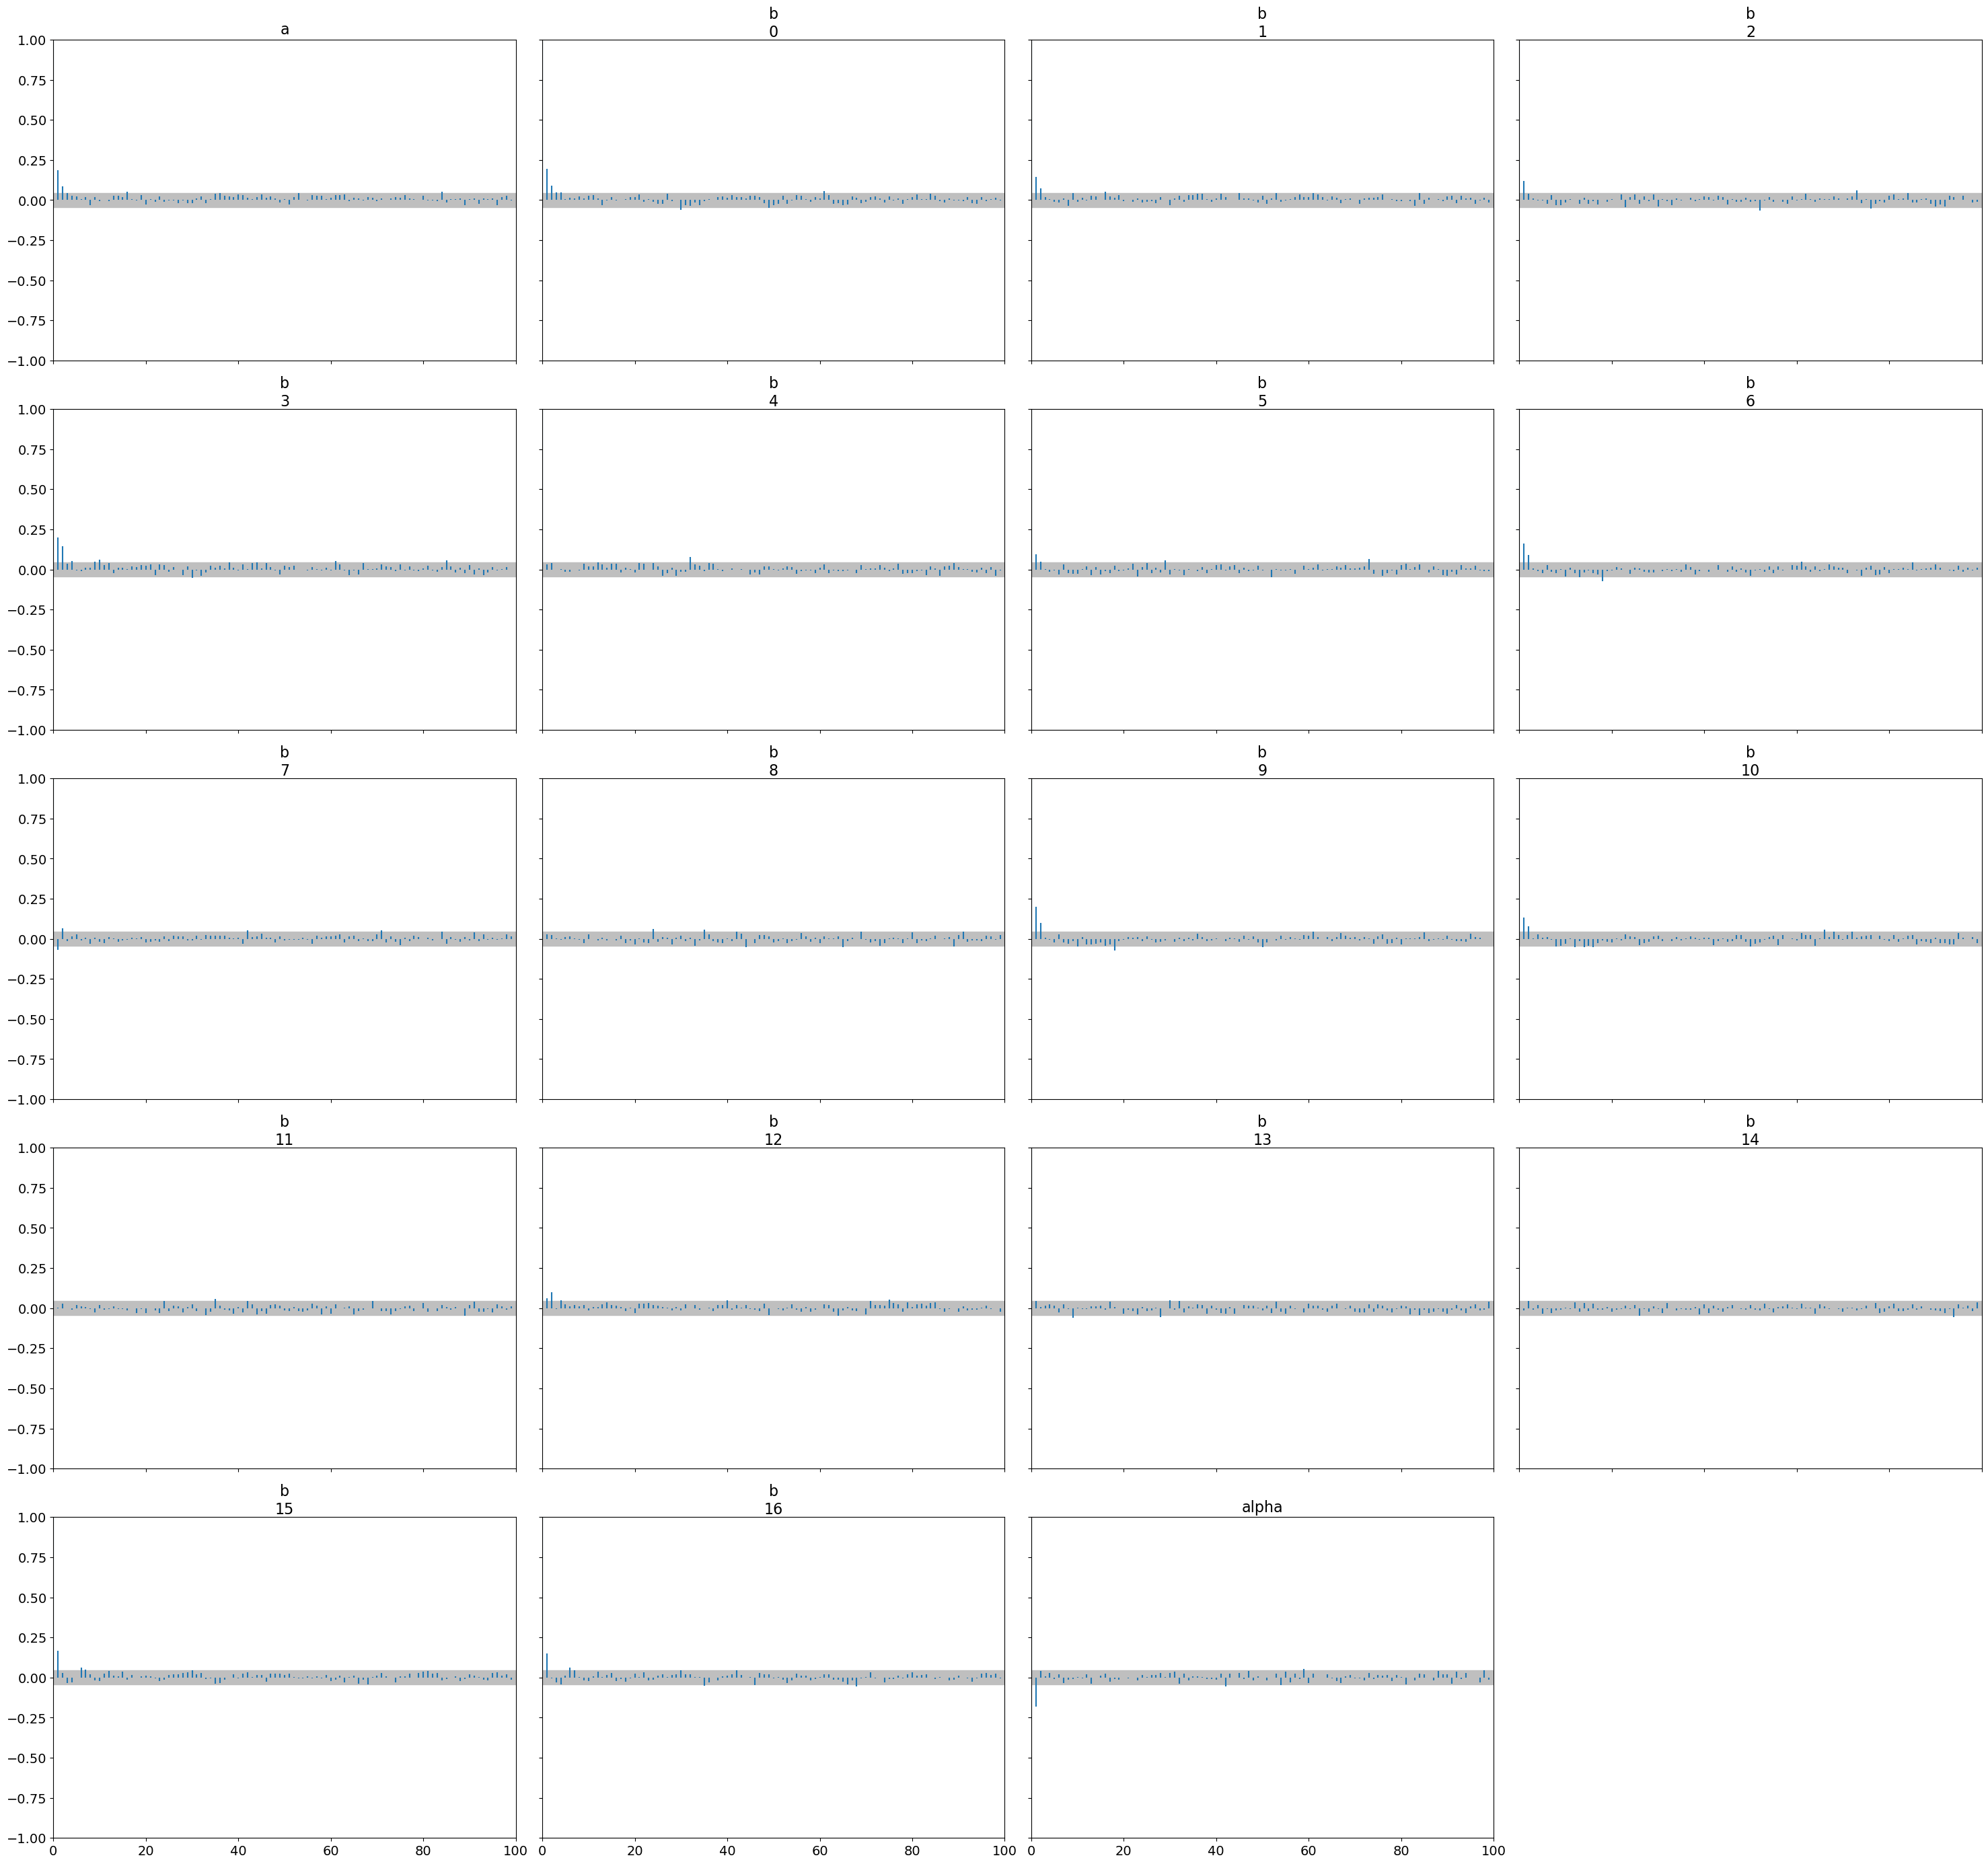

In [15]:
az.plot_autocorr(free_sac_aff_trace, combined=True);

##### Posterior predictive

In [9]:
free_sac_aff_ppc = modeler.generate_model_ppc(free_sac_aff_empathy, free_sac_aff_trace)
sampled_labels = free_sac_aff_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(free_sac_aff_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.83
MAPE:8.32%


<AxesSubplot: xlabel='empathy'>

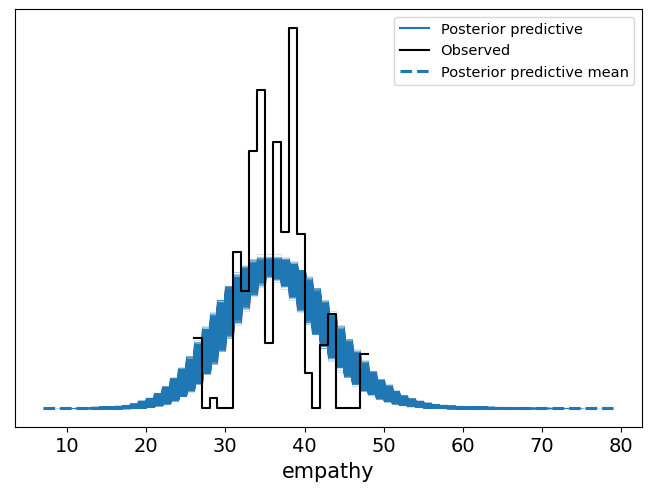

In [10]:
az.plot_ppc(free_sac_aff_ppc)

##### Test predictions

In [11]:
free_fix_aff_features_test, free_fix_aff_labels_test, free_sac_aff_features_test, free_sac_aff_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="free", type = "affective")
free_sac_aff_predictions = modeler.generate_model_predictions(free_sac_aff_empathy, free_sac_aff_features_test, free_sac_aff_trace)
rmse, mape = modeler.get_regression_evaluation(free_sac_aff_predictions, free_sac_aff_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.59
MAPE:7.11%


#### __Combined predictions__

In [27]:
free_fix_aff_stimuli, free_sac_aff_stimuli = loader.get_stimuli("test", "free")
predicted_empathy = modeler.combine_predictions(free_fix_aff_predictions, free_fix_aff_stimuli, free_sac_aff_predictions, free_sac_aff_stimuli)
real_empathy_aff_values = [free_viewing_affective_empathy[k[1]] for k in predicted_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_aff_values, [level for level in predicted_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.66
MAPE:7.82%


## __Task oriented__

### __General empathy__

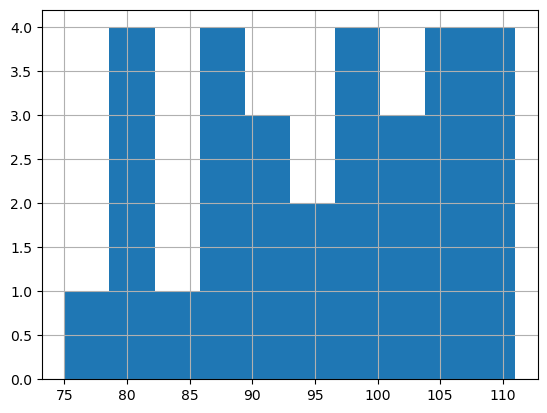

In [6]:
task_oriented_empathy = loader.load_eyeT_empathy_levels(experiment="task")
task_oriented_empathy.hist();

In [7]:
task_oriented_empathy.describe()

count     30.000000
mean      94.966667
std       10.600857
min       75.000000
25%       86.250000
50%       96.500000
75%      103.750000
max      111.000000
Name: Total Score original, dtype: float64

#### __Fixations__

In [30]:
task_fix_features_train, task_fix_labels_train, task_sac_features_train, task_sac_labels_train =  loader.get_eyeT_features_and_labels("train", "task")

In [31]:
task_fix_empathy, task_fix_empathy_trace = modeler.generate_neg_binomial_regression_model("task_fix_neg_bin_regression", task_fix_features_train, task_fix_labels_train)

##### Sampling diagnostics

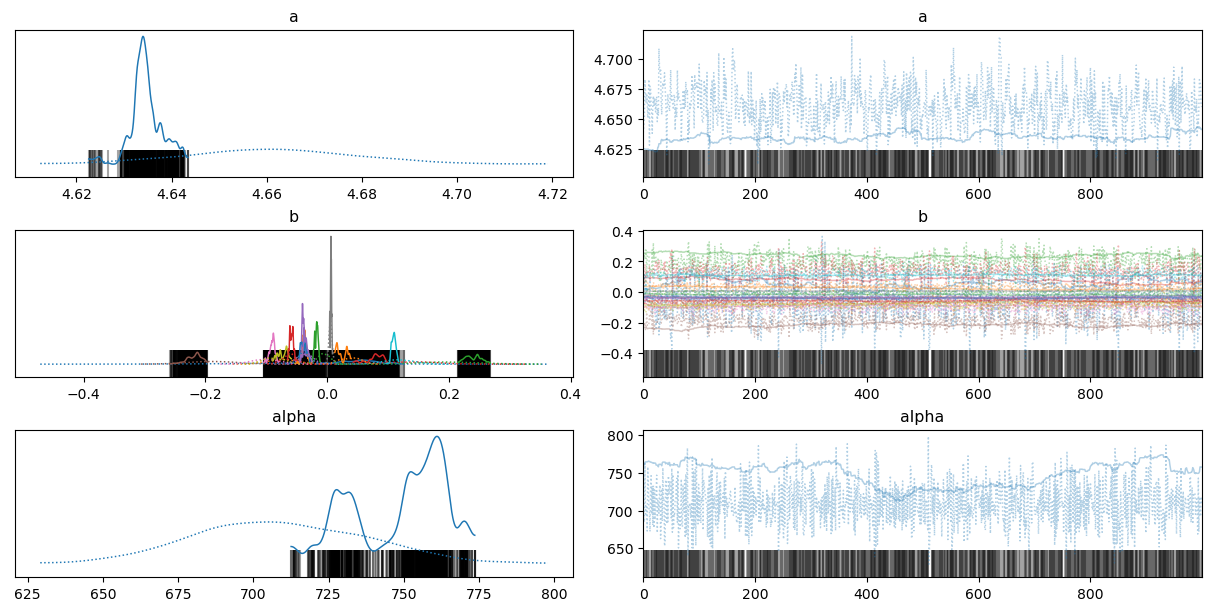

In [32]:
az.plot_trace(task_fix_empathy_trace);

In [33]:
az.summary(task_fix_empathy_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.648   0.018    4.628    4.688      0.010    0.007       4.0   
b[0]    -0.003   0.102   -0.223    0.126      0.042    0.032       7.0   
b[1]    -0.056   0.025   -0.108   -0.029      0.013    0.010       4.0   
b[2]     0.219   0.044    0.124    0.287      0.016    0.012       9.0   
b[3]     0.106   0.047    0.043    0.199      0.021    0.016       5.0   
b[4]    -0.039   0.008   -0.059   -0.023      0.000    0.000     333.0   
b[5]    -0.204   0.033   -0.257   -0.130      0.011    0.008      11.0   
b[6]    -0.096   0.017   -0.135   -0.067      0.003    0.003      35.0   
b[7]     0.006   0.002    0.002    0.010      0.000    0.000      83.0   
b[8]    -0.081   0.015   -0.110   -0.057      0.007    0.005       5.0   
b[9]     0.113   0.018    0.078    0.155      0.001    0.002     166.0   
b[10]   -0.038   0.007   -0.052   -0.022      0.001    0.001      65.0   
b[11]    0.031   0.015    0.013    0.063      0.006    0.005       5.0   
b[12]   -0.012   0.010   -0.025    0.008      0.005    0.004       5.0   
b[13]   -0.060   0.009   -0.082   -0.046      0.001    0.001      75.0   
b[14]   -0.034   0.008   -0.049   -0.016      0.001    0.001      39.0   
alpha  728.753  30.315  672.103  771.727     14.905   11.414       5.0   

       ess_tail  r_hat  
a          83.0   1.43  
b[0]      133.0   1.27  
b[1]       66.0   1.47  
b[2]       84.0   1.32  
b[3]      130.0   1.33  
b[4]       64.0   1.36  
b[5]      135.0   1.25  
b[6]       70.0   1.31  
b[7]       91.0   1.16  
b[8]      145.0   1.30  
b[9]       83.0   1.43  
b[10]      79.0   1.09  
b[11]      86.0   1.30  
b[12]     101.0   1.38  
b[13]      69.0   1.18  
b[14]      56.0   1.15  
alpha      64.0   1.35

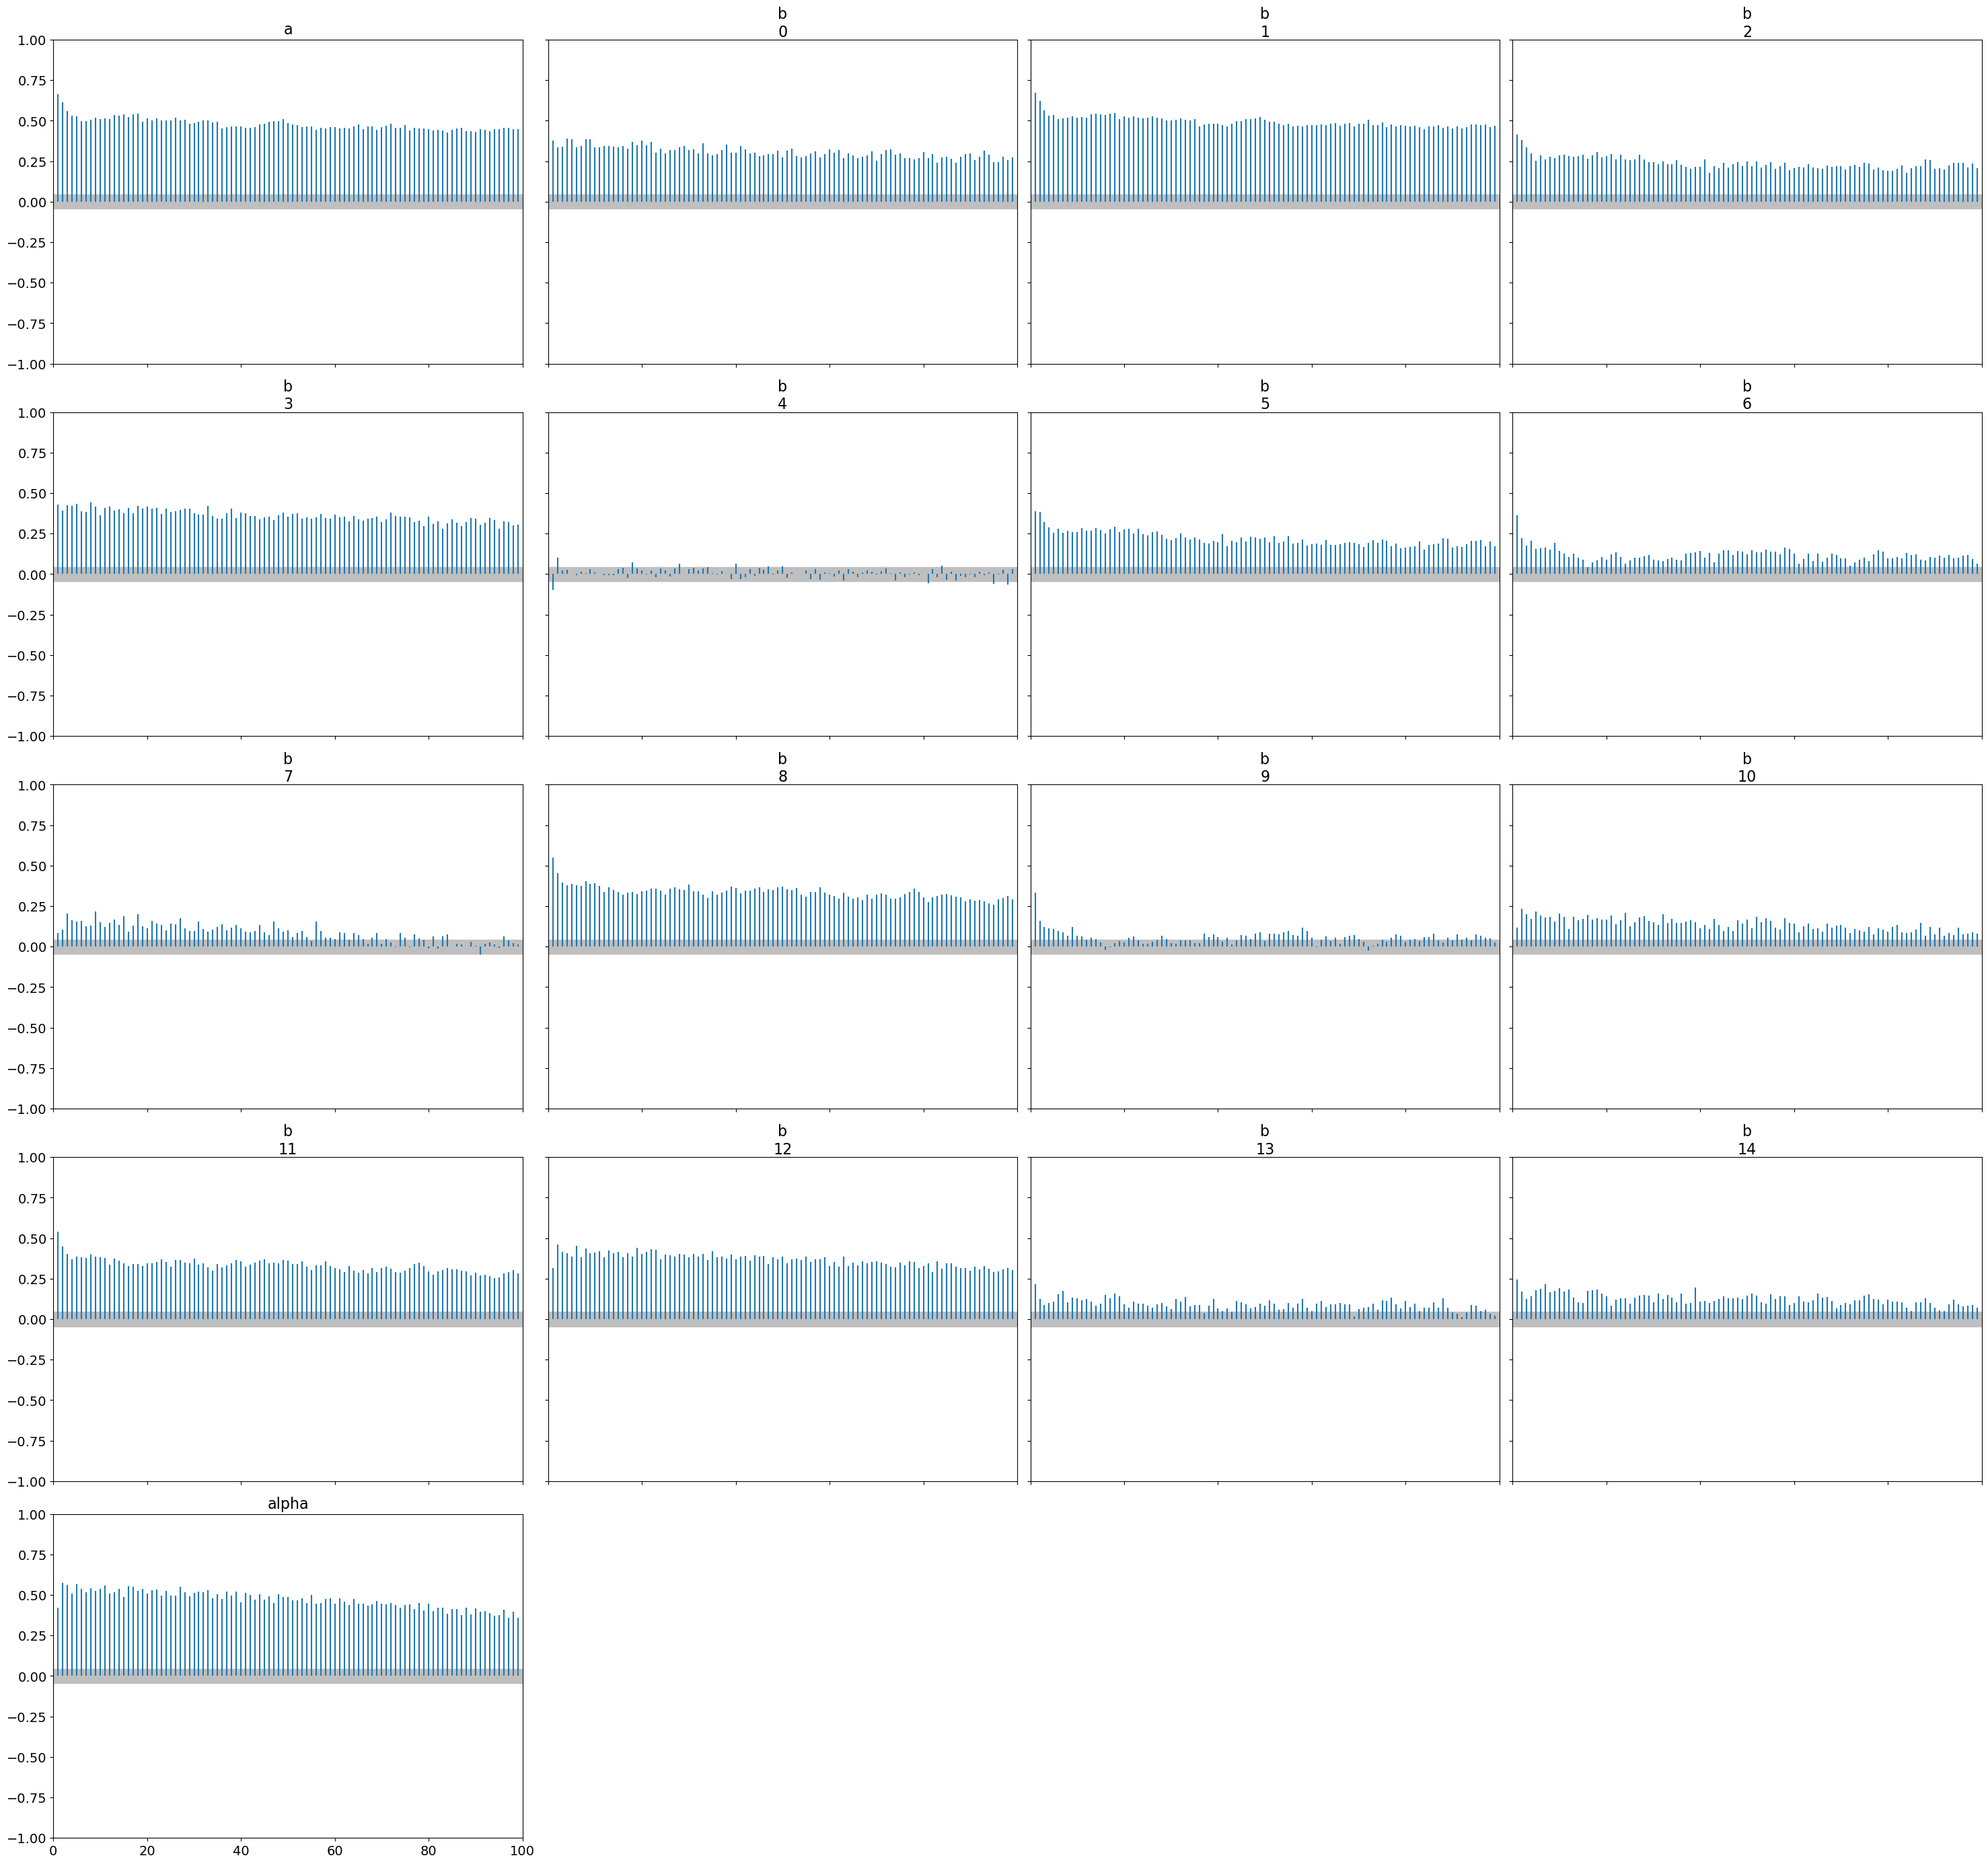

In [34]:
az.plot_autocorr(task_fix_empathy_trace, combined=True);

##### Posterior predictive check

In [35]:
task_fix_ppc = modeler.generate_model_ppc(task_fix_empathy, task_fix_empathy_trace)

In [36]:
sampled_labels = task_fix_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(task_fix_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.14
MAPE:9.93%


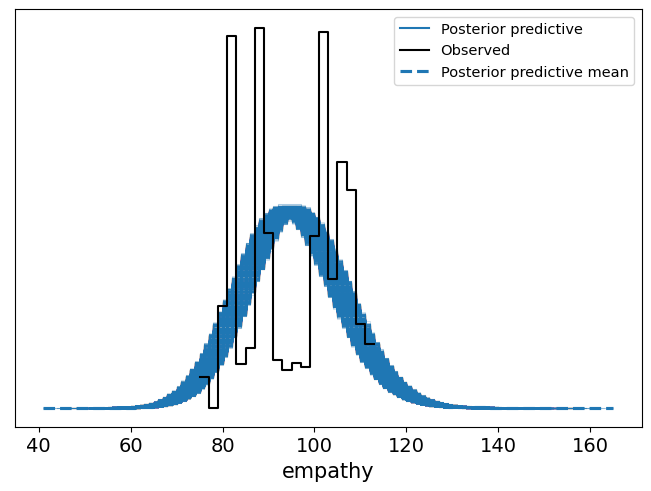

In [37]:
az.plot_ppc(task_fix_ppc);

##### Test predictions

In [32]:
task_fix_features_test, task_fix_labels_test, task_sac_features_test, task_sac_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="task")
task_fix_predictions = modeler.generate_model_predictions(task_fix_empathy, task_fix_features_test, task_fix_empathy_trace)
rmse, mape = modeler.get_regression_evaluation(task_fix_predictions, task_fix_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.24
MAPE:9.54%


#### __Saccades__

In [33]:
task_sac_empathy, task_sac_empathy_trace = modeler.generate_neg_binomial_regression_model("task_sac_neg_bin_regression", task_sac_features_train, task_sac_labels_train)

##### Sampling diagnostics

In [40]:
az.summary(task_sac_empathy_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.605   0.007    4.593    4.616      0.002    0.002       9.0   
b[0]     0.002   0.019   -0.032    0.030      0.006    0.004      12.0   
b[1]    -0.025   0.009   -0.043   -0.008      0.002    0.002      16.0   
b[2]     0.126   0.035    0.066    0.205      0.003    0.002     129.0   
b[3]     0.077   0.032    0.028    0.140      0.012    0.009       8.0   
b[4]    -0.026   0.022   -0.071    0.007      0.004    0.003      40.0   
b[5]    -0.121   0.026   -0.173   -0.070      0.002    0.002     124.0   
b[6]     0.063   0.010    0.044    0.083      0.001    0.001      40.0   
b[7]     0.004   0.002    0.001    0.007      0.000    0.000      90.0   
b[8]    -0.008   0.010   -0.024    0.012      0.003    0.002      15.0   
b[9]    -0.079   0.014   -0.105   -0.053      0.002    0.001      44.0   
b[10]    0.021   0.007    0.008    0.036      0.001    0.001      61.0   
b[11]   -0.013   0.011   -0.034    0.006      0.003    0.002      12.0   
b[12]   -0.002   0.002   -0.005    0.002      0.000    0.000      40.0   
b[13]   -0.014   0.008   -0.025    0.002      0.003    0.002       6.0   
b[14]   -0.018   0.007   -0.030   -0.007      0.002    0.002       8.0   
b[15]   -0.084   0.012   -0.106   -0.064      0.002    0.001      47.0   
b[16]   -0.015   0.010   -0.032    0.004      0.001    0.001      54.0   
alpha  600.186  20.570  564.891  638.785      2.050    1.453      96.0   

       ess_tail  r_hat  
a          83.0   1.15  
b[0]      116.0   1.13  
b[1]      178.0   1.09  
b[2]       61.0   1.10  
b[3]       74.0   1.17  
b[4]      249.0   1.01  
b[5]      127.0   1.08  
b[6]      111.0   1.05  
b[7]      356.0   1.07  
b[8]      107.0   1.11  
b[9]      269.0   1.05  
b[10]      84.0   1.04  
b[11]     105.0   1.13  
b[12]      83.0   1.10  
b[13]      16.0   1.27  
b[14]     102.0   1.19  
b[15]      81.0   1.04  
b[16]      95.0   1.06  
alpha     115.0   1.07

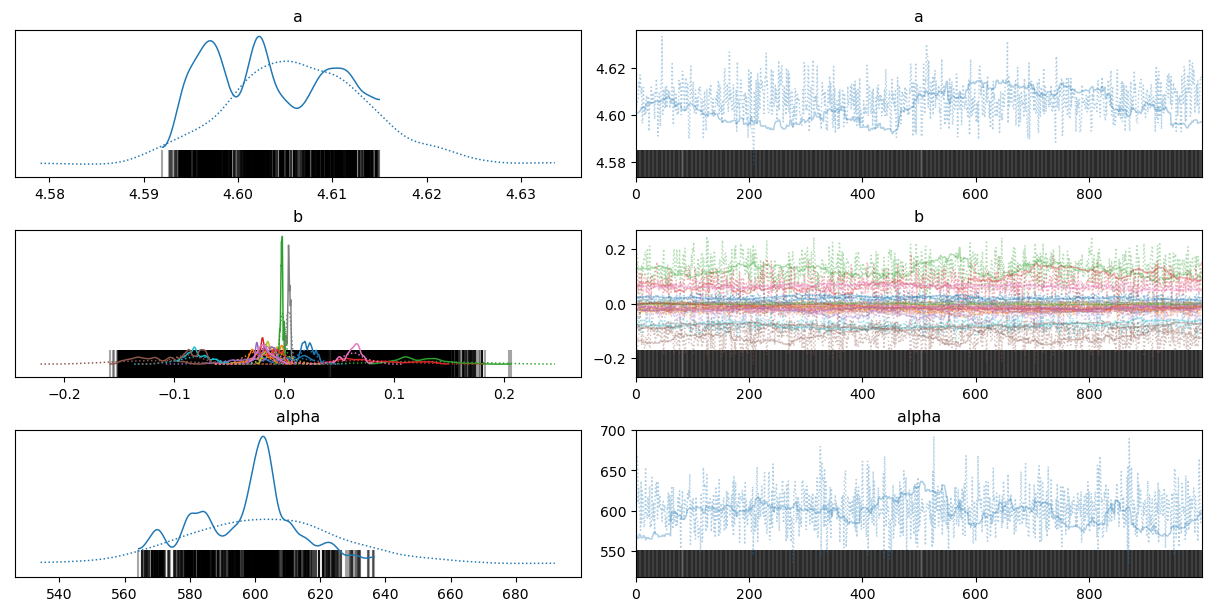

In [41]:
az.plot_trace(task_sac_empathy_trace);

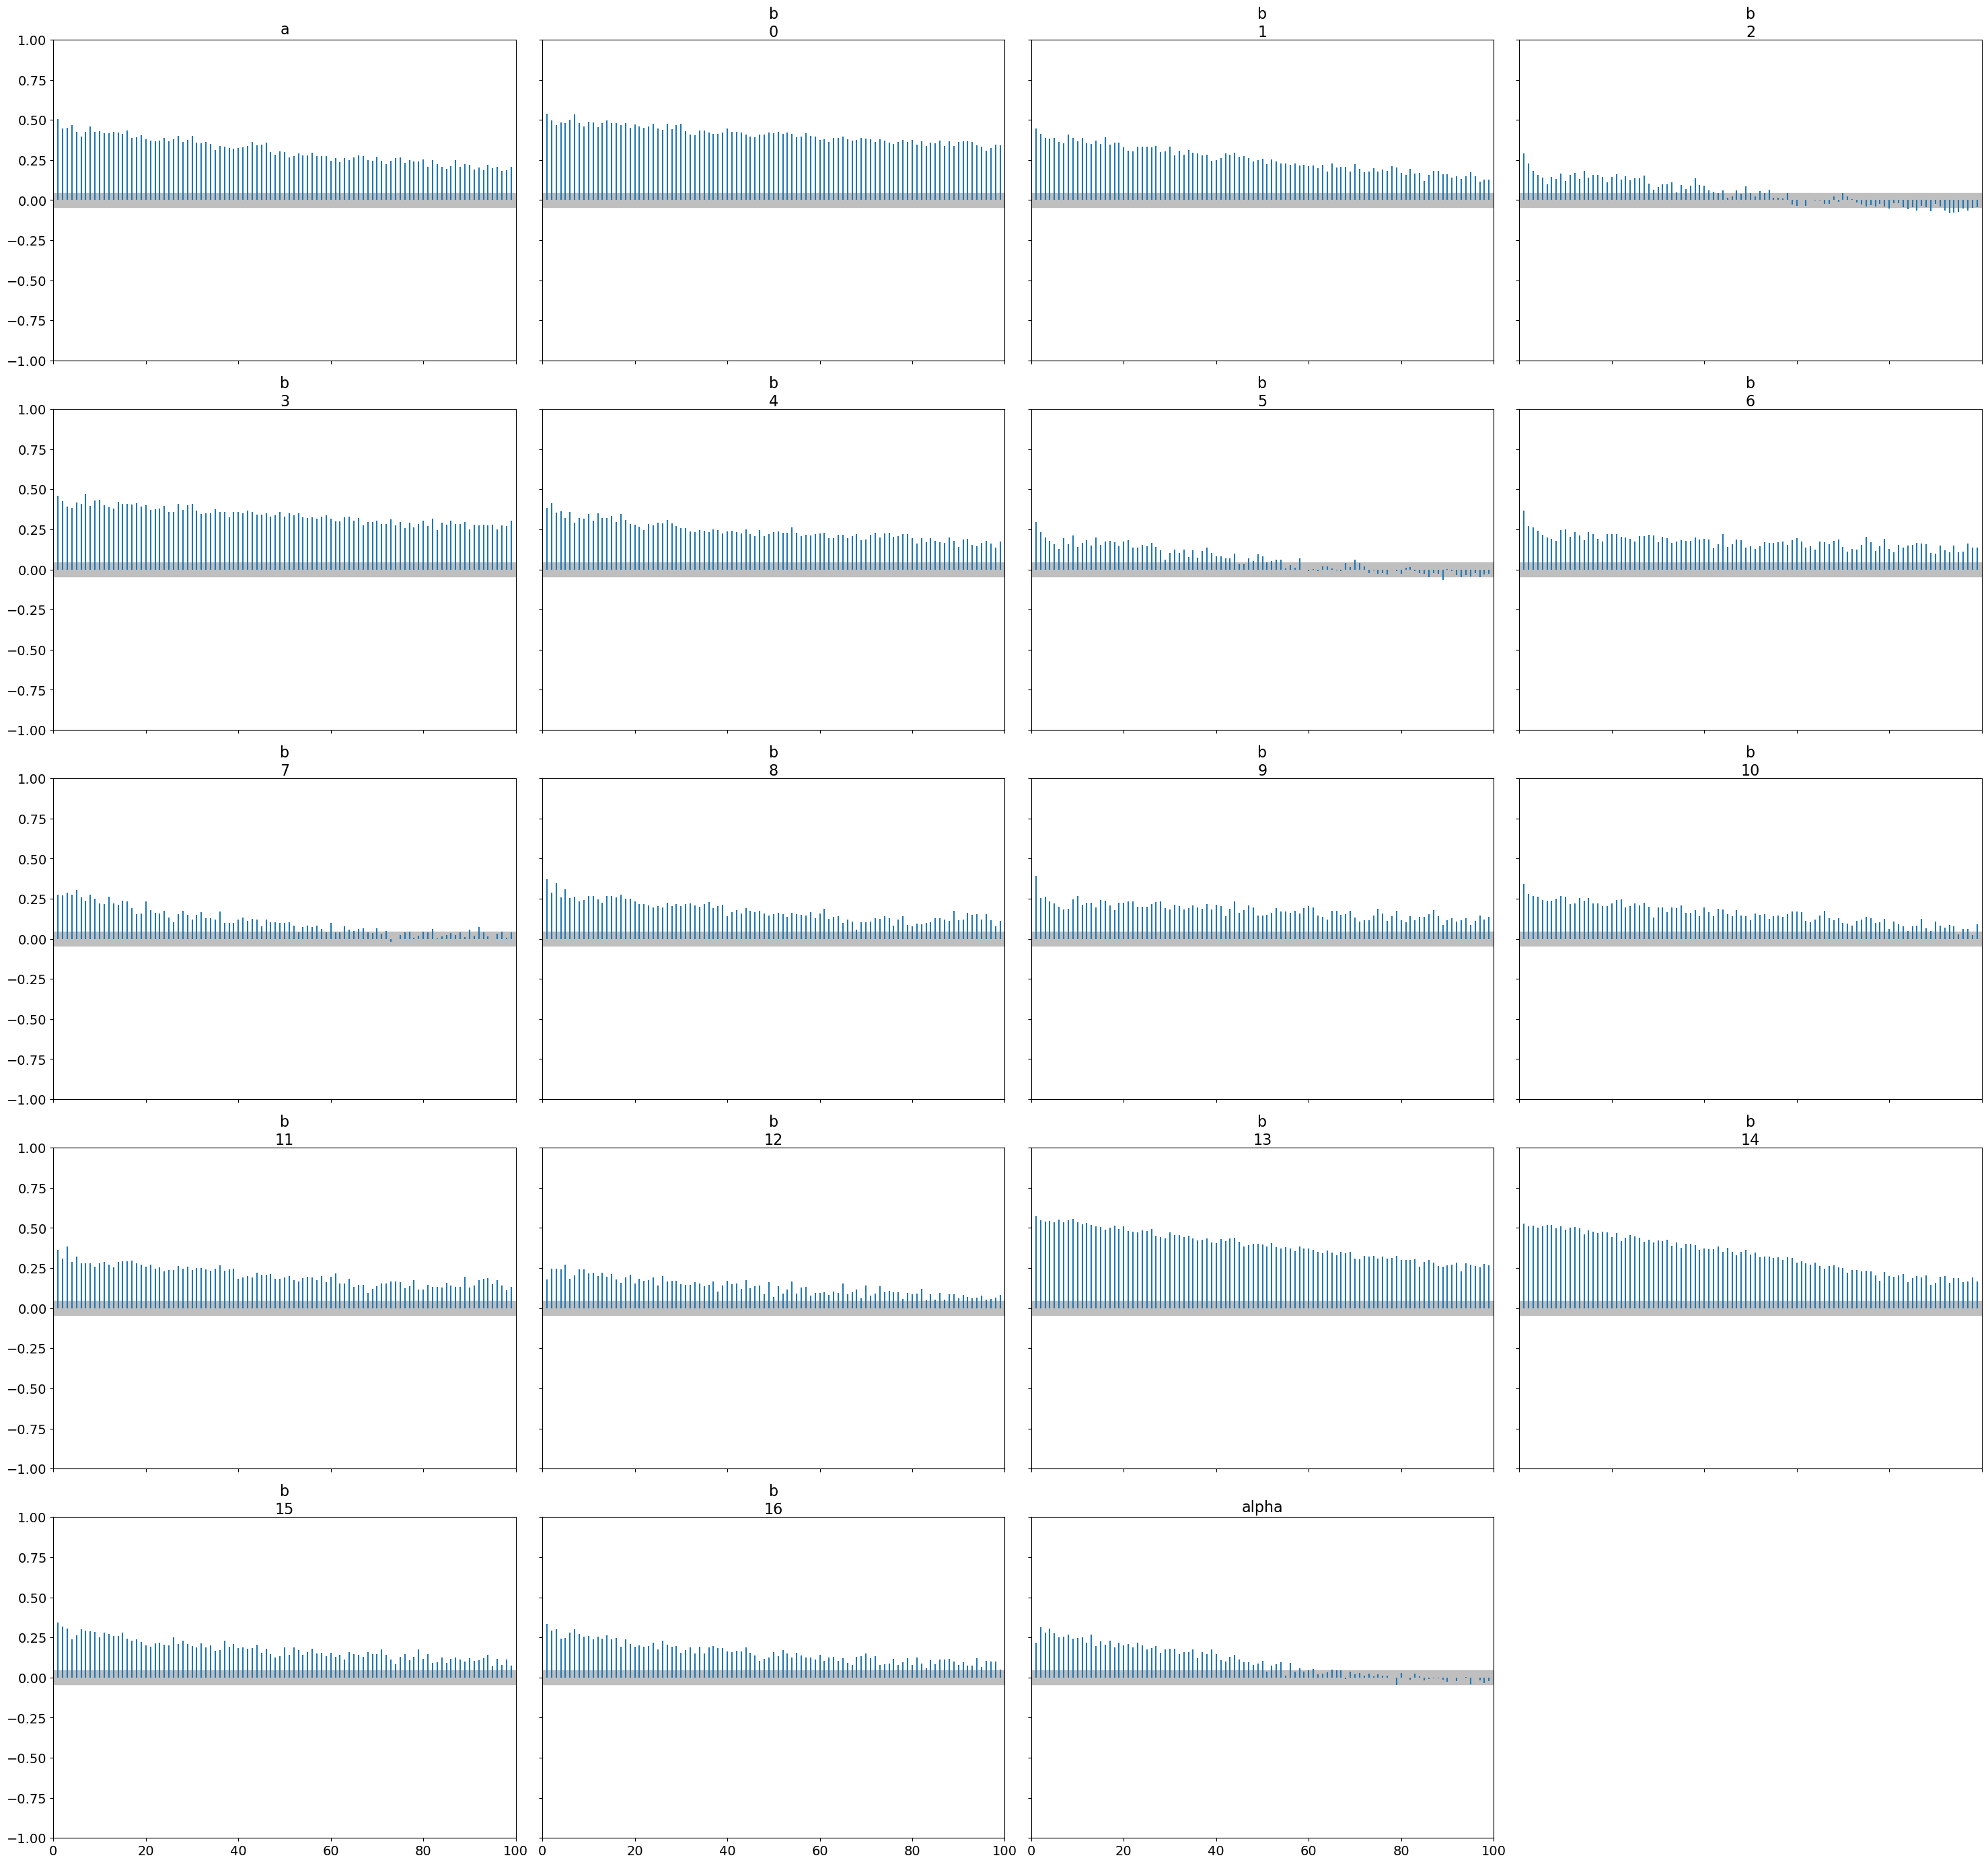

In [42]:
az.plot_autocorr(task_sac_empathy_trace, combined=True);

##### Posterior predictive check

In [34]:
task_sac_ppc = modeler.generate_model_ppc(task_sac_empathy, task_sac_empathy_trace)

In [44]:
sampled_labels = task_sac_ppc["posterior_predictive"]["empathy"][0].mean(axis=0)
rmse, mape = modeler.get_regression_evaluation(task_sac_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.25
MAPE:10.17%


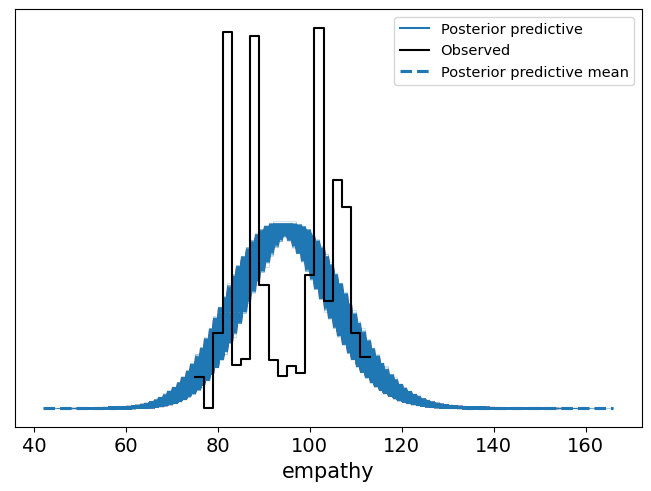

In [45]:
az.plot_ppc(task_sac_ppc);

##### Test predictions

In [35]:
task_sac_predictions = modeler.generate_model_predictions(task_sac_empathy, task_sac_features_test, task_sac_empathy_trace)
rmse, mape = modeler.get_regression_evaluation(task_sac_predictions, task_sac_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.27
MAPE:9.85%


#### __Combined predictions__

In [37]:
task_fix_stimuli, task_sac_stimuli = loader.get_stimuli("test", "task")
predicted_empathy = modeler.combine_predictions(task_fix_predictions, task_fix_stimuli, task_sac_predictions, task_sac_stimuli)
real_empathy_values = [task_oriented_empathy[k[1]] for k in predicted_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_values, [level for level in predicted_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:10.09
MAPE:9.96%


### __Cognitive empathy__

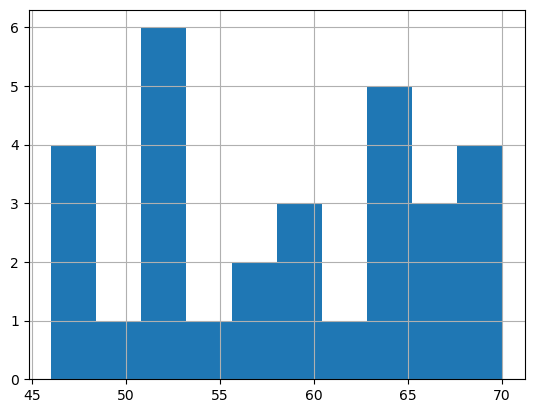

In [11]:
task_oriented_cognitive_empathy = loader.load_eyeT_empathy_levels(experiment= "task", type="cognitive")
task_oriented_cognitive_empathy.hist();

#### __Fixations__

In [5]:
task_fix_cog_features_train, task_fix_cog_labels_train, task_sac_cog_features_train, task_sac_cog_labels_train =  loader.get_eyeT_features_and_labels("train", "task", type ="cognitive")

In [6]:
task_fix_cog_empathy, task_fix_cog_trace = modeler.generate_neg_binomial_regression_model("task_fix_cognitive_neg_bin_regression", task_fix_cog_features_train, task_fix_cog_labels_train)

##### Sampling diagnostics

In [8]:
az.summary(task_fix_cog_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.164   0.023    4.121    4.208      0.001    0.001    1101.0   
b[0]    -0.021   0.150   -0.281    0.295      0.004    0.003    1466.0   
b[1]    -0.067   0.031   -0.123   -0.010      0.001    0.001    1080.0   
b[2]     0.289   0.066    0.159    0.404      0.002    0.001    1107.0   
b[3]     0.123   0.064    0.000    0.243      0.002    0.001    1306.0   
b[4]    -0.027   0.015   -0.054    0.000      0.000    0.000    1723.0   
b[5]    -0.308   0.051   -0.403   -0.210      0.002    0.001    1106.0   
b[6]    -0.089   0.028   -0.141   -0.040      0.001    0.001    1040.0   
b[7]     0.009   0.003    0.003    0.015      0.000    0.000    3674.0   
b[8]    -0.136   0.020   -0.177   -0.103      0.001    0.000    1057.0   
b[9]     0.116   0.031    0.058    0.173      0.001    0.001     942.0   
b[10]   -0.058   0.012   -0.080   -0.033      0.000    0.000    1895.0   
b[11]    0.078   0.019    0.042    0.114      0.001    0.000    1095.0   
b[12]   -0.036   0.013   -0.061   -0.011      0.000    0.000    1646.0   
b[13]    0.097   0.015    0.068    0.124      0.000    0.000    1408.0   
b[14]   -0.141   0.014   -0.166   -0.115      0.000    0.000    1397.0   
alpha  745.495  37.386  672.972  810.857      0.736    0.522    2606.0   

       ess_tail  r_hat  
a         861.0   1.00  
b[0]     1224.0   1.00  
b[1]     1000.0   1.00  
b[2]      892.0   1.00  
b[3]     1267.0   1.01  
b[4]     1480.0   1.00  
b[5]     1137.0   1.00  
b[6]     1450.0   1.00  
b[7]     1559.0   1.00  
b[8]     1142.0   1.00  
b[9]     1296.0   1.00  
b[10]    1571.0   1.00  
b[11]    1183.0   1.00  
b[12]    1433.0   1.00  
b[13]    1602.0   1.00  
b[14]    1481.0   1.00  
alpha    1331.0   1.00

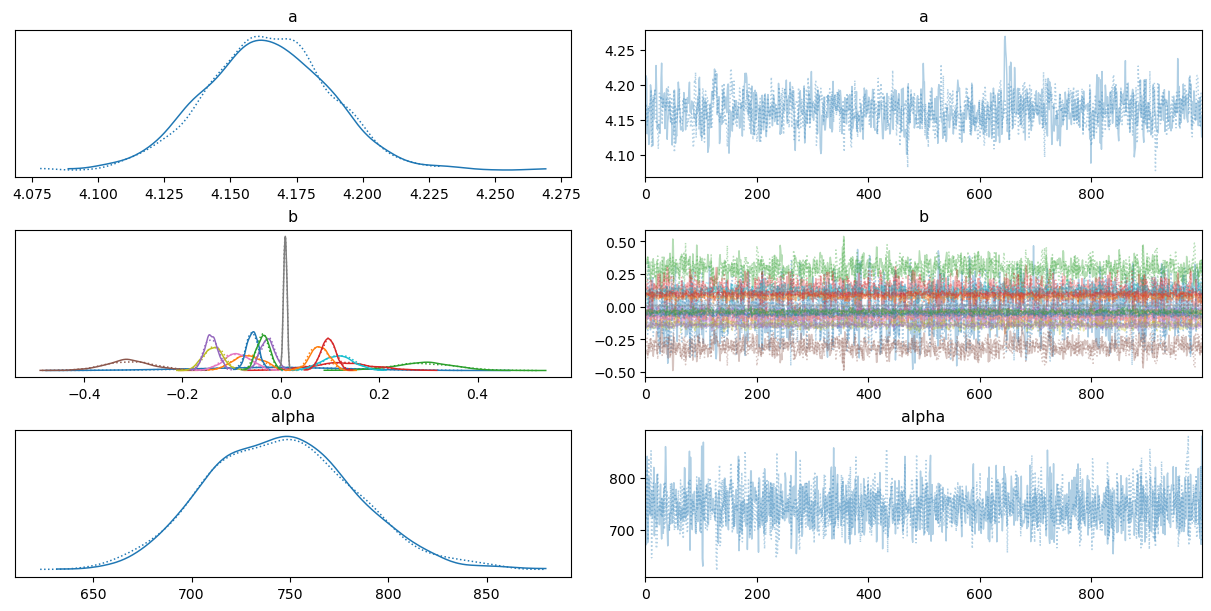

In [9]:
az.plot_trace(task_fix_cog_trace);

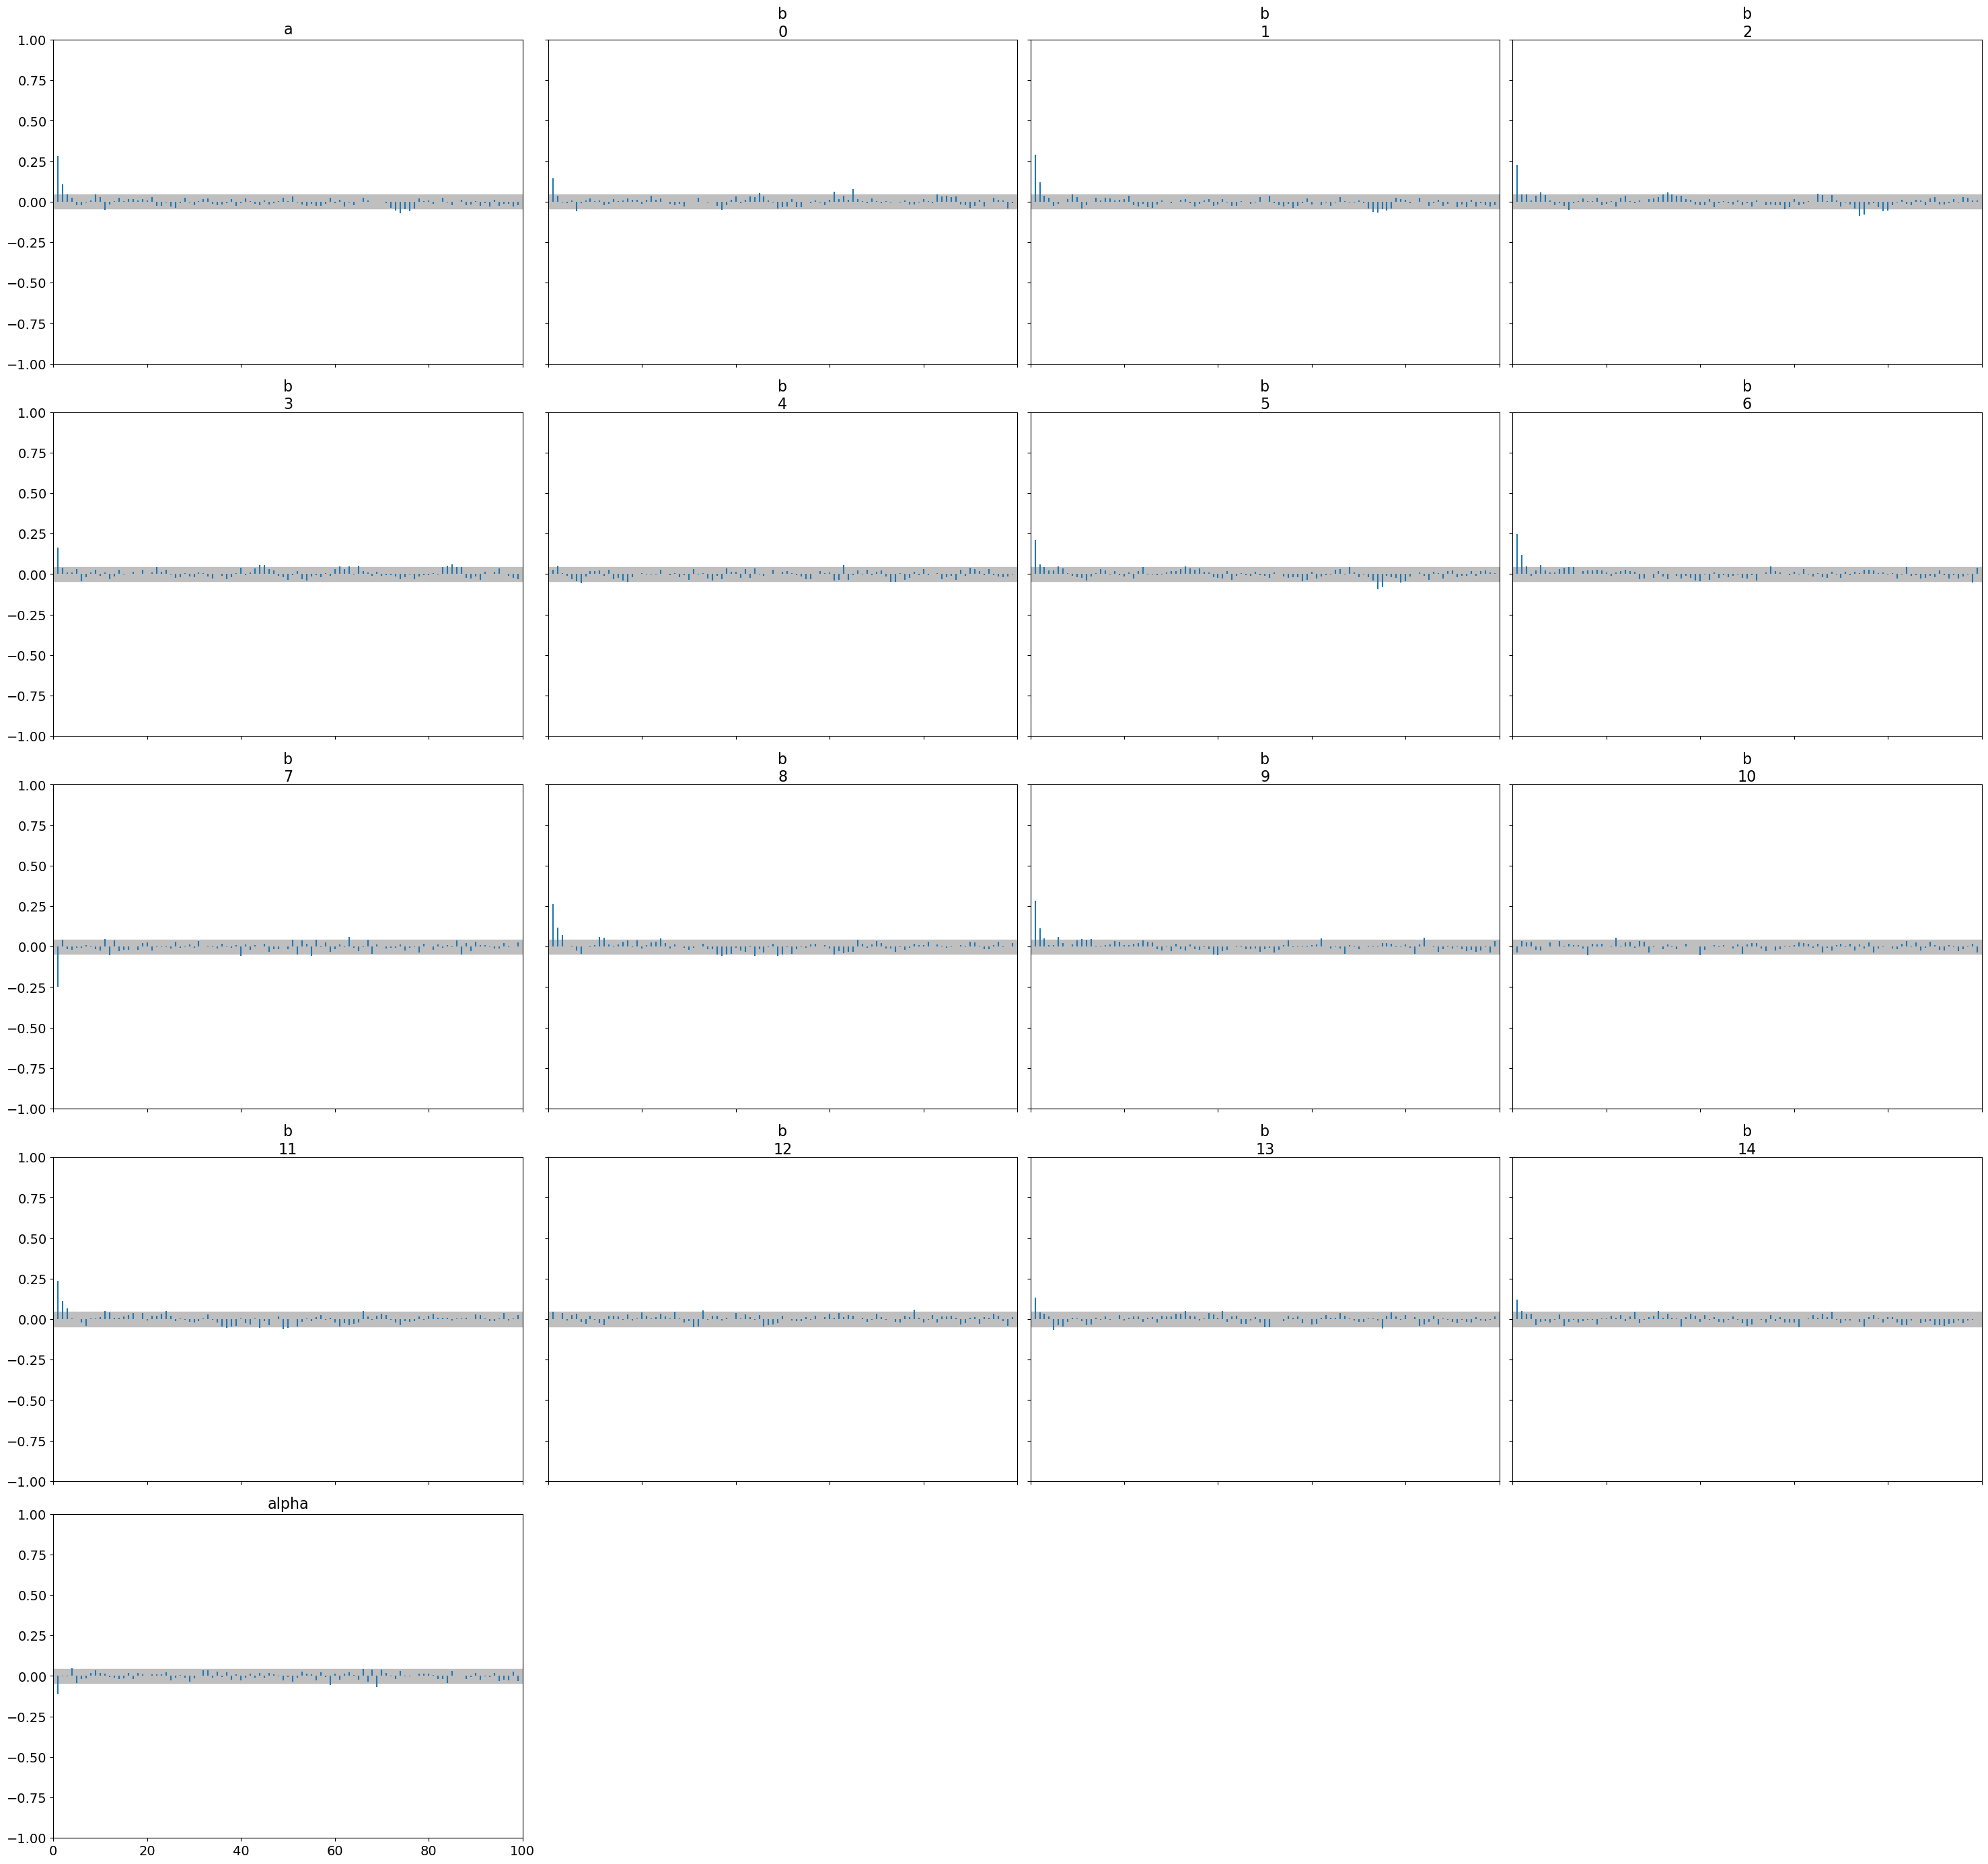

In [10]:
az.plot_autocorr(task_fix_cog_trace, combined = True);

##### Posterior predictive

In [11]:
task_fix_cog_ppc = modeler.generate_model_ppc(task_fix_cog_empathy, task_fix_cog_trace)
sampled_labels = task_fix_cog_ppc["posterior_predictive"]["empathy"].mean(axis=(0,1))
rmse, mape = modeler.get_regression_evaluation(task_fix_cog_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.63
MAPE:12.3%


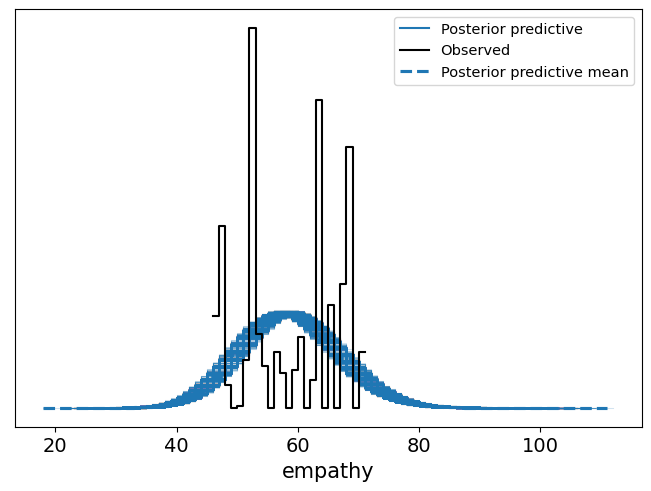

In [12]:
az.plot_ppc(task_fix_cog_ppc);

##### Predictions

In [7]:
task_fix_cog_features_test, task_fix_cog_labels_test, _, _ =  loader.get_eyeT_features_and_labels(dset="test", experiment="task", type="cognitive")
task_fix_cog_predictions = modeler.generate_model_predictions(task_fix_cog_empathy, task_fix_cog_features_test, task_fix_cog_trace)
rmse, mape = modeler.get_regression_evaluation(task_fix_cog_predictions, task_fix_cog_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.89
MAPE:12.23%


#### __Saccades__

In [8]:
task_sac_cog_empathy, task_sac_cog_trace = modeler.generate_neg_binomial_regression_model("task_sac_cognitive_neg_bin_regression", task_sac_cog_features_train, task_sac_cog_labels_train)

##### Sampling diagnostics

In [8]:
az.summary(task_sac_cog_trace)

mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a        4.103   0.010    4.085    4.121      0.000    0.000    1652.0   
b[0]     0.014   0.024   -0.031    0.059      0.001    0.001    1579.0   
b[1]    -0.014   0.013   -0.039    0.010      0.000    0.000    1618.0   
b[2]     0.143   0.060    0.028    0.250      0.002    0.001    1361.0   
b[3]     0.078   0.045   -0.009    0.156      0.001    0.001    1526.0   
b[4]    -0.009   0.031   -0.064    0.051      0.001    0.001    1439.0   
b[5]    -0.155   0.044   -0.241   -0.078      0.001    0.001    1405.0   
b[6]     0.082   0.016    0.050    0.111      0.000    0.000    1390.0   
b[7]     0.002   0.003   -0.003    0.007      0.000    0.000    2296.0   
b[8]     0.007   0.015   -0.020    0.036      0.000    0.000    1563.0   
b[9]    -0.089   0.022   -0.126   -0.043      0.001    0.000    1287.0   
b[10]    0.014   0.011   -0.007    0.035      0.000    0.000    1285.0   
b[11]   -0.025   0.016   -0.056    0.003      0.000    0.000    1653.0   
b[12]   -0.002   0.003   -0.007    0.004      0.000    0.000    1695.0   
b[13]   -0.036   0.009   -0.053   -0.020      0.000    0.000    1671.0   
b[14]   -0.011   0.008   -0.026    0.004      0.000    0.000    1686.0   
b[15]    0.078   0.017    0.043    0.108      0.000    0.000    1682.0   
b[16]   -0.117   0.015   -0.146   -0.089      0.000    0.000    1600.0   
alpha  557.490  28.459  508.071  612.590      0.571    0.407    2518.0   

       ess_tail  r_hat  
a        1370.0   1.00  
b[0]     1111.0   1.00  
b[1]     1393.0   1.00  
b[2]     1118.0   1.00  
b[3]     1266.0   1.00  
b[4]     1318.0   1.00  
b[5]     1057.0   1.00  
b[6]     1230.0   1.00  
b[7]     1439.0   1.00  
b[8]     1355.0   1.00  
b[9]     1139.0   1.00  
b[10]    1214.0   1.00  
b[11]    1312.0   1.00  
b[12]    1657.0   1.00  
b[13]    1333.0   1.00  
b[14]    1231.0   1.00  
b[15]    1344.0   1.00  
b[16]    1387.0   1.00  
alpha    1212.0   1.01

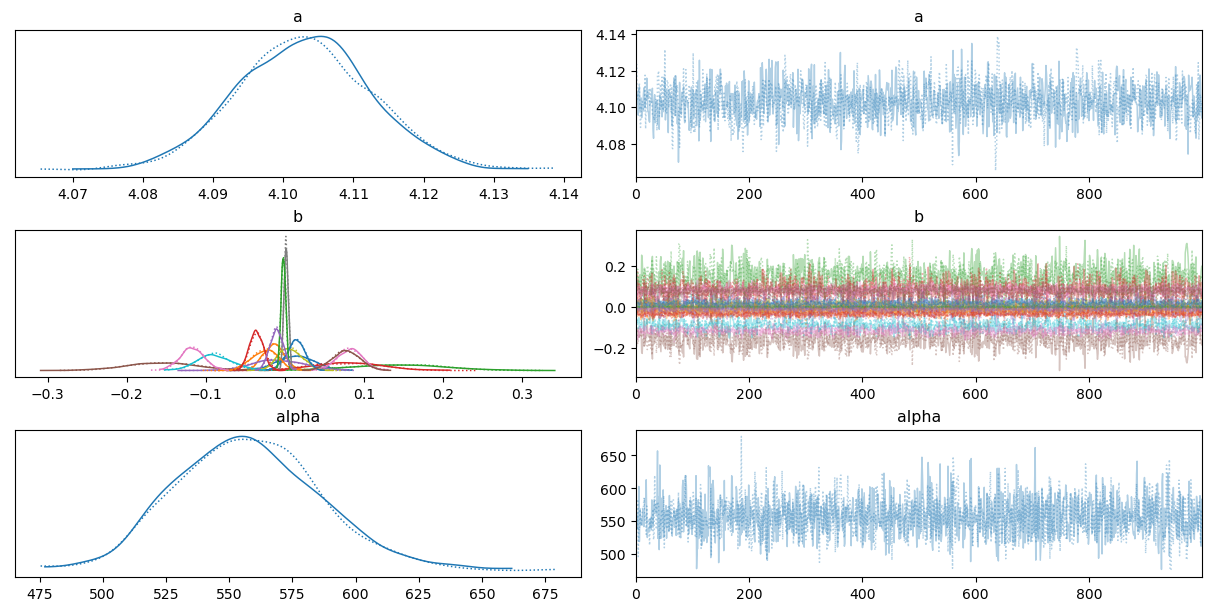

In [9]:
az.plot_trace(task_sac_cog_trace);

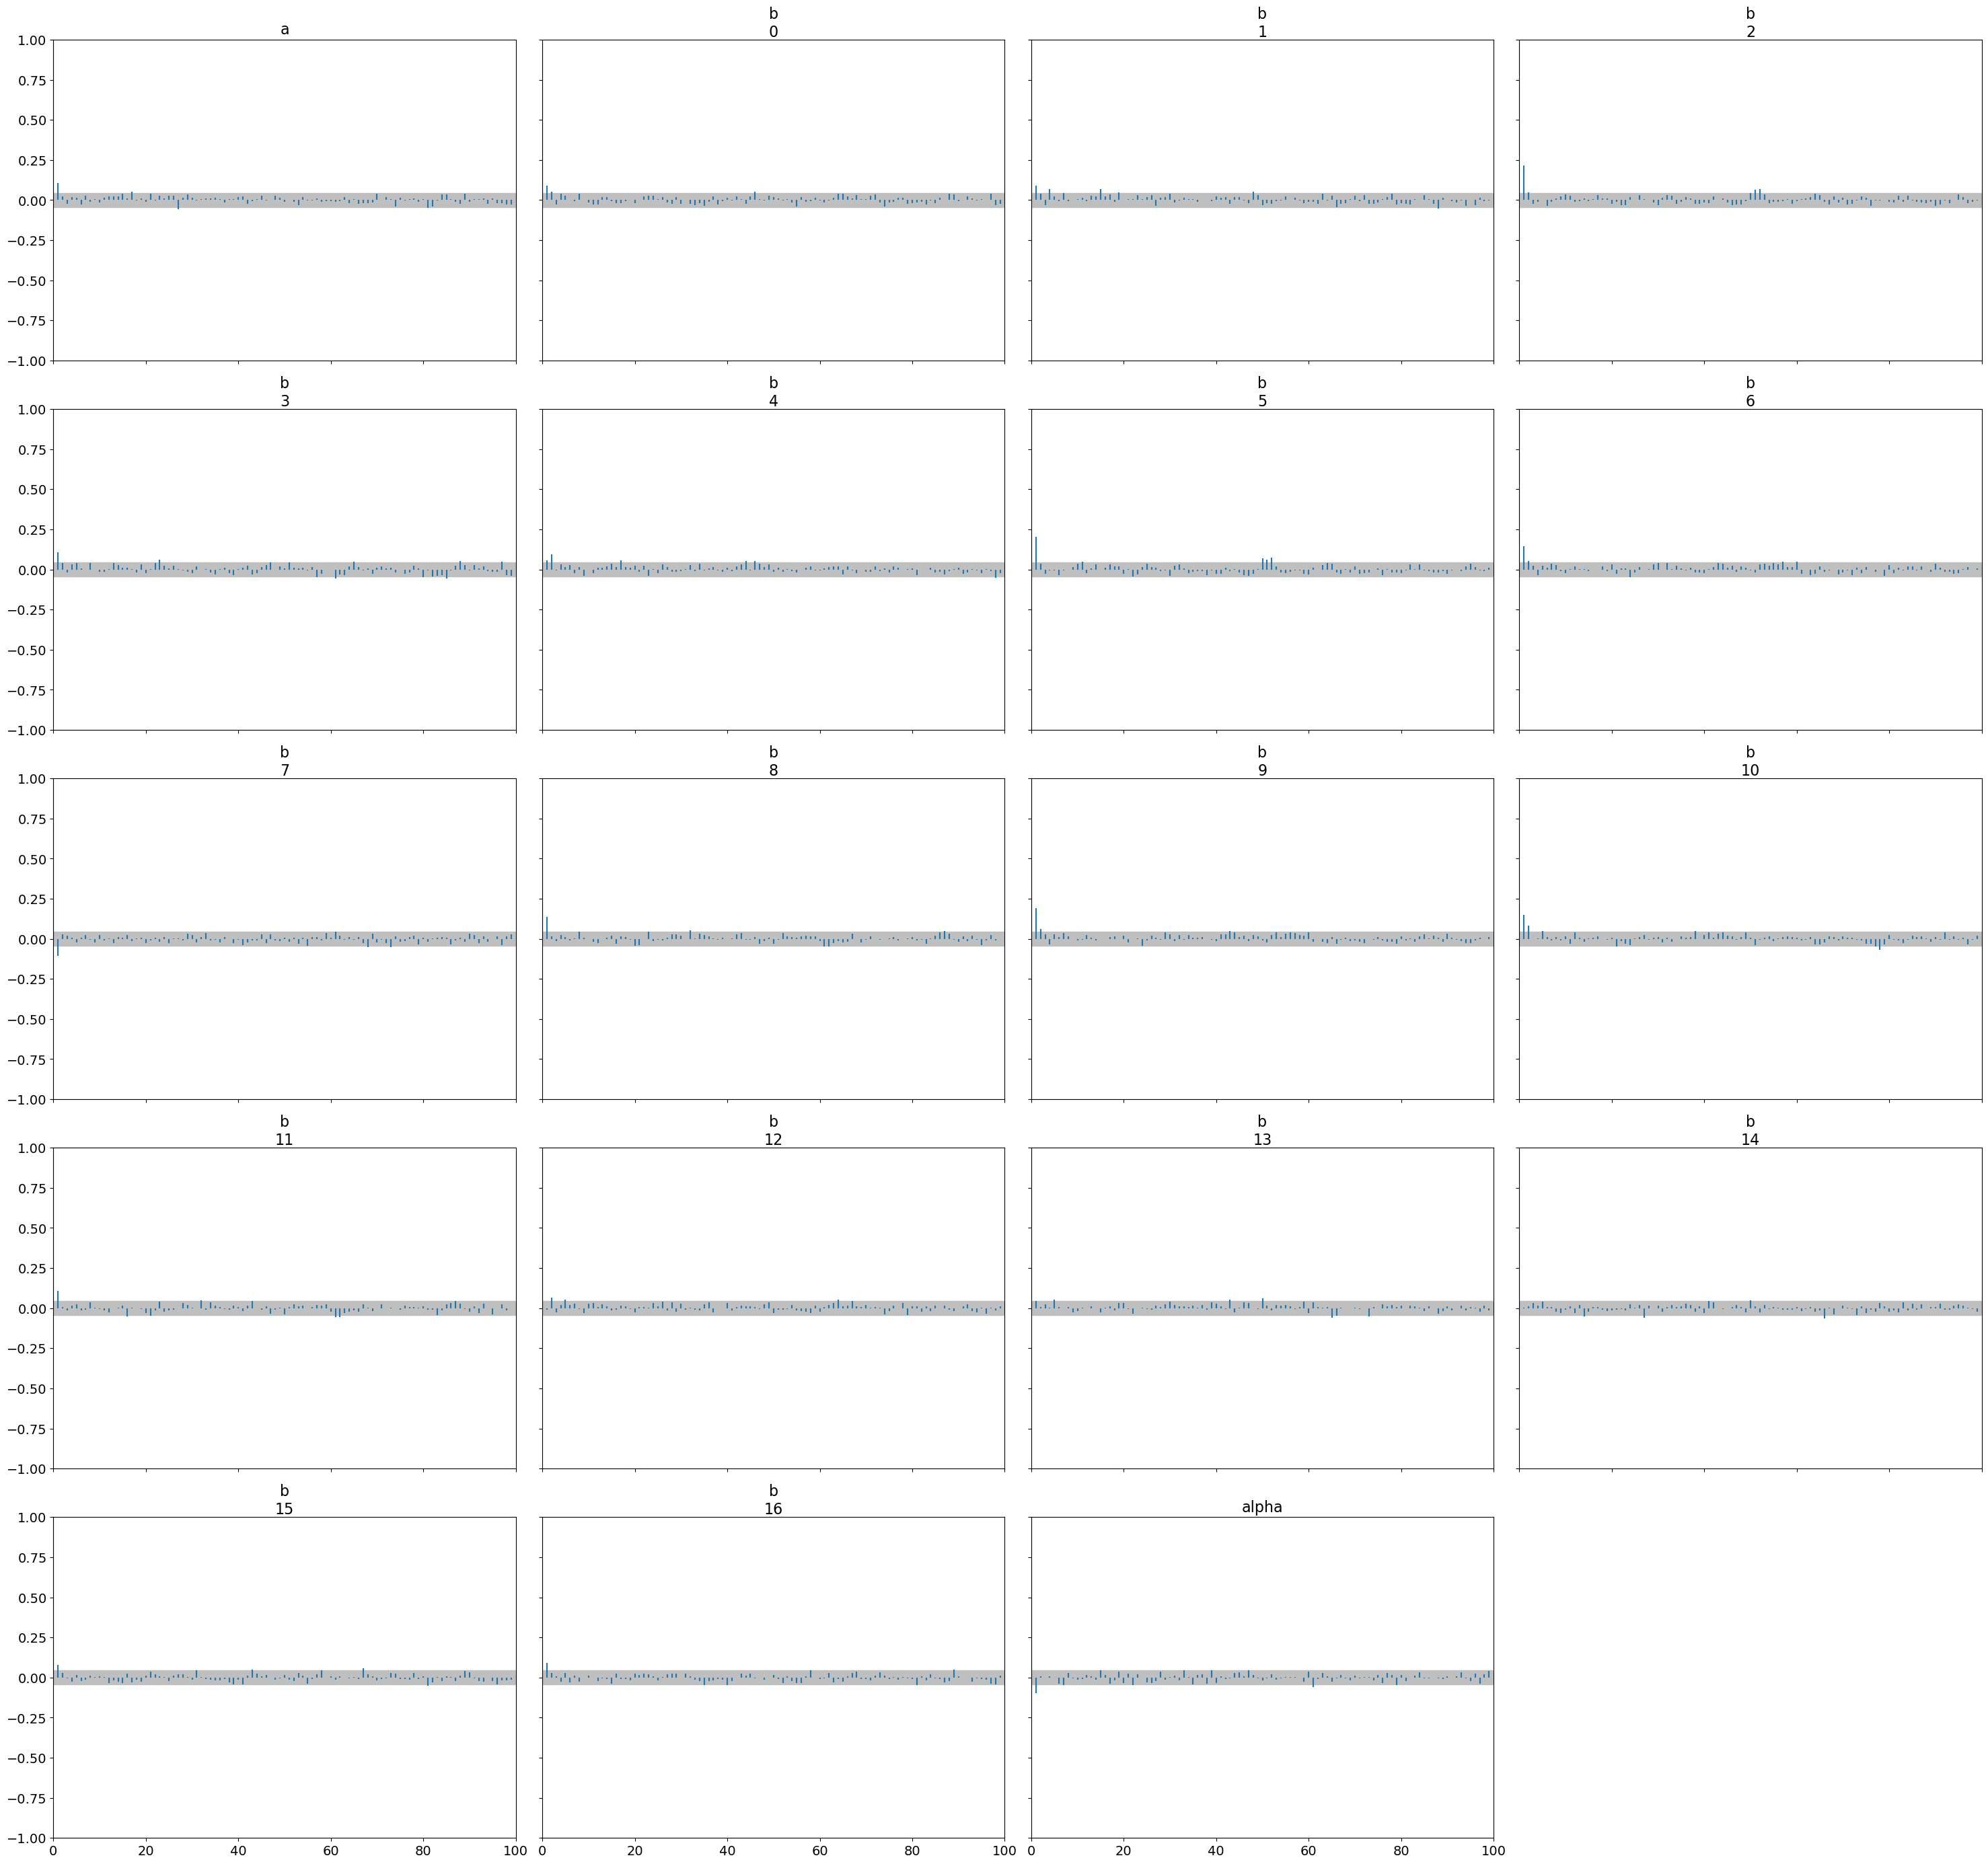

In [10]:
az.plot_autocorr(task_sac_cog_trace, combined=True);

##### Posterior predictive

In [11]:
task_sac_cog_ppc = modeler.generate_model_ppc(task_sac_cog_empathy, task_sac_cog_trace)
sampled_labels = task_sac_cog_ppc["posterior_predictive"]["empathy"].mean(axis=(0,1))
rmse, mape = modeler.get_regression_evaluation(task_sac_cog_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.79
MAPE:12.69%


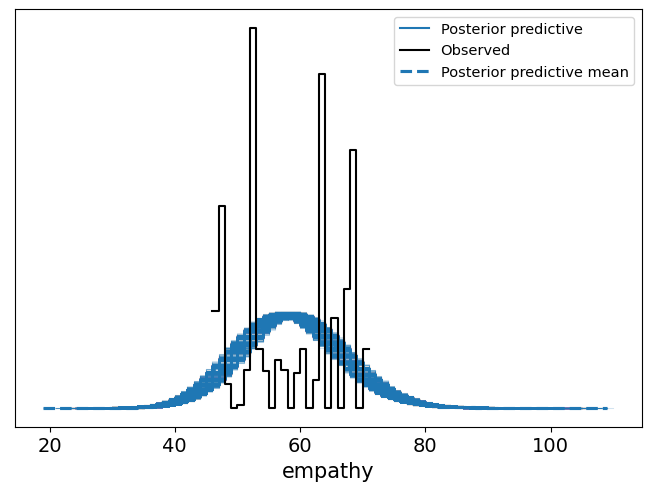

In [12]:
az.plot_ppc(task_sac_cog_ppc);

##### Predictions

In [9]:
_, _, task_sac_cog_features_test, task_sac_cog_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="task", type="cognitive")
task_sac_cog_predictions = modeler.generate_model_predictions(task_sac_cog_empathy, task_sac_cog_features_test, task_sac_cog_trace)
rmse, mape = modeler.get_regression_evaluation(task_sac_cog_predictions, task_sac_cog_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.96
MAPE:12.56%


#### __Combined predictions__

In [12]:
task_fix_cog_stimuli, task_sac_cog_stimuli = loader.get_stimuli("test", "task")
predicted_cog_empathy = modeler.combine_predictions(task_fix_cog_predictions, task_fix_cog_stimuli, task_sac_cog_predictions, task_sac_cog_stimuli)
real_empathy_values = [task_oriented_cognitive_empathy[k[1]] for k in predicted_cog_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_values, [level for level in predicted_cog_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:7.72
MAPE:12.68%


### __Affective empathy__

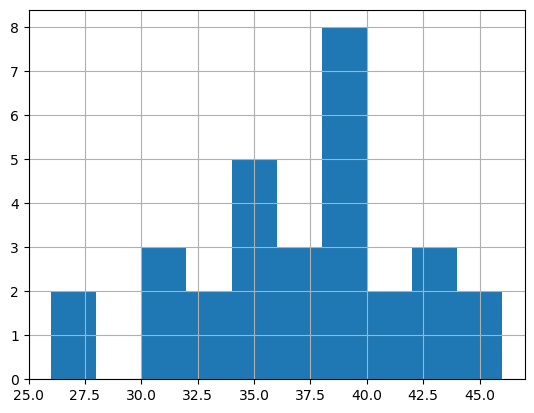

In [15]:
task_oriented_affective_empathy = loader.load_eyeT_empathy_levels(experiment= "task", type="affective")
task_oriented_affective_empathy.hist();

In [4]:
task_fix_aff_features_train, task_fix_aff_labels_train, task_sac_aff_features_train, task_sac_aff_labels_train =  loader.get_eyeT_features_and_labels("train", "task", type ="affective")

#### __Fixations__

In [13]:
task_fix_aff_empathy, task_fix_aff_trace = modeler.generate_neg_binomial_regression_model("task_fix_affective_neg_bin_regression", task_fix_aff_features_train, task_fix_aff_labels_train)

##### Sampling diagnostics

In [18]:
az.summary(task_fix_aff_trace)

mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a         3.720   0.028     3.669     3.774      0.001    0.001    1081.0   
b[0]     -0.115   0.183    -0.461     0.221      0.004    0.003    1822.0   
b[1]     -0.080   0.037    -0.147    -0.009      0.001    0.001    1073.0   
b[2]      0.068   0.082    -0.086     0.219      0.003    0.002    1033.0   
b[3]      0.146   0.078     0.008     0.299      0.002    0.001    1734.0   
b[4]     -0.057   0.018    -0.089    -0.023      0.000    0.000    2117.0   
b[5]     -0.014   0.064    -0.131     0.107      0.002    0.001    1047.0   
b[6]     -0.122   0.035    -0.188    -0.059      0.001    0.001     995.0   
b[7]     -0.000   0.004    -0.008     0.007      0.000    0.000    3968.0   
b[8]     -0.012   0.026    -0.062     0.033      0.001    0.001     987.0   
b[9]      0.121   0.040     0.050     0.194      0.001    0.001     856.0   
b[10]    -0.008   0.015    -0.033     0.021      0.000    0.000    1368.0   
b[11]    -0.023   0.025    -0.070     0.020      0.001    0.001    1031.0   
b[12]     0.044   0.017     0.013     0.074      0.000    0.000    2514.0   
b[13]    -0.319   0.019    -0.355    -0.286      0.001    0.000    1307.0   
b[14]     0.140   0.017     0.109     0.173      0.000    0.000    1327.0   
alpha  1720.166  68.529  1594.956  1852.617      1.220    0.864    3171.0   

       ess_tail  r_hat  
a        1337.0    1.0  
b[0]     1653.0    1.0  
b[1]     1251.0    1.0  
b[2]     1380.0    1.0  
b[3]     1631.0    1.0  
b[4]     1557.0    1.0  
b[5]     1177.0    1.0  
b[6]      990.0    1.0  
b[7]     1553.0    1.0  
b[8]     1050.0    1.0  
b[9]      940.0    1.0  
b[10]    1533.0    1.0  
b[11]    1040.0    1.0  
b[12]    1508.0    1.0  
b[13]    1288.0    1.0  
b[14]    1414.0    1.0  
alpha    1577.0    1.0

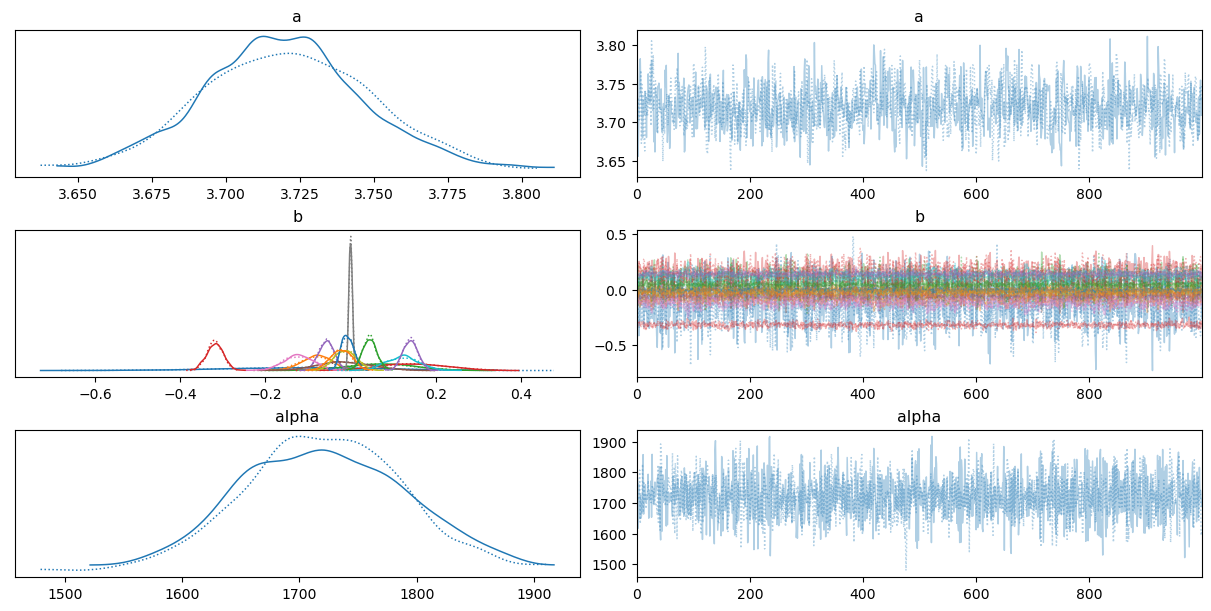

In [19]:
az.plot_trace(task_fix_aff_trace);

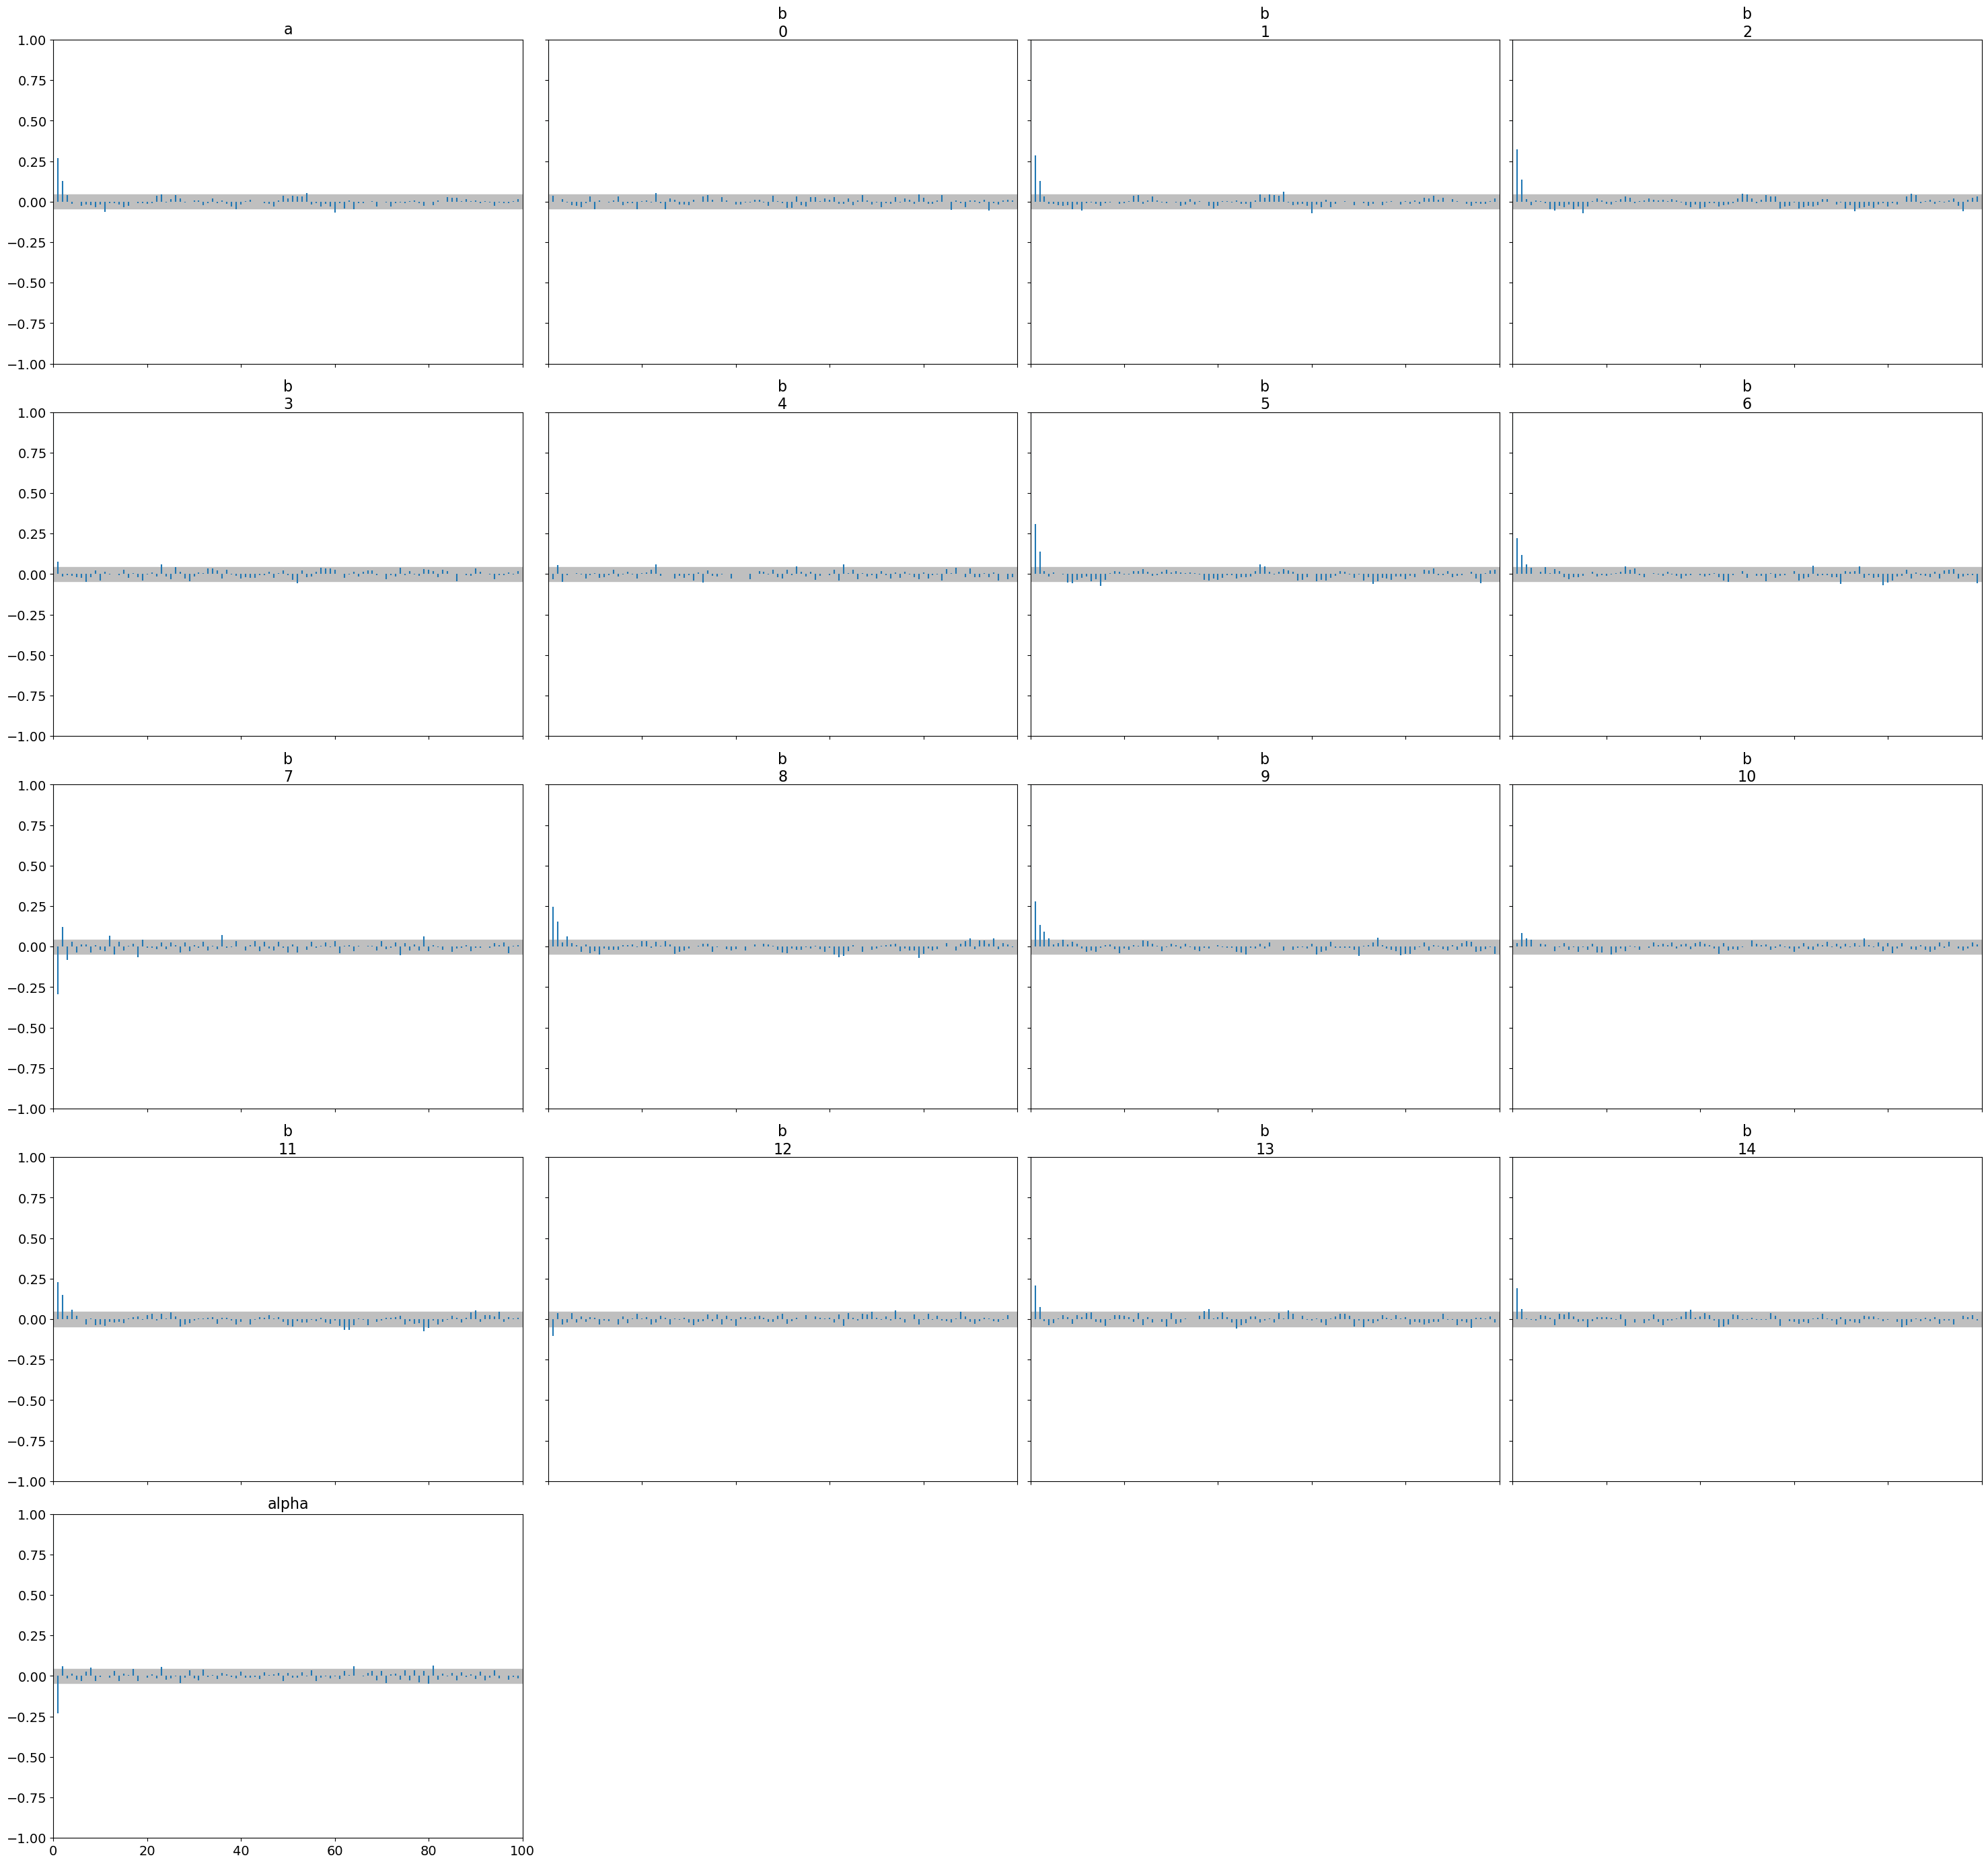

In [20]:
az.plot_autocorr(task_fix_aff_trace, combined=True);

##### Posterior predictive

In [21]:
task_fix_aff_ppc = modeler.generate_model_ppc(task_fix_aff_empathy, task_fix_aff_trace)
sampled_labels = task_fix_aff_ppc["posterior_predictive"]["empathy"].mean(axis=(0,1))
rmse, mape = modeler.get_regression_evaluation(task_fix_aff_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.97
MAPE:8.68%


<AxesSubplot: xlabel='empathy'>

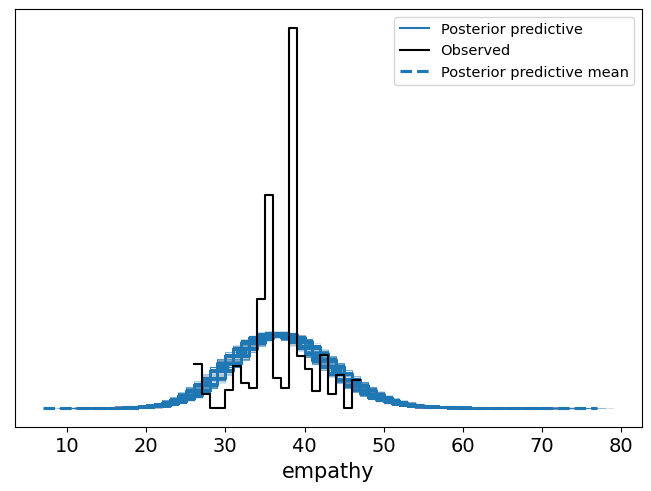

In [22]:
az.plot_ppc(task_fix_aff_ppc)

##### Predictions

In [14]:
task_fix_aff_features_test, task_fix_aff_labels_test, _, _ =  loader.get_eyeT_features_and_labels(dset="test", experiment="task", type="affective")
task_fix_aff_predictions = modeler.generate_model_predictions(task_fix_aff_empathy, task_fix_aff_features_test, task_fix_aff_trace)
rmse, mape = modeler.get_regression_evaluation(task_fix_aff_predictions, task_fix_aff_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:4.16
MAPE:8.4%


#### __Saccades__

In [6]:
task_sac_aff_empathy, task_sac_aff_trace = modeler.generate_mix_gauss_regression_model("task_sac_affective_neg_binomial_regression", task_sac_aff_features_train, task_sac_aff_labels_train)

Sampling 2 chains for 3_000 tune and 1_000 draw iterations (6_000 + 2_000 draws total) took 5506 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Saving model...


##### Sampling diagnostics

In [7]:
az.summary(task_sac_aff_trace)

mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
α1      32.155   7.489  24.511   39.989      5.273    4.460       3.0   
β1[0]   -0.612   0.524  -1.534    0.571      0.080    0.057      70.0   
β1[1]   -1.034   0.857  -2.303    0.025      0.579    0.481       3.0   
β1[2]    1.661   1.941  -1.032    5.267      1.118    0.883       3.0   
β1[3]    2.063   0.977   0.324    4.077      0.272    0.229      16.0   
β1[4]   -1.520   0.932  -3.344   -0.263      0.522    0.410       3.0   
β1[5]   -1.421   1.120  -3.738    0.253      0.502    0.378       6.0   
β1[6]    0.773   0.526   0.120    1.794      0.297    0.233       3.0   
β1[7]    0.165   0.142  -0.013    0.388      0.094    0.077       3.0   
β1[8]   -0.325   0.533  -1.278    0.353      0.322    0.257       3.0   
β1[9]   -1.425   0.934  -3.020   -0.256      0.587    0.475       3.0   
β1[10]   0.708   0.500   0.075    1.530      0.317    0.258       3.0   
β1[11]  -0.256   0.336  -0.778    0.548      0.085    0.061      22.0   
β1[12]  -0.038   0.062  -0.168    0.085      0.002    0.012    1005.0   
β1[13]   0.428   0.231   0.095    0.901      0.107    0.081       5.0   
β1[14]  -0.620   0.533  -1.425    0.005      0.360    0.299       3.0   
β1[15]  -4.221   8.511 -13.323    4.661      5.990    5.066       3.0   
β1[16]   3.351   2.263   0.826    6.142      1.582    1.334       3.0   
α2      72.656  32.601  39.671  111.149     22.848   19.286       3.0   
β2[0]   -0.513   7.271 -15.678   15.705      0.202    1.677    1560.0   
β2[1]   -0.980   7.359 -17.507   14.722      0.157    1.577    2132.0   
β2[2]    3.101   7.950 -16.312   16.958      1.898    1.365      29.0   
β2[3]    1.899   7.154 -14.596   15.426      1.190    1.465      81.0   
β2[4]   -0.565   7.329 -14.714   16.442      0.161    1.543    2196.0   
β2[5]   -2.409   7.608 -16.275   14.252      1.864    1.342      36.0   
β2[6]    0.582   6.984 -16.109   13.810      0.149    1.568    2366.0   
β2[7]    0.027   7.321 -15.786   15.699      0.157    1.702    2208.0   
β2[8]   -0.853   7.428 -15.185   17.509      0.161    1.747    2260.0   
β2[9]   -1.281   7.026 -15.309   14.629      0.203    1.687    1465.0   
β2[10]   0.678   6.996 -15.122   15.481      0.188    1.607    1517.0   
β2[11]   0.530   7.044 -13.691   16.178      0.150    1.563    2318.0   
β2[12]  -0.118   6.817 -14.907   14.533      0.168    1.696    1678.0   
β2[13]   0.074   7.120 -16.422   14.279      0.148    1.617    2312.0   
β2[14]  -0.162   7.388 -15.569   15.633      0.151    1.611    2164.0   
β2[15]  -4.155   8.510 -14.573   16.103      3.593    2.686       8.0   
β2[16]   1.155   7.526 -16.667   15.490      0.187    1.588    2167.0   
π[0]     0.521   0.480   0.040    1.000      0.338    0.286       3.0   
π[1]     0.479   0.480   0.000    0.960      0.338    0.286       3.0   
σ1       2.004   1.796   0.200    3.817      1.265    1.070       3.0   
σ2       5.752   5.052   0.119   16.395      1.886    1.392      15.0   

        ess_tail  r_hat  
α1          72.0   1.83  
β1[0]       92.0   1.16  
β1[1]      148.0   1.83  
β1[2]      251.0   1.62  
β1[3]       67.0   1.14  
β1[4]       67.0   1.57  
β1[5]      171.0   1.28  
β1[6]       88.0   1.61  
β1[7]       77.0   1.82  
β1[8]      112.0   1.68  
β1[9]      100.0   1.81  
β1[10]      75.0   1.80  
β1[11]      93.0   1.26  
β1[12]      65.0   1.26  
β1[13]     154.0   1.29  
β1[14]      67.0   1.83  
β1[15]      59.0   1.83  
β1[16]      67.0   1.83  
α2          61.0   1.83  
β2[0]       70.0   1.66  
β2[1]       93.0   1.69  
β2[2]       78.0   1.44  
β2[3]       67.0   1.50  
β2[4]       64.0   1.64  
β2[5]       85.0   1.52  
β2[6]       54.0   1.71  
β2[7]       72.0   1.81  
β2[8]       82.0   1.69  
β2[9]       67.0   1.64  
β2[10]      69.0   1.71  
β2[11]      81.0   1.69  
β2[12]      90.0   1.79  
β2[13]      92.0   1.73  
β2[14]      70.0   1.74  
β2[15]      54.0   1.67  
β2[16]      60.0   1.71  
π[0]        56.0   1.83  
π[1]        56.0   1.83  
σ1

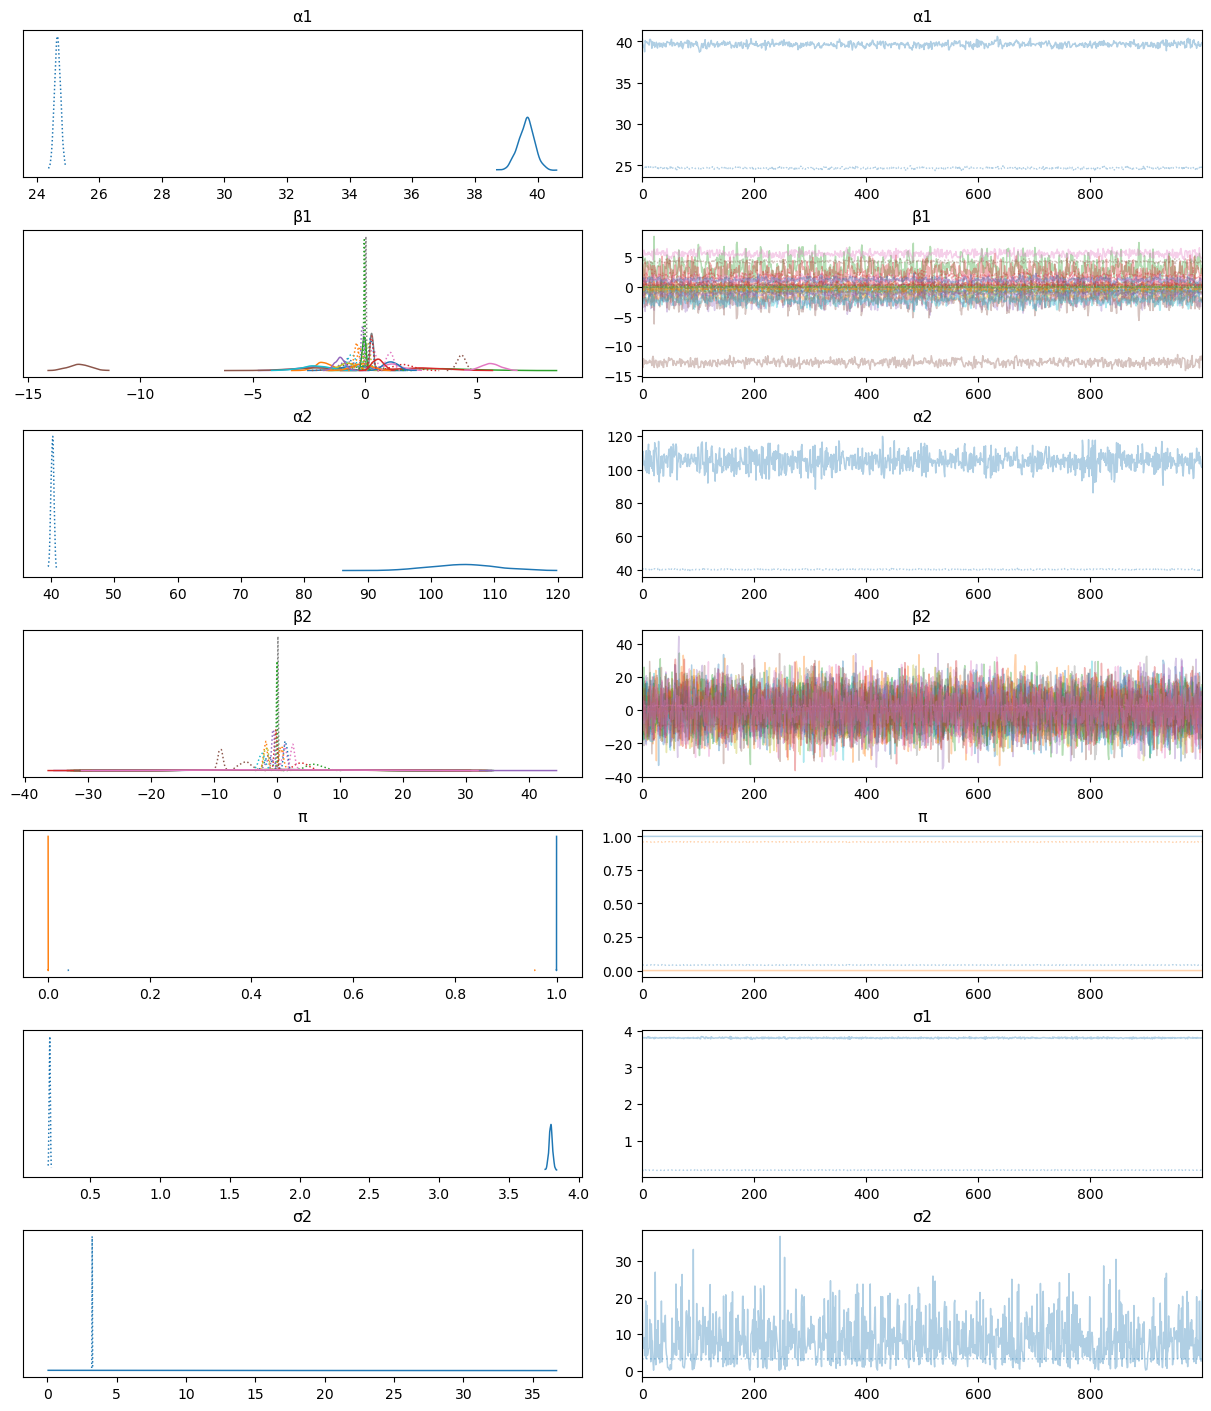

In [8]:
az.plot_trace(task_sac_aff_trace);

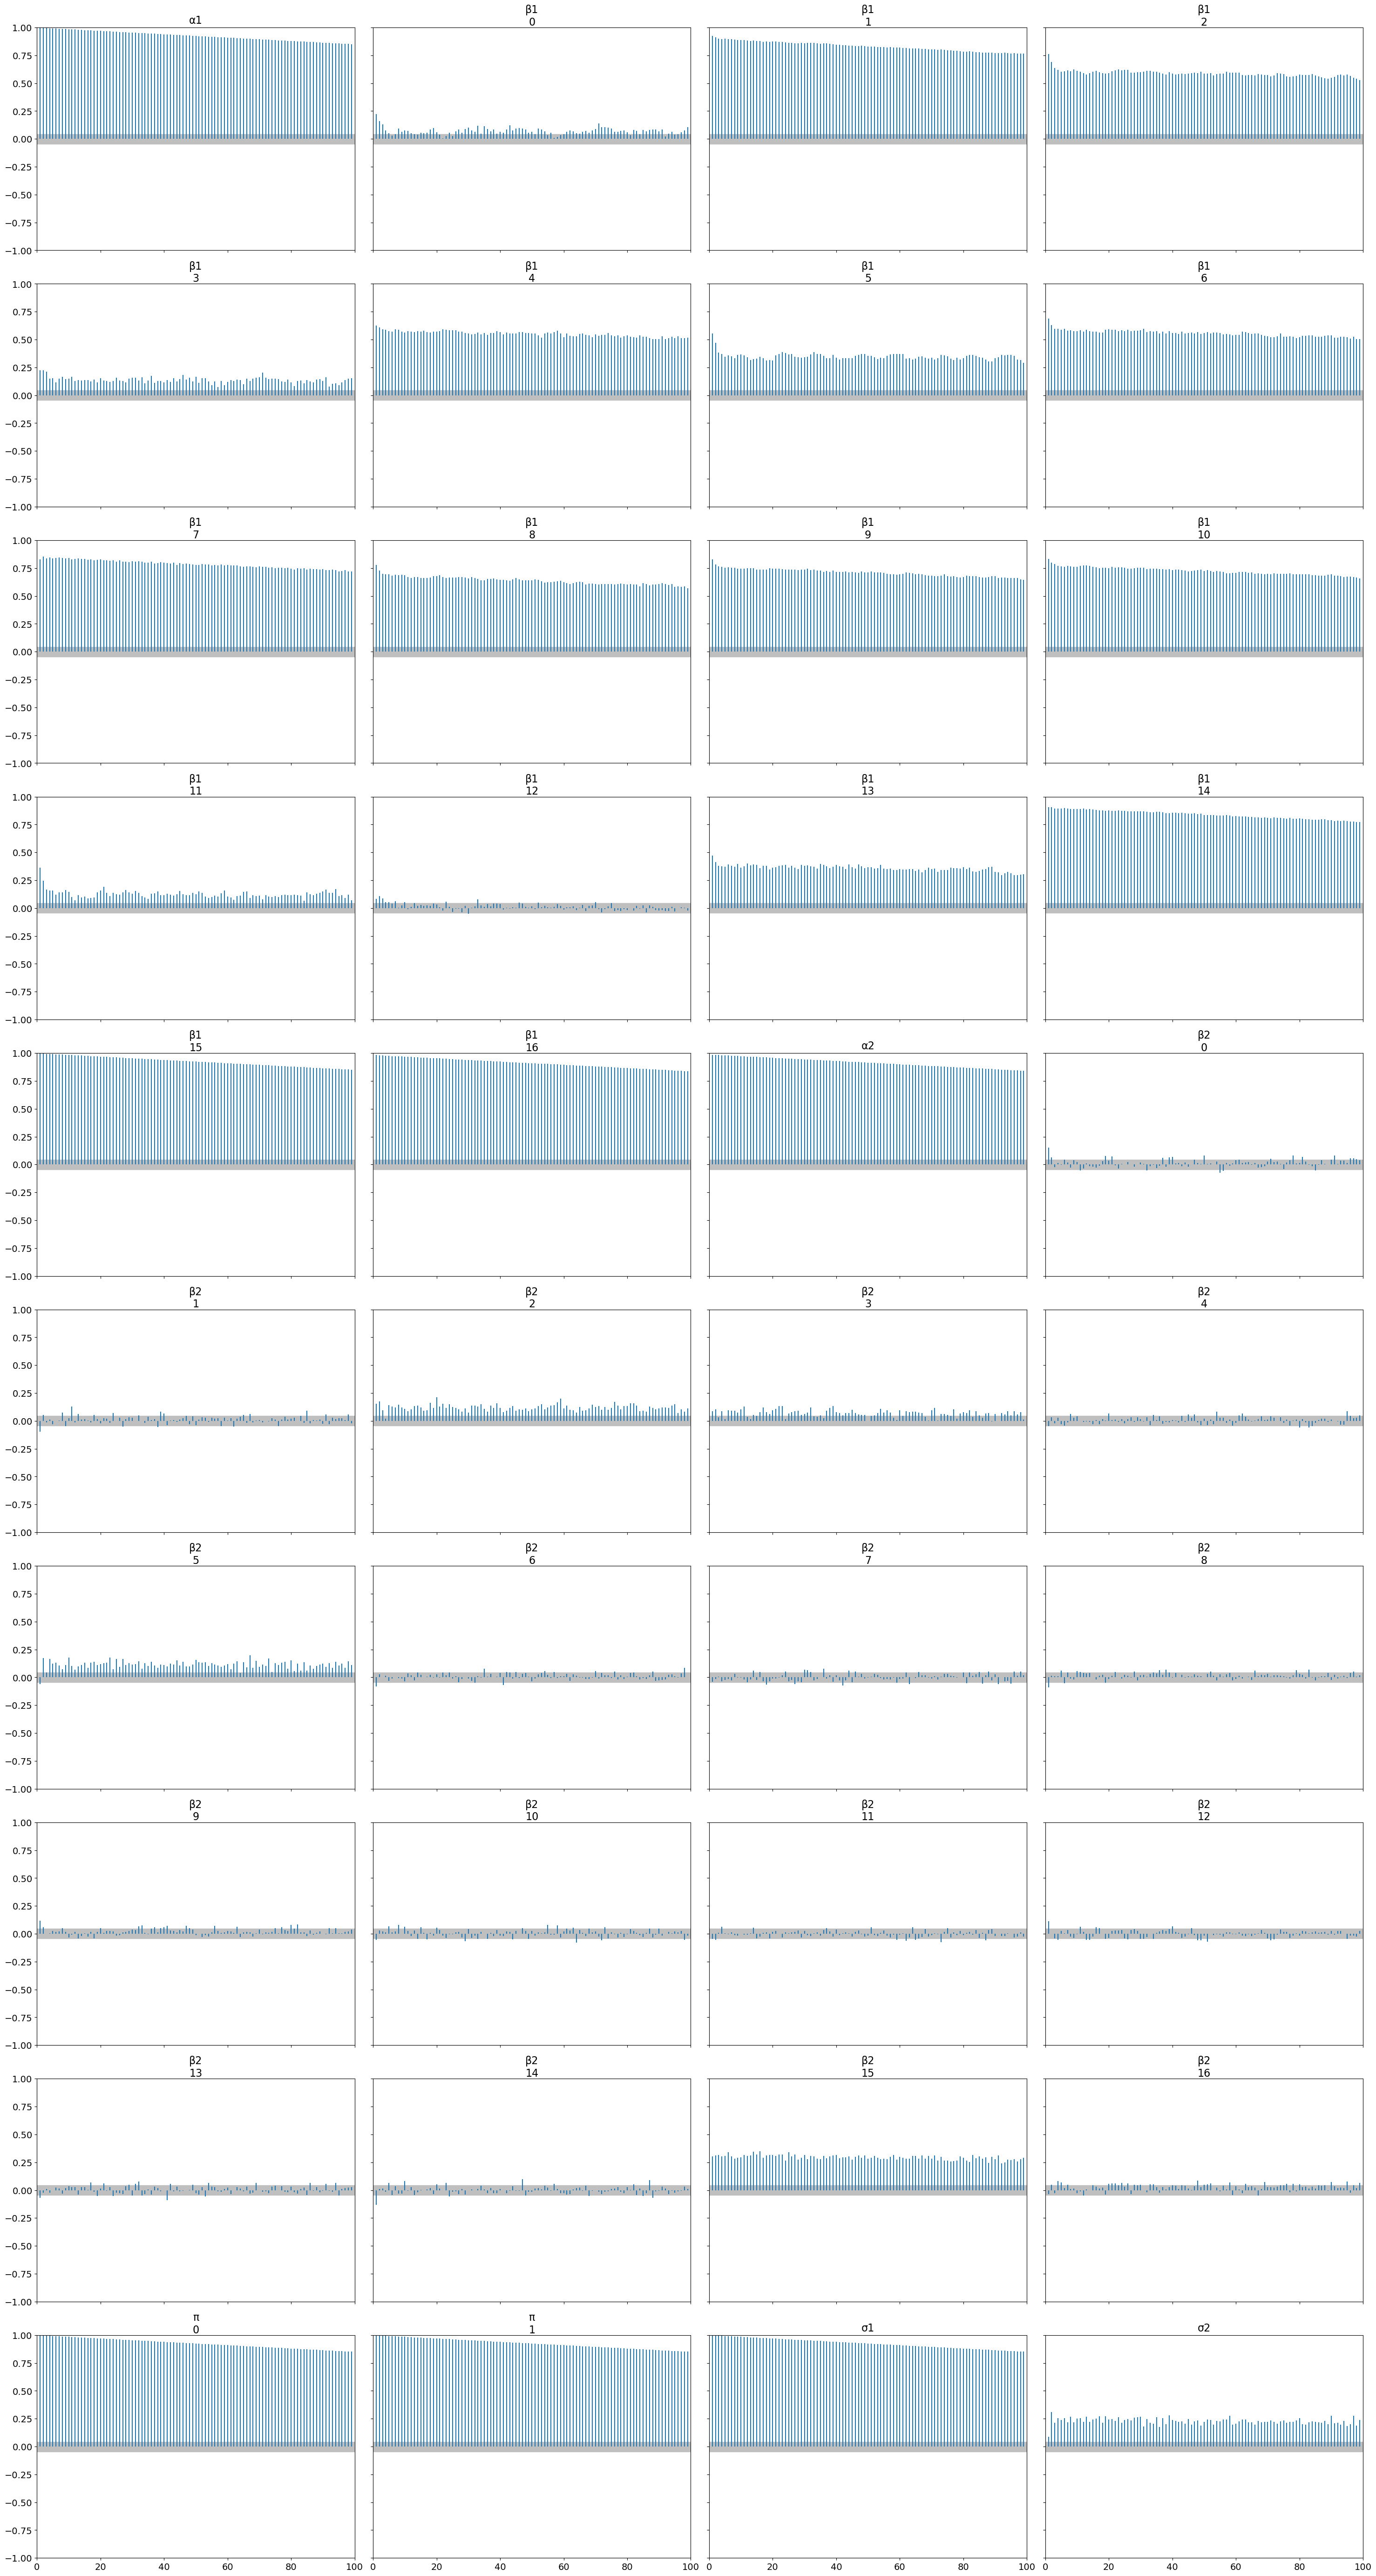

In [9]:
az.plot_autocorr(task_sac_aff_trace, combined = True);

##### Posterior predictive

In [10]:
task_sac_aff_ppc = modeler.generate_model_ppc(task_sac_aff_empathy, task_sac_aff_trace)
sampled_labels = task_sac_aff_ppc["posterior_predictive"]["empathy"].mean(axis=(0,1))
rmse, mape = modeler.get_regression_evaluation(task_sac_aff_labels_train, sampled_labels)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.8
MAPE:8.28%


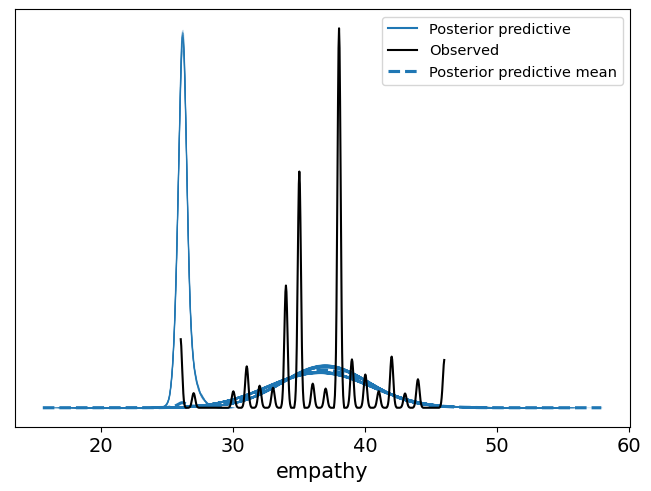

In [11]:
az.plot_ppc(task_sac_aff_ppc);

##### Predictions

In [12]:
_, _,task_sac_aff_features_test, task_sac_aff_labels_test =  loader.get_eyeT_features_and_labels(dset="test", experiment="task", type="affective")
task_sac_aff_predictions = modeler.generate_model_predictions(task_sac_aff_empathy, task_sac_aff_features_test, task_sac_aff_trace)
rmse, mape = modeler.get_regression_evaluation(task_sac_aff_predictions, task_sac_aff_labels_test)
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:4.02
MAPE:8.32%


#### __Combined predictions__

In [16]:
task_fix_aff_stimuli, task_sac_aff_stimuli = loader.get_stimuli("test", "task")
predicted_aff_empathy = modeler.combine_predictions(task_fix_aff_predictions, task_fix_aff_stimuli, task_sac_aff_predictions, task_sac_aff_stimuli)
real_empathy_aff_values = [task_oriented_affective_empathy[k[1]] for k in predicted_aff_empathy.keys()]
rmse, mape = modeler.get_regression_evaluation(real_empathy_aff_values, [level for level in predicted_aff_empathy.values()])
print(f"RMSE:{rmse}")
print(f"MAPE:{mape}%")

RMSE:3.92
MAPE:8.69%
